In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
%matplotlib inline

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [2]:
# import all elections from 1949 to 2017

elections_1949_df = pd.read_csv('Bundestagswahlen_clean/elections_1949.csv')
elections_1953_df = pd.read_csv('Bundestagswahlen_clean/elections_1953.csv')
elections_1957_df = pd.read_csv('Bundestagswahlen_clean/elections_1957.csv')
elections_1961_df = pd.read_csv('Bundestagswahlen_clean/elections_1961.csv')
elections_1965_df = pd.read_csv('Bundestagswahlen_clean/elections_1965.csv')
elections_1969_df = pd.read_csv('Bundestagswahlen_clean/elections_1969.csv')
elections_1972_df = pd.read_csv('Bundestagswahlen_clean/elections_1972.csv')
elections_1976_df = pd.read_csv('Bundestagswahlen_clean/elections_1976.csv')
elections_1980_df = pd.read_csv('Bundestagswahlen_clean/elections_1980.csv')
elections_1983_df = pd.read_csv('Bundestagswahlen_clean/elections_1983.csv')
elections_1987_df = pd.read_csv('Bundestagswahlen_clean/elections_1987.csv')
elections_1990_df = pd.read_csv('Bundestagswahlen_clean/elections_1990.csv')
elections_1994_df = pd.read_csv('Bundestagswahlen_clean/elections_1994.csv')
elections_1998_df = pd.read_csv('Bundestagswahlen_clean/elections_1998.csv')
elections_2002_df = pd.read_csv('Bundestagswahlen_clean/elections_2002.csv')
elections_2005_df = pd.read_csv('Bundestagswahlen_clean/elections_2005.csv')
elections_2009_df = pd.read_csv('Bundestagswahlen_clean/elections_2009.csv')
elections_2013_df = pd.read_csv('Bundestagswahlen_clean/elections_2013.csv')
elections_2017_df = pd.read_csv('Bundestagswahlen_clean/elections_2017.csv')

years = [1949, 1953, 1957, 1961, 1965, 1969, 1972, 1976, 1980, 1983, 1987, 
         1990, 1994, 1998, 2002, 2005, 2009, 2013, 2017]

elections_1949_df.head(6)

Unnamed: 0  Wahlkreis                           Gebiet  Wahlberechtigte  \
0           2          1  Husum  Südtondern  Eiderstedt         117513.0   
1           3          2                        Flensburg         131177.0   
2           4          3          Schleswig  Eckernförde         123483.0   
3           5          4    Norder- und Süderdithmarschen         116535.0   
4           6          5                        Rendsburg         133432.0   
5           7          6                             Kiel         151052.0   

     Wähler  Ungültige   Gültige  CDU/CSU  CDU/CSU_prev  CDU/CSU:2  \
0   94615.0     1693.0   92922.0  28901.0             0          0   
1  112871.0     1431.0  111440.0      0.0             0          0   
2  103269.0     1376.0  101893.0  28850.0             0          0   
3   94709.0     1765.0   92944.0  30412.0             0          0   
4  110887.0     1756.0  109131.0  41567.0             0          0   
5  124920.0     2347.0  122573.0  64894.0             0          0   

   CDU/CSU:2_prev      SPD  SPD_prev  SPD:2  SPD:2_prev      FDP  FDP_prev  \
0               0  19987.0         0      0           0  11817.0         0   
1               0  16801.0         0      0           0      0.0         0   
2               0  17489.0         0      0           0   1101.0         0   
3               0  24129.0         0      0           0   3950.0         0   
4               0  24087.0         0      0           0   2893.0         0   
5               0  43712.0         0      0           0   1766.0         0   

   FDP:2  FDP:2_prev  GRUENE  GRUENE_prev  GRUENE:2  GRUENE:2_prev  LINKE  \
0      0           0       0            0         0              0      0   
1      0           0       0            0         0              0      0   
2      0           0       0            0         0              0      0   
3      0           0       0            0         0              0      0   
4      0           0       0            0         0              0      0   
5      0           0       0            0         0              0      0   

   LINKE_prev  LINKE:2  LINKE:2_prev  AFD  AFD_prev  AFD:2  AFD:2_prev  \
0           0        0             0    0         0      0           0   
1           0        0             0    0         0      0           0   
2           0        0             0    0         0      0           0   
3           0        0             0    0         0      0           0   
4           0        0             0    0         0      0           0   
5           0        0             0    0         0      0           0   

      KPD  KPD_prev  KPD:2  KPD:2_prev  BHE  BHE_prev  BHE:2  BHE:2_prev  \
0  1405.0         0      0           0    0         0      0           0   
1  1895.0         0      0           0    0         0      0           0   
2  1530.0         0      0           0    0         0      0           0   
3  1857.0         0      0           0    0         0      0           0   
4  2679.0         0      0           0    0         0      0           0   
5  6690.0         0      0           0    0         0      0           0   

     OTHER  OTHER_prev  OTHER:2  OTHER:2_prev  
0  30812.0           0        0             0  
1  92744.0           0        0             0  
2  52923.0           0        0             0  
3  32596.0           0        0             0  
4  37905.0           0        0             0  
5   5511.0           0        0             0

In [3]:
elections_1949_df.columns

Index(['Unnamed: 0', 'Wahlkreis', 'Gebiet', 'Wahlberechtigte', 'Wähler',
       'Ungültige', 'Gültige', 'CDU/CSU', 'CDU/CSU_prev', 'CDU/CSU:2',
       'CDU/CSU:2_prev', 'SPD', 'SPD_prev', 'SPD:2', 'SPD:2_prev', 'FDP',
       'FDP_prev', 'FDP:2', 'FDP:2_prev', 'GRUENE', 'GRUENE_prev', 'GRUENE:2',
       'GRUENE:2_prev', 'LINKE', 'LINKE_prev', 'LINKE:2', 'LINKE:2_prev',
       'AFD', 'AFD_prev', 'AFD:2', 'AFD:2_prev', 'KPD', 'KPD_prev', 'KPD:2',
       'KPD:2_prev', 'BHE', 'BHE_prev', 'BHE:2', 'BHE:2_prev', 'OTHER',
       'OTHER_prev', 'OTHER:2', 'OTHER:2_prev'],
      dtype='object')

In [4]:
# drop column "Gebiet"
#small_df = small_df.drop(columns=['Gebiet'])

# apply the Laplace Bridge
def Dirichlet_bridge_mu(alpha):
    alpha = np.array(alpha, dtype='int')
    k = len(alpha)
    C = 1/k * np.sum(np.log(alpha))
    return(np.log(alpha) - C)

def Dirichlet_bridge_Sigma(alpha):
    K = len(alpha)
    Sigma = np.zeros((K, K))
    sum_inv_alphas = np.sum(1/alpha)
    for k in range(K):
        for l in range(K):
            x_ = -1/K * (1/alpha[k] + 1/alpha[l] - 1/K*sum_inv_alphas)
            if k == l:
                x_ += 1/alpha[k]
            Sigma[k,l] = x_
            
    return(Sigma)

def Dirichlet_bridge_alpha(mu, Sigma):
    K = len(mu)
    Sigma_diag = np.diag(Sigma)
    sum_m_exp = np.sum(np.exp(-mu))
    return(1/Sigma_diag * (1 - 2/K + np.exp(mu)/K**2 * sum_m_exp))


def softmax_vector(mu):
    mu = np.array(mu)
    return(np.exp(mu)/np.sum(np.exp(mu)))

def softmax_batch(mu_batch):
    mu_batch = np.array(mu_batch)
    return(np.exp(mu_batch)/np.sum(np.exp(mu_batch), 1)[:,np.newaxis])

In [5]:
#test some alpha values

test_a = np.arange(1, 10)
test_mu = Dirichlet_bridge_mu(test_a)
test_Sigma = Dirichlet_bridge_Sigma(test_a)
test_a2 = Dirichlet_bridge_alpha(test_mu, test_Sigma)
assert(np.allclose(test_a, test_a2))

# German elections with Dirichlet + GP

In [6]:
# Select the 10 Wahlkreise (Ger + 9 counties) with the 9 parties

cols = ['Gebiet', 'CDU/CSU', 'SPD', 'FDP', 'GRUENE', 'LINKE', 'AFD', 'KPD', 'BHE', 'OTHER']
regions = ['Bundesgebiet ohne Berlin', 'Bundesgebiet','Schleswig-Holstein', 'Hamburg', 'Niedersachsen', 
           'Bremen', 'Nordrhein-Westfalen', 'Hessen', 'Rheinland-Pfalz', 'Baden-Württemberg', 'Bayern', 
           'BUNDESGEBIET OHNE BERLIN', 'SCHLESWIG-HOLSTEIN', 'HAMBURG', 'NIEDERSACHSEN', 'BREMEN',
           'NORDRHEIN-WESTFALEN', 'HESSEN', 'RHEINLAND-PFALZ', 'BADEN-WUERTTEMBERG', 'BAYERN']

parties = ['CDU/CSU', 'SPD', 'FDP', 'GRUENE', 'LINKE', 'AFD', 'KPD', 'BHE', 'OTHER']

n_regions = 10
n_parties = 9

medium_df = pd.DataFrame(columns=cols)
    
#if you want to ignore election of 2009 to let the GP infer it
ignore_2009 = False
    
#if you want to infer the votes in a specific county after a cutoff point t
remove_BY_from_1990 = False

#if you want to predict the next three elections (2021, 2025, 2029)
predict_2029 = False


if ignore_2009:
    dfs = [elections_1949_df, elections_1953_df, elections_1957_df, elections_1961_df, elections_1965_df,
              elections_1969_df, elections_1972_df, elections_1976_df, elections_1980_df, elections_1983_df,
              elections_1987_df, elections_1990_df, elections_1994_df, elections_1998_df, elections_2002_df,
              elections_2005_df, 
              elections_2013_df, elections_2017_df]
else:
    dfs = [elections_1949_df, elections_1953_df, elections_1957_df, elections_1961_df, elections_1965_df,
          elections_1969_df, elections_1972_df, elections_1976_df, elections_1980_df, elections_1983_df,
          elections_1987_df, elections_1990_df, elections_1994_df, elections_1998_df, elections_2002_df,
          elections_2005_df, elections_2009_df, elections_2013_df, elections_2017_df]
    

for df in dfs:
    df_ = df[cols]
    df_ = df_.loc[df['Gebiet'].isin(regions)]
    medium_df = medium_df.append(df_)

    
if remove_BY_from_1990:
    regions_single = ['SH', 'HH', 'NS', 'HB', 'NW', 'HS', 'RP', 'BW', 'BY', 'ger'] 
    dropped_elections = [1990, 1994, 1998, 2002, 2005, 2009, 2013, 2017]
    medium_df = medium_df.reset_index(drop=True)
    regions = regions_single* 19
    years_ = [y for y in years for i in range(10)]
    medium_df['year'] = years_
    medium_df = medium_df.drop(medium_df[((medium_df['Gebiet'] == 'Bayern') &\
                                          (medium_df['year'].isin(dropped_elections)))].index)
    medium_df = medium_df.drop(columns=['year'])
     

medium_df = medium_df.drop(columns=['Gebiet'])

#if you want to ignore elections from 1990 onwards for Bavaria
if remove_BY_from_1990:
    assert(19*n_regions - 8 == len(medium_df))
elif ignore_2009:
    assert(18*n_regions == len(medium_df))
else:
    assert(19*n_regions == len(medium_df))

#make sure that either only one or no condition is on at the same time
assert(np.sum([remove_BY_from_1990, ignore_2009]) <= 1)
    
medium_df

CDU/CSU         SPD        FDP   GRUENE    LINKE      AFD        KPD  \
14     428956.0    413257.0   103492.0        0        0        0    43744.0   
23     178786.0    358873.0   143371.0        0        0        0    76747.0   
58     593691.0   1125295.0   252141.0        0        0        0   104132.0   
62      51290.0    104509.0    39228.0        0        0        0    20530.0   
129   2481523.0   2109172.0   581456.0        0        0        0   513225.0   
152    454437.0    684042.0   597081.0        0        0        0   142539.0   
168    702125.0    408905.0   226625.0        0        0        0    89026.0   
202   1087828.0    655506.0   482381.0        0        0        0   175911.0   
250   1380448.0   1075416.0   404145.0        0        0        0   195852.0   
251   7359084.0   6934975.0  2829920.0        0        0        0  1361706.0   
14     666475.0    361264.0    51684.0        0        0        0    16410.0   
23     215376.0    416865.0   186694.0        0        0        0    41108.0   
58    1049883.0   1162311.0   308663.0        0        0        0    40315.0   
62      85669.0    141596.0    28169.0        0        0        0    13992.0   
129   4034990.0   2609048.0   683465.0        0        0        0   227366.0   
152    760423.0    889040.0   610534.0        0        0        0    64130.0   
168    925829.0    493443.0   226874.0        0        0        0    41723.0   
202   1839014.0    843299.0   502041.0        0        0        0    82673.0   
250   2450286.0   1214391.0   369442.0        0        0        0    83600.0   
251  12027945.0   8131257.0  2967566.0        0        0        0   611317.0   
14     670199.0    412561.0    67164.0        0        0        0        0.0   
23     445149.0    538847.0   105558.0        0        0        0        0.0   
58    1428300.0   1279201.0   223521.0        0        0        0        0.0   
62     124688.0    188647.0    22125.0        0        0        0        0.0   
129   4911300.0   3049317.0   528307.0        0        0        0        0.0   
152   1064466.0   1071222.0   243877.0        0        0        0        0.0   
168   1031349.0    586124.0   185300.0        0        0        0        0.0   
202   2111326.0   1053371.0   547010.0        0        0        0        0.0   
250   3068418.0   1332056.0   252341.0        0        0        0        0.0   
257  15161550.0   9651669.0  2276234.0        0        0        0        0.0   
14     609048.0    510160.0   174848.0        0        0        0        0.0   
23     392417.0    570382.0   182919.0        0        0        0        0.0   
58    1606479.0   1556255.0   476886.0        0        0        0        0.0   
62     121347.0    220130.0    63985.0        0        0        0        0.0   
129   4602409.0   3593596.0  1063302.0        0        0        0        0.0   
152   1055277.0   1271675.0   425210.0        0        0        0        0.0   
168    988462.0    675693.0   255961.0        0        0        0        0.0   
202   1955620.0   1385442.0   697279.0        0        0        0        0.0   
250   3104742.0   1690099.0   450506.0        0        0        0        0.0   
257  14727737.0  11672057.0  3866269.0        0        0        0        0.0   
11     715058.0    551767.0    97236.0        0        0        0        0.0   
20     452116.0    584560.0    92513.0        0        0        0        0.0   
51    1919789.0   1633758.0   360034.0        0        0        0        0.0   
55     153888.0    218628.0    45992.0        0        0        0        0.0   
129   4655973.0   4178408.0   596375.0        0        0        0        0.0   
152   1158372.0   1395691.0   308146.0        0        0        0        0.0   
169   1017950.0    765462.0   180286.0        0        0        0        0.0   
206   2256883.0   1505607.0   515025.0        0        0        0        0.0   
251   3204648.0   1913778.0   320121.0        0        0        0        0.0   
258  158

In [7]:

# if you want to train without the year 2009
if ignore_2009:
    T = [1949, 1953, 1957, 1961, 1965, 1969, 1972, 1976, 1980, 1983,
         1987, 1990, 1994, 1998, 2002, 2005, 2013, 2017]
else:
    T = [1949, 1953, 1957, 1961, 1965, 1969, 1972, 1976, 1980, 1983,
     1987, 1990, 1994, 1998, 2002, 2005, 2009, 2013, 2017]



P = np.arange(1,n_parties + 1)
C = np.arange(1,n_regions + 1)

# if you removed the elections from 1990 onwards for Bavaria
if remove_BY_from_1990:
    X = np.zeros((len(T)*len(C)*len(P) - 8 * n_parties, 3))
else:
    X = np.zeros((len(T)*len(C)*len(P), 3))

print(np.shape(X))
idx = 0
for t in T:
    for c in C:
        for p in P:
            #if you want to exclude a specific county c after a certain year t
            if remove_BY_from_1990:
                if t >= 1990 and c == 9:
                    continue
            X[idx] = [t, c, p]
            idx += 1
            
print(X[:-10])

(1710, 3)
[[1.949e+03 1.000e+00 1.000e+00]
 [1.949e+03 1.000e+00 2.000e+00]
 [1.949e+03 1.000e+00 3.000e+00]
 ...
 [2.017e+03 9.000e+00 6.000e+00]
 [2.017e+03 9.000e+00 7.000e+00]
 [2.017e+03 9.000e+00 8.000e+00]]


In [8]:
# build the kernel

def k_SEK(x, x_, s=1, l=2):
    return(s*np.exp(-(x-x_)**2 / (2*l**2)))

def k_RQ(x, x_, s=1, l=10, a=0.1):
    return(s**2 * (1 + (x-x_)**2/(2*a*l**2)))**(-a)

def k_dirac_soft(x, x_):
    if x == x_:
        return(1)
    else:
        return(0.1)

n = len(X)
K_XX = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        t_i = X[i,0]
        c_i = X[i,1]
        p_i = X[i,2]
        t_j = X[j,0]
        c_j = X[j,1]
        p_j = X[j,2]
        #K_XX[i, j] = k_SEK(t_i, t_j) * k_dirac_soft(c_i, c_j) * k_dirac_soft(p_i, p_j)
        K_XX[i, j] = k_RQ(t_i, t_j) * k_dirac_soft(c_i, c_j) * k_dirac_soft(p_i, p_j)
        
print(np.shape(K_XX))
K_XX[10:,:]

(1710, 1710)


array([[0.01      , 0.1       , 0.01      , ..., 0.00579981, 0.00579981,
        0.00579981],
       [0.01      , 0.01      , 0.1       , ..., 0.00579981, 0.00579981,
        0.00579981],
       [0.01      , 0.01      , 0.01      , ..., 0.00579981, 0.00579981,
        0.00579981],
       ...,
       [0.00579981, 0.00579981, 0.00579981, ..., 1.        , 0.1       ,
        0.1       ],
       [0.00579981, 0.00579981, 0.00579981, ..., 0.1       , 1.        ,
        0.1       ],
       [0.00579981, 0.00579981, 0.00579981, ..., 0.1       , 0.1       ,
        1.        ]])

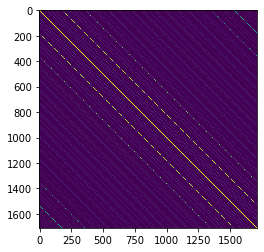

In [9]:
plt.imshow(K_XX)
plt.show()

In [10]:
# prep y data

#prior for the dirichlet
alpha_0 = 1

t0 = time.time()
Y_mu = np.array([Dirichlet_bridge_mu(np.array(row[1].values) + alpha_0) for row in medium_df.iterrows()])
t1 = time.time()
print("mu transformation time: ", t1 - t0)
Y_mu = Y_mu.reshape(-1)

#print(Y_mu)

t0 = time.time()
Y_Sigma = [Dirichlet_bridge_Sigma(np.array(row[1].values) + alpha_0) for row in medium_df.iterrows()]
t1 = time.time()
print("Sigma transformation time: ", t1 - t0)

Y_Sigma_block = np.zeros((n,n))
idx = 0
for S in Y_Sigma:
    Y_Sigma_block[idx:idx+n_parties, idx:idx+n_parties] = S
    idx += n_parties

mu transformation time:  0.01816391944885254
Sigma transformation time:  0.0220186710357666


In [3]:
# calculate GP stuff
from numpy.random import randn, multivariate_normal
from numpy.linalg import cholesky, solve
from scipy.linalg import cho_solve, cho_factor
import time

G_ = K_XX + Y_Sigma_block
t0 = time.time()
G = cho_factor(G_)
t1 = time.time()
print("time for cho factor: ", t1 - t0)

NameError: name 'K_XX' is not defined

In [4]:
# if you want to predict the next three elections
if predict_2029:
    T_x = np.arange(1949, 2029)
else:
    T_x = np.arange(1949, 2017)

P_x = np.arange(1,n_parties + 1)
C_x = np.arange(1,n_regions + 1)

x = np.zeros((len(T_x)*len(C_x)*len(P_x), 3))
print(np.shape(x))
idx = 0
for t in T_x:
    for c in C_x:
        for p in P_x:
            x[idx] = [t, c, p]
            idx += 1

n_ = len(x)
K_xX = np.zeros((n_, n))
for i in range(n_):
    for j in range(n):
        t_i = x[i,0]
        c_i = x[i,1]
        p_i = x[i,2]
        t_j = X[j,0]
        c_j = X[j,1]
        p_j = X[j,2]
        #K_xX[i, j] = k_SEK(t_i, t_j) * k_dirac_soft(c_i, c_j) * k_dirac_soft(p_i, p_j)
        K_xX[i, j] = k_RQ(t_i, t_j) * k_dirac_soft(c_i, c_j) * k_dirac_soft(p_i, p_j)
        
print(np.shape(K_xX))

K_xx = np.zeros((n_, n_))
for i in range(n_):
    for j in range(n_):
        t_i = x[i,0]
        c_i = x[i,1]
        p_i = x[i,2]
        t_j = x[j,0]
        c_j = x[j,1]
        p_j = x[j,2]
        #K_xx[i, j] = k_SEK(t_i, t_j) * k_dirac_soft(c_i, c_j) * k_dirac_soft(p_i, p_j)
        K_xx[i, j] = k_RQ(t_i, t_j) * k_dirac_soft(c_i, c_j) * k_dirac_soft(p_i, p_j)
        
print(np.shape(K_xx))

NameError: name 'predict_2029' is not defined

In [2]:
# do some inference 
t0 = time.time()
A = cho_solve(G, K_xX.T).T
t1 = time.time()
print("cho solve: ", t1-t0)

out = {}

# # posterior p(f_x|Y) = N(f_x,mpost,vpost)
t0 = time.time()
out["mpost"] = A @ Y_mu #m(x) + A @ (Y - mX)  # mean
t1 = time.time()
print("matrix multiplication with mu: ", t1-t0)
print(np.shape(out['mpost']))

t0 = time.time()
out["vpost"] = K_xx - A @ K_xX.T  # covariance
t1 = time.time()
print("Computing Kernel for prediction: ", t1-t0)
print(np.shape(out['vpost']))

n_GP_samples = 50

#This makes the kernel die because it's too large
out["spost"] = multivariate_normal(
    out["mpost"].flatten(), out["vpost"], size=n_GP_samples
)

NameError: name 'time' is not defined

In [1]:
test_1 = out["mpost"]
test_1_v = np.diag(out["vpost"])
print(np.shape(test_1))
print(np.shape(test_1_v))
def logistic_transform(x):
    return(1/(1+np.exp(-x)))

print(test_1_v[:10])
print(logistic_transform(test_1_v[:10]))

test_1 = test_1.reshape((-1, n_regions*n_parties))
test_1_v = test_1_v.reshape((-1, n_regions*n_parties))
print(np.shape(test_1))
print(np.shape(test_1_v))

test_1_SH = test_1[:, :n_parties]
test_1_HH = test_1[:, n_parties:2*n_parties]
test_1_NS = test_1[:, 2*n_parties:3*n_parties]
test_1_HB = test_1[:, 3*n_parties:4*n_parties]
test_1_NW = test_1[:, 4*n_parties:5*n_parties]
test_1_HS = test_1[:, 5*n_parties:6*n_parties]
test_1_RP = test_1[:, 6*n_parties:7*n_parties]
test_1_BW = test_1[:, 7*n_parties:8*n_parties]
test_1_BY = test_1[:, 8*n_parties:9*n_parties]
test_1_ger = test_1[:, 9*n_parties:10*n_parties]

test_1_SH_v = test_1_v[:, :n_parties]
test_1_HH_v = test_1_v[:, n_parties:2*n_parties]
test_1_NS_v = test_1_v[:, 2*n_parties:3*n_parties]
test_1_HB_v = test_1_v[:, 3*n_parties:4*n_parties]
test_1_NW_v = test_1_v[:, 4*n_parties:5*n_parties]
test_1_HS_v = test_1_v[:, 5*n_parties:6*n_parties]
test_1_RP_v = test_1_v[:, 6*n_parties:7*n_parties]
test_1_BW_v = test_1_v[:, 7*n_parties:8*n_parties]
test_1_BY_v = test_1_v[:, 8*n_parties:9*n_parties]
test_1_ger_v = test_1_v[:, 9*n_parties:10*n_parties]

print(np.shape(test_1_ger))
print(np.shape(test_1_ger_v))

NameError: name 'out' is not defined

In [15]:
test_1_BY_df = pd.DataFrame(test_1_BY)
test_1_BY_df.columns = parties
test_1_BY_df['year'] = T_x
#print(len(test_1_BY_df))
#print(len(range(1949, 2017)))
test_1_BY_df

CDU/CSU       SPD       FDP    GRUENE     LINKE       AFD       KPD  \
0   4.835308  4.585605  3.606916 -6.263723 -7.249643 -7.616510  2.882482   
1   4.887297  4.541917  3.554865 -6.431123 -7.377195 -7.714802  2.851976   
2   4.965844  4.500091  3.482803 -6.558772 -7.475591 -7.789201  2.686382   
3   5.079170  4.487835  3.406104 -6.648672 -7.545930 -7.840087  2.362291   
4   5.235478  4.533519  3.343516 -6.700611 -7.587829 -7.866682  1.857454   
5   5.436392  4.652178  3.315018 -6.715133 -7.601696 -7.869050  1.177759   
6   5.672127  4.838649  3.343538 -6.697351 -7.591597 -7.850478  0.380306   
7   5.925149  5.075313  3.457015 -6.653293 -7.562738 -7.815433 -0.440200   
8   6.178895  5.344457  3.680785 -6.585650 -7.518280 -7.766885 -1.189427   
9   6.425115  5.633828  4.017086 -6.496397 -7.460849 -7.707364 -1.807618   
10  6.665872  5.935717  4.430288 -6.390317 -7.395037 -7.640981 -2.278521   
11  6.908795  6.243941  4.856376 -6.272525 -7.326205 -7.572672 -2.608342   
12  7.158669  6.550526  5.228348 -6.145157 -7.258269 -7.506421 -2.803185   
13  7.409005  6.841957  5.499547 -6.009125 -7.194102 -7.445198 -2.867825   
14  7.636524  7.095145  5.649895 -5.866517 -7.136914 -7.391871 -2.810757   
15  7.803174  7.276941  5.672876 -5.718532 -7.089956 -7.349408 -2.637360   
16  7.871249  7.355725  5.567570 -5.562956 -7.055411 -7.320223 -2.343250   
17  7.829593  7.325922  5.353033 -5.395448 -7.034036 -7.305321 -1.921640   
18  7.708981  7.223390  5.083850 -5.210486 -7.025247 -7.303962 -1.372283   
19  7.567413  7.110524  4.839257 -4.998166 -7.027022 -7.314177 -0.701026   
20  7.457656  7.041182  4.688068 -4.742131 -7.036190 -7.333651  0.072080   
21  7.398822  7.027196  4.648702 -4.423181 -7.049584 -7.360350  0.884126   
22  7.368386  7.028397  4.674849 -4.023012 -7.064860 -7.392654  1.613109   
23  7.323479  6.981611  4.689799 -3.524511 -7.080378 -7.429237  2.118317   
24  7.236526  6.851078  4.645567 -2.914065 -7.095312 -7.469105  2.323124   
25  7.115429  6.657551  4.556077 -2.182798 -7.109415 -7.511434  2.261999   
26  6.994572  6.463418  4.481288 -1.322309 -7.121297 -7.554877  2.044388   
27  6.910232  6.332571  4.481556 -0.331408 -7.127748 -7.597496  1.785244   
28  6.877963  6.292001  4.569899  0.754471 -7.125979 -7.638054  1.562247   
29  6.883215  6.315497  4.688566  1.836737 -7.114944 -7.676783  1.408476   
30  6.890578  6.340388  4.730259  2.766457 -7.092604 -7.714119  1.324325   
31  6.865318  6.305806  4.599231  3.406663 -7.053412 -7.749383  1.285240   
32  6.796006  6.192077  4.286658  3.721500 -6.989948 -7.781338  1.234710   
33  6.703108  6.035448  3.902073  3.816387 -6.895117 -7.809220  1.081079   
34  6.622853  5.900255  3.611472  3.867222 -6.761897 -7.832855  0.727189   
35  6.579118  5.830464  3.525334  3.996646 -6.583453 -7.852946  0.129564   
36  6.567522  5.822676  3.636296  4.205810 -6.351657 -7.871127 -0.665637   
37  6.561415  5.837127  3.848876  4.400022 -6.050389 -7.888421 -1.548985   
38  6.530028  5.827778  4.049372  4.468333 -5.650970 -7.903992 -2.404246   
39  6.456150  5.768794  4.157403  4.365245 -5.116958 -7.916076 -3.149658   
40  6.343331  5.664156  4.141135  4.143795 -4.413842 -7.923312 -3.748341   
41  6.208610  5.536798  4.004173  3.910536 -3.524943 -7.924849 -4.194712   
42  6.070783  5.411197  3.770351  3.746321 -2.482548 -7.920574 -4.501039   
43  5.944852  5.304842  3.477797  3.663352 -1.393060 -7.911002 -4.690481   
44  5.842106  5.229133  3.172234  3.619866 -0.419929 -7.895353 -4.785618   
45  5.769540  5.190708  2.896800  3.562404  0.278949 -7.870667 -4.799052   
46  5.725679  5.187930  2.683947  3.463562  0.632946 -7.834227 -4.736103   
47  5.697263  5.207431  2.555259  3.337559  0.698723 -7.785204 -4.600710   
48  5.662525  5.227326  2.527846  3.227367  0.616496 -7.722135 -4.395451   
49  5.600841  5.226238  2.611666  3.175786  0.530110 -7.640811 -4.125724   
50  5.504570  5.193322  2.789205  3.197081  0.532377 -7.536491 -3.817068   
51  5.384883  5.132350  2.998677  3.264126  0.653235 

In [16]:
# Bridge back to Dirichlet land via softmax

sm_results_SH = softmax_batch(test_1_SH)
sm_cumulative_SH = np.cumsum(sm_results_SH, 1)

sm_results_HH = softmax_batch(test_1_HH)
sm_cumulative_HH = np.cumsum(sm_results_HH, 1)

sm_results_NS = softmax_batch(test_1_NS)
sm_cumulative_NS = np.cumsum(sm_results_NS, 1)

sm_results_HB = softmax_batch(test_1_HB)
sm_cumulative_HB = np.cumsum(sm_results_HB, 1)

sm_results_NW = softmax_batch(test_1_NW)
sm_cumulative_NW = np.cumsum(sm_results_NW, 1)

sm_results_HS = softmax_batch(test_1_HS)
sm_cumulative_HS = np.cumsum(sm_results_HS, 1)

sm_results_RP = softmax_batch(test_1_RP)
sm_cumulative_RP = np.cumsum(sm_results_RP, 1)

sm_results_BW = softmax_batch(test_1_BW)
sm_cumulative_BW = np.cumsum(sm_results_BW, 1)

sm_results_BY = softmax_batch(test_1_BY)
sm_cumulative_BY = np.cumsum(sm_results_BY, 1)

sm_results_ger = softmax_batch(test_1_ger)
sm_cumulative_ger = np.cumsum(sm_results_ger, 1)


In [17]:
parties = ['CDU/CSU', 'SPD', 'FDP', 'GRUENE', 'LINKE', 'AFD', 'KPD', 'BHE', 'OTHER']

party_colors = {
    'CDU/CSU':'black',
    'SPD':'red',
    'FDP':'yellow',
    'GRUENE':'green',
    'LINKE':'magenta',
    'AFD':'deepskyblue',
    'KPD':'firebrick',
    'BHE':'orange',
    'OTHER':'grey'
}

In [18]:
def plot_results(sm_result, results_v, filename,  save=False, x=T_x, legend=True):
    
    plt.rcParams["font.weight"] = "normal"
    plt.rcParams["axes.labelweight"] = "normal"
    plt.rcParams['xtick.labelsize'] = 20
    plt.rcParams['ytick.labelsize'] = 20
    plt.rcParams["font.family"] = "serif"
    plt.rcParams["font.serif"] = "Times New Roman"
    legend_size=25
    #xlabel_size=25
    #ylabel_size=25
    #title_size=25
    lw_size=3

    plt.figure(figsize=(15, 7))
    plt.xlim((np.min(T_x), np.max(T_x)))
    for i in range(n_parties):
        plt.plot(x, sm_result[:, i], label=parties[i], color=party_colors[parties[i]], lw=3)
        plt.plot(x, sm_result[:, i] + results_v[:, i], color=party_colors[parties[i]], lw=1)
        plt.plot(x, sm_result[:, i] - results_v[:, i], color=party_colors[parties[i]], lw=1)

    if legend:
        plt.legend(prop={'size': legend_size})    
    plt.tight_layout()
    if save:
        plt.savefig(filename)
    plt.show();

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


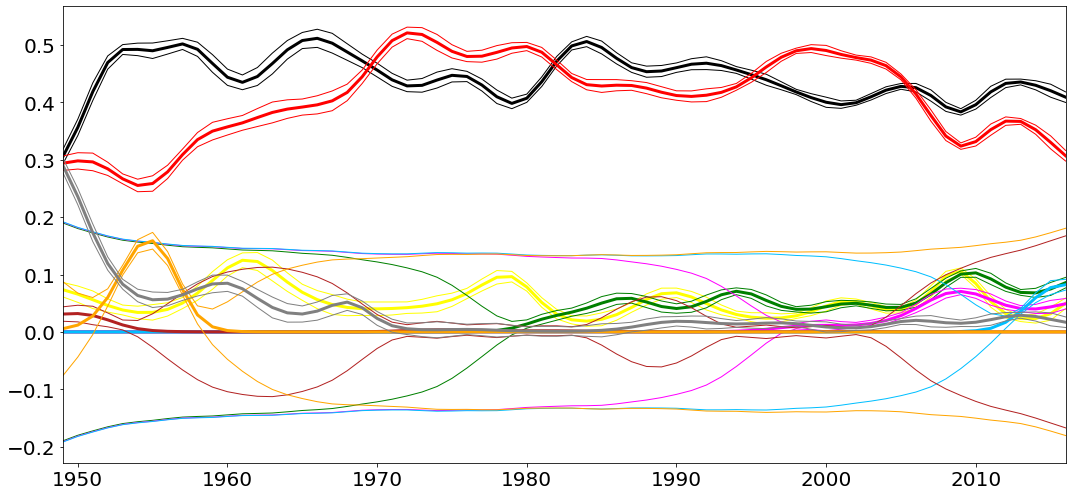

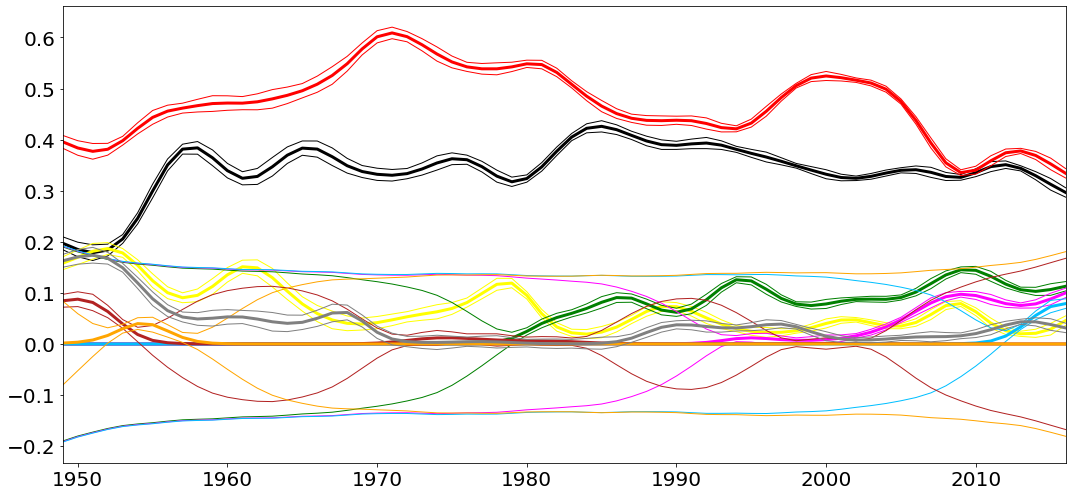

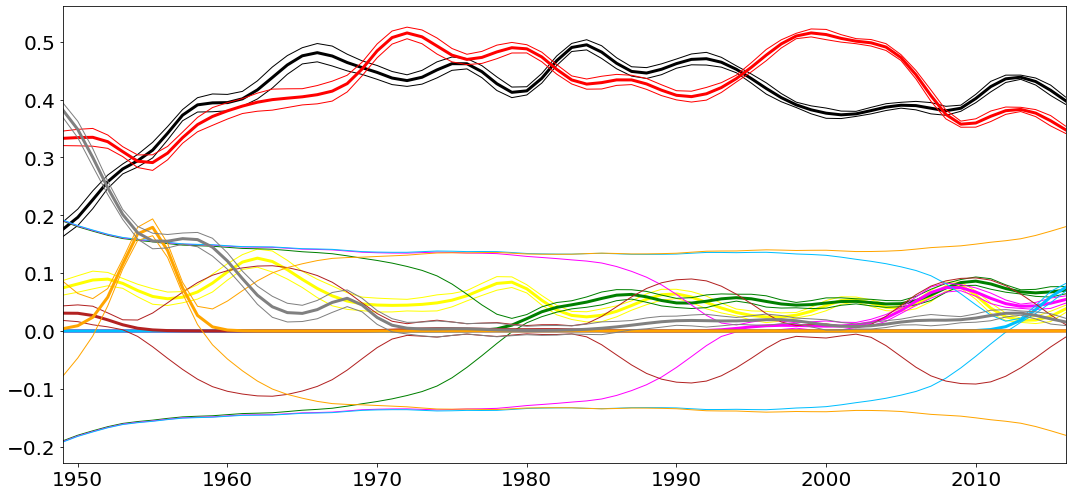

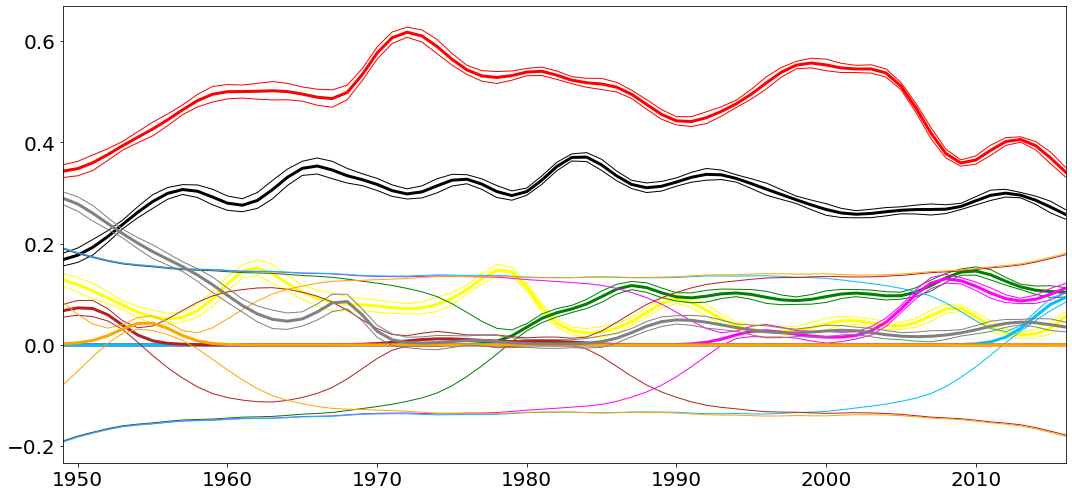

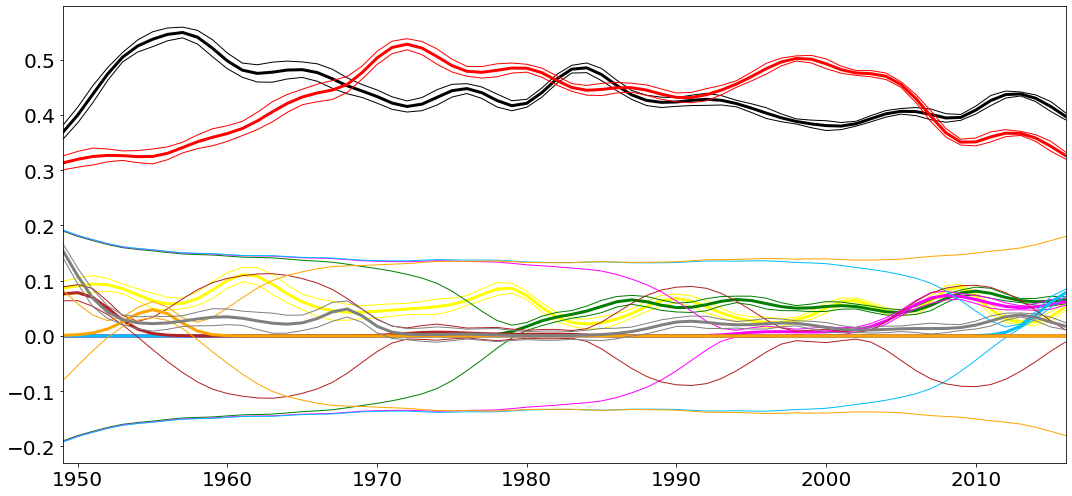

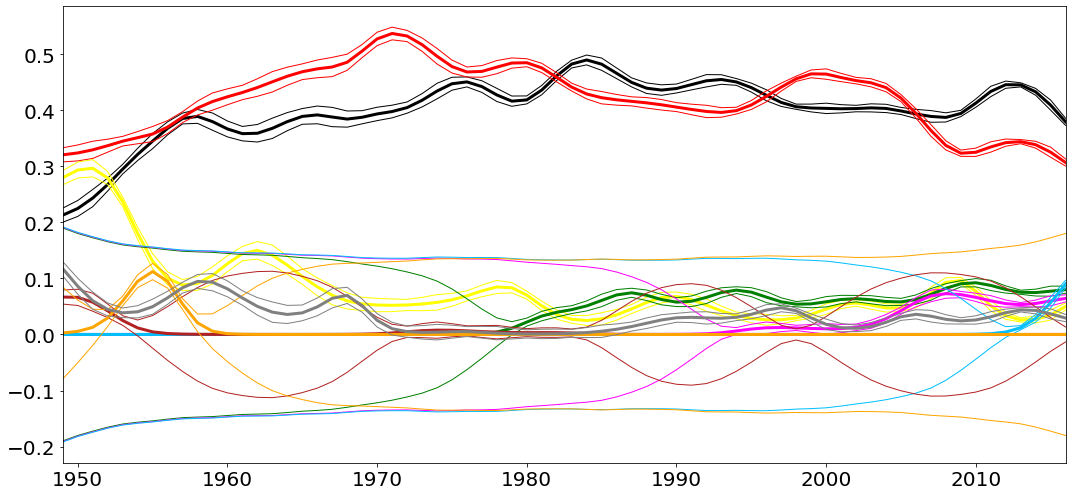

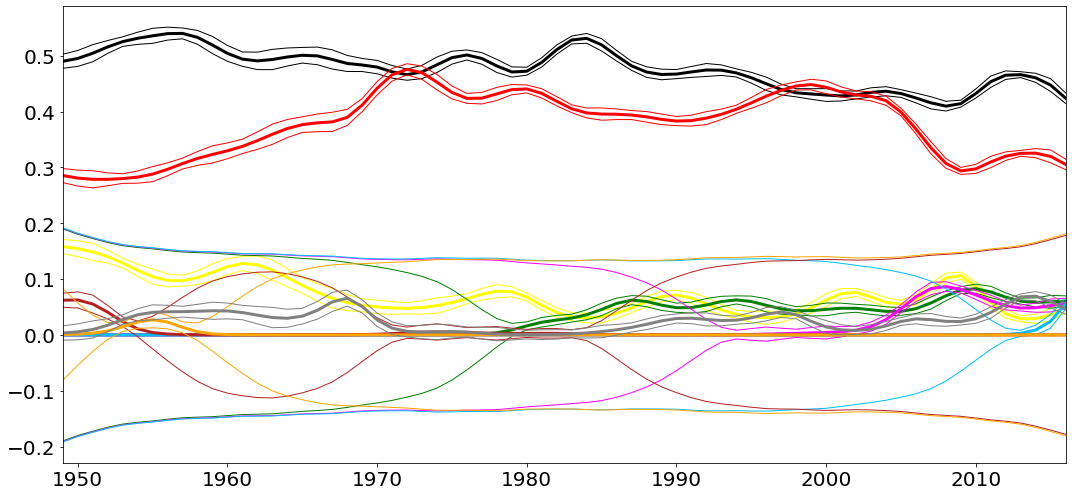

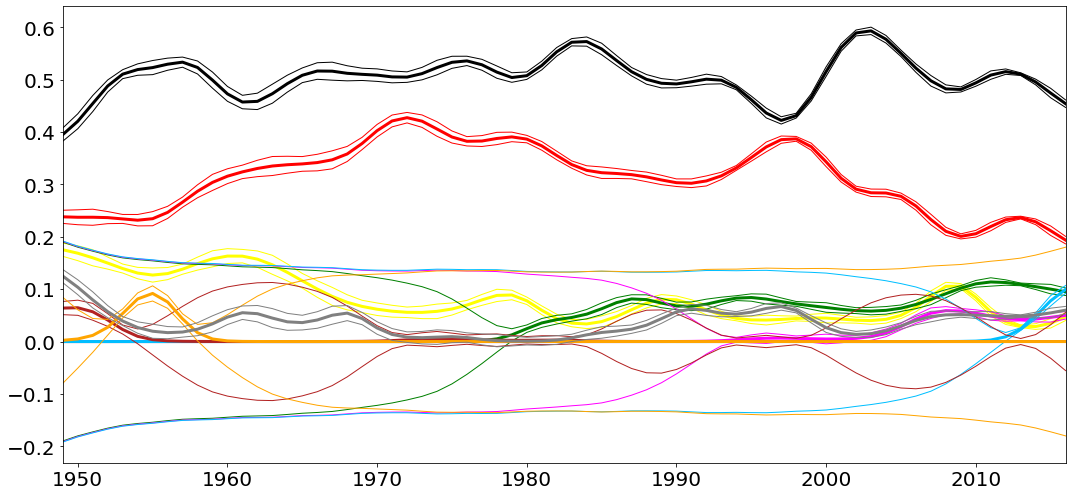

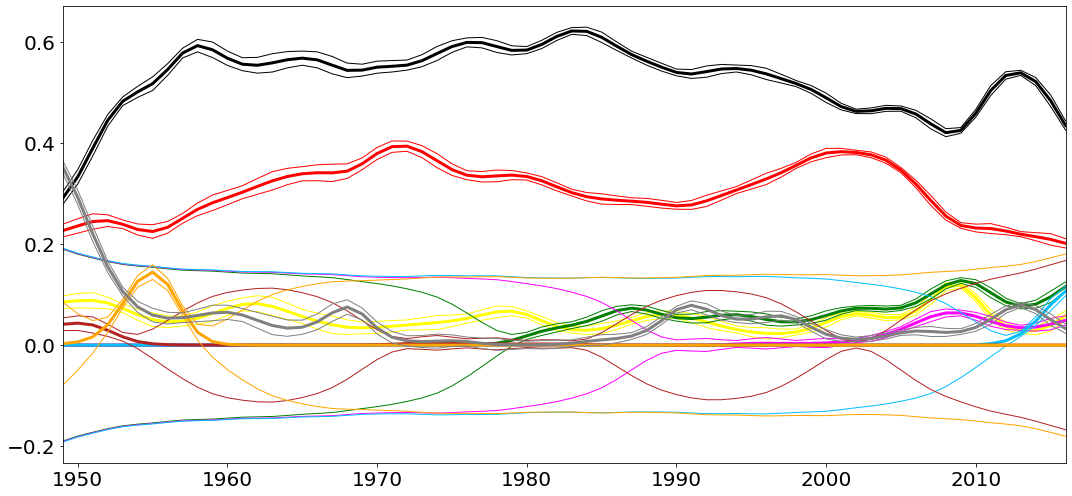

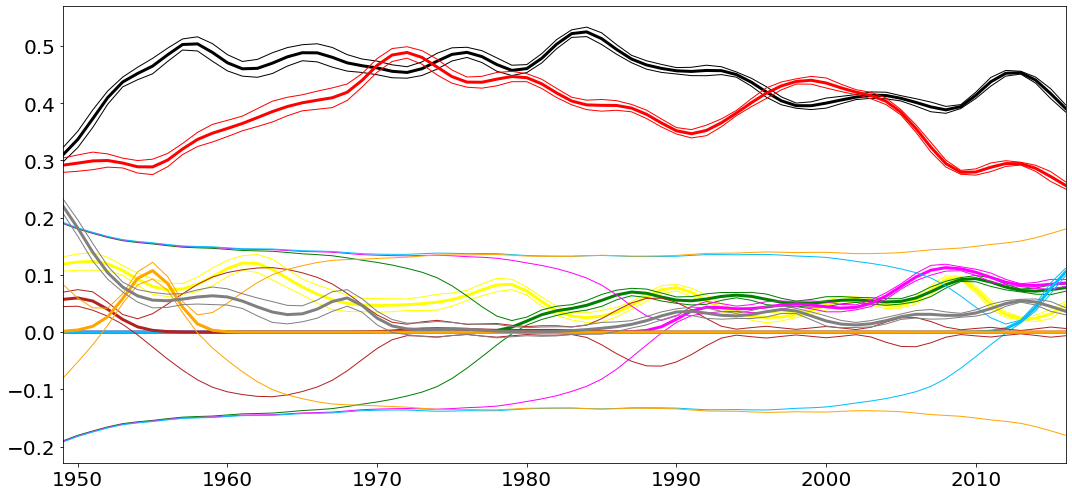

In [19]:
sm_results = [sm_results_SH, sm_results_HH, sm_results_NS, sm_results_HB, sm_results_NW, 
              sm_results_HS, sm_results_RP, sm_results_BW, sm_results_BY, sm_results_ger]

results_v = [test_1_SH_v, test_1_HH_v, test_1_NS_v, test_1_HB_v, test_1_NW_v,
             test_1_HS_v, test_1_RP_v, test_1_BW_v, test_1_BY_v, test_1_ger_v]

if ignore_2009:
    filenames = ['sm_SH_wo_2009.pdf', 'sm_HH_wo_2009.pdf', 'sm_NS_wo_2009.pdf',
                 'sm_HB_wo_2009.pdf', 'sm_NW_wo_2009.pdf', 'sm_HS_wo_2009.pdf', 'sm_RP_wo_2009.pdf', 
                 'sm_BW_wo_2009.pdf', 'sm_BY_wo_2009.pdf', 'sm_ger_wo_2009.pdf']
elif predict_2029:
    filenames = ['sm_SH_2029.pdf', 'sm_HH_2029.pdf', 'sm_NS_2029.pdf', 'sm_HB_2029.pdf', 'sm_NW_2029.pdf', 
                 'sm_HS_2029.pdf', 'sm_RP_2029.pdf', 'sm_BW_2029.pdf', 'sm_BY_2029.pdf', 'sm_ger_2029.pdf']
else:
    filenames = ['sm_SH.pdf', 'sm_HH.pdf', 'sm_NS.pdf', 'sm_HB.pdf', 'sm_NW.pdf', 
                 'sm_HS.pdf', 'sm_RP.pdf', 'sm_BW.pdf', 'sm_BY.pdf', 'sm_ger.pdf']


for j in range(len(sm_results)):
    
    r = sm_results[j]
    v = results_v[j]
    plot_results(r, v, filename=filenames[j], save=False, legend=False)

In [20]:

def plot_cum_results(sm_results_cum, results_v, x=T_x, save=False, filename='test.pdf', legend=False):

    plt.rc('text', usetex=True)
    plt.rc('xtick', labelsize=32)
    plt.rc('ytick', labelsize=35)
    plt.rc('axes', labelsize=35)
    legend_size=28
    #xlabel_size=25
    #ylabel_size=25
    #title_size=25
    lw_size=3
    
    fig = plt.figure(figsize=(15, 7))
    plt.ylim((0.0, 1.00))
    plt.xlim((np.min(T_x), np.max(T_x)))
    for i in range(n_parties):
        c = party_colors[parties[i]]
        
        plt.plot(x, sm_results_cum[:, i], label=parties[i], color=c)
        y2 = sm_results_cum[:, i].astype('float')
        if i == 0:
            plt.fill_between(x, y1=np.zeros(len(sm_results_cum)), y2=y2, color=c)
        else:
            y1 = sm_results_cum[:, i-1].astype('float')
            plt.fill_between(x, y1=y1, y2=y2, color=party_colors[parties[i]])
    
    if legend:
        leg = plt.legend(prop={'size': legend_size}) 
        # set the linewidth of each legend object
        for legobj in leg.legendHandles:
            legobj.set_linewidth(15.0)
        
    fig.tight_layout()
    if save:
        plt.savefig(filename)
        plt.show();

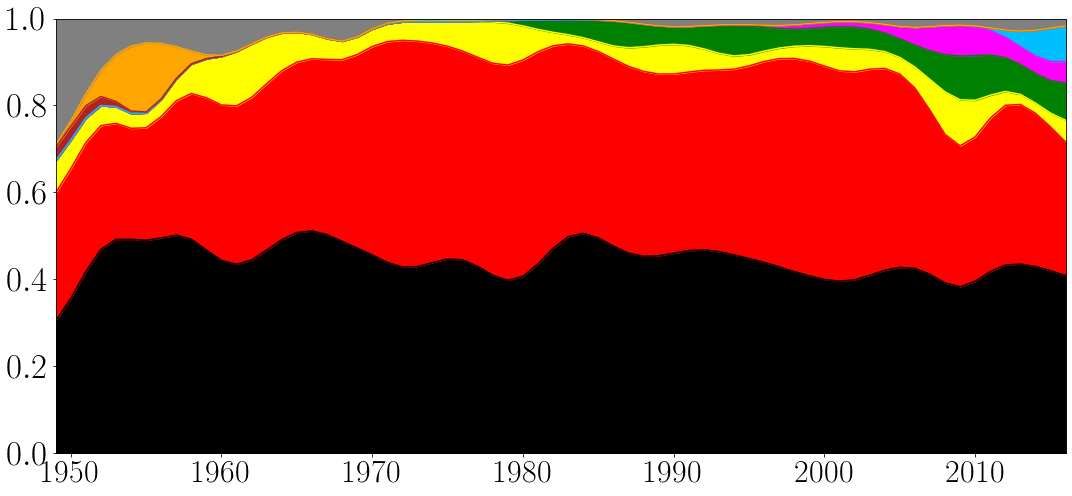

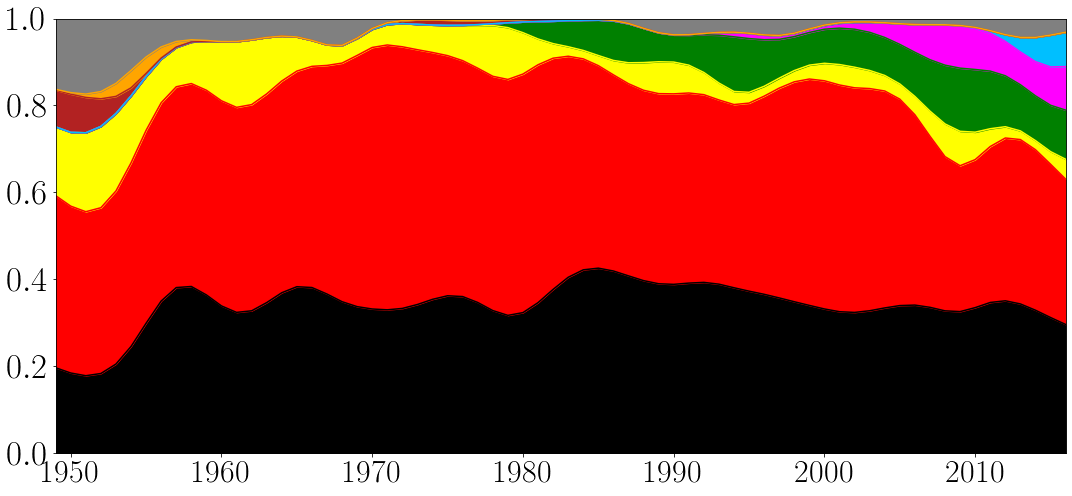

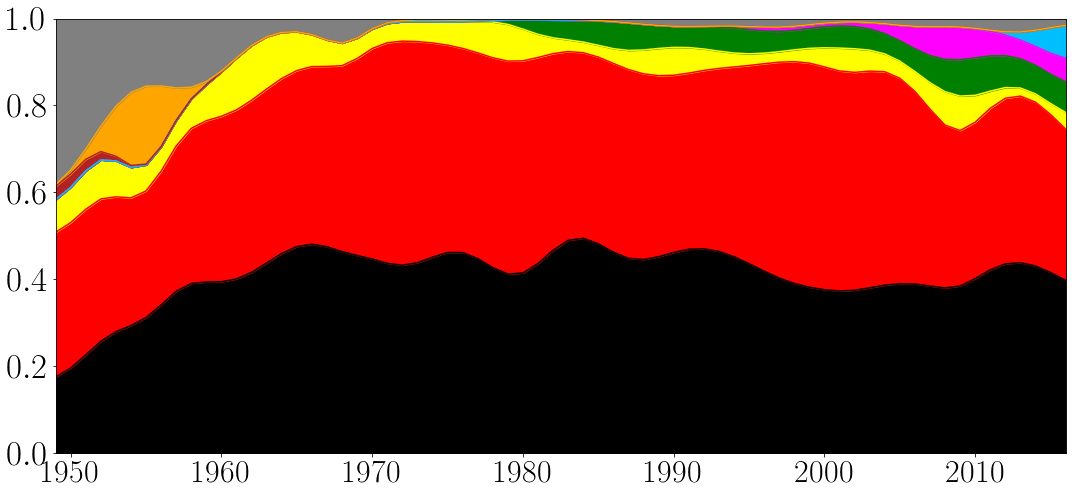

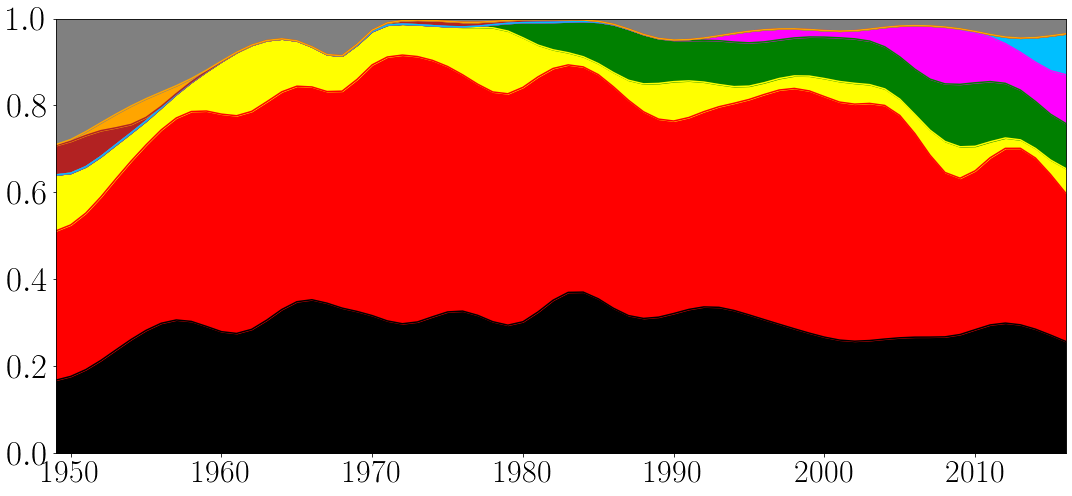

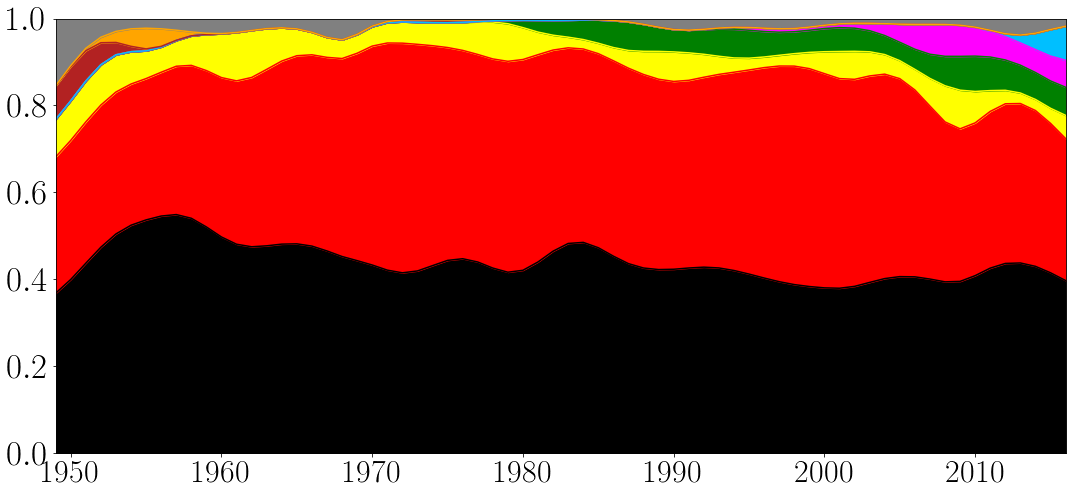

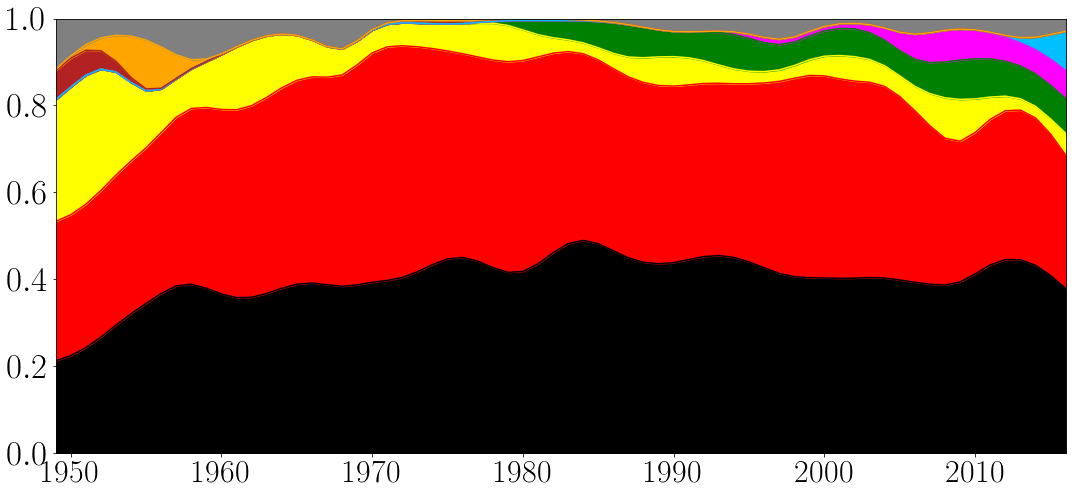

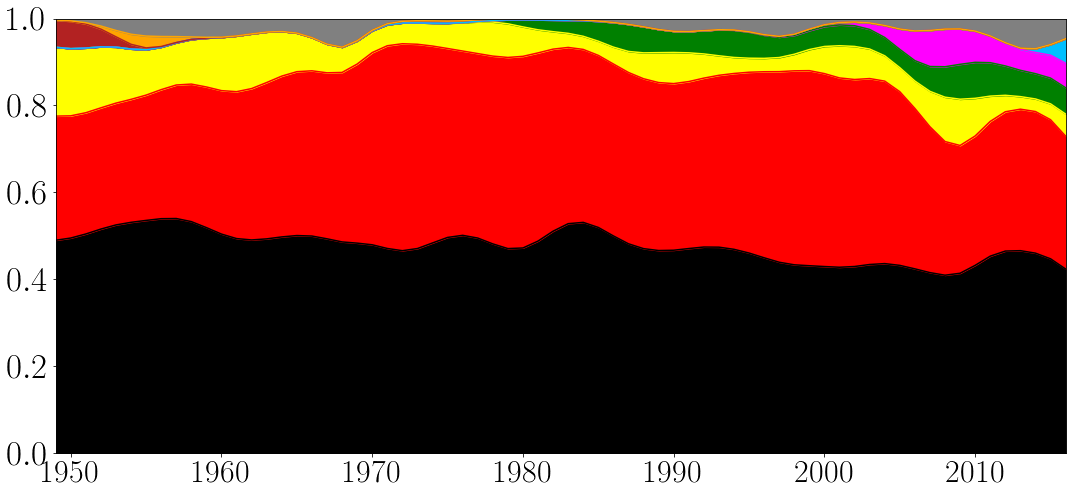

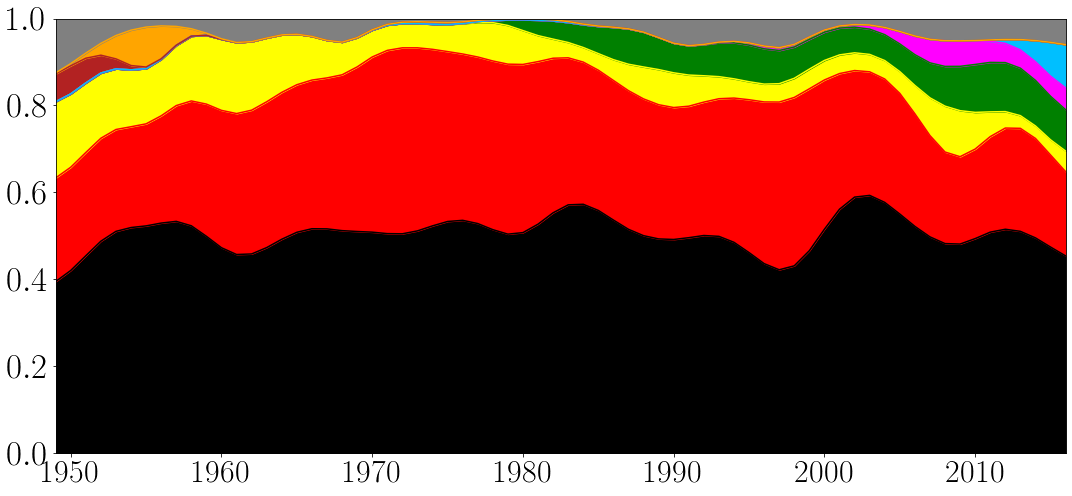

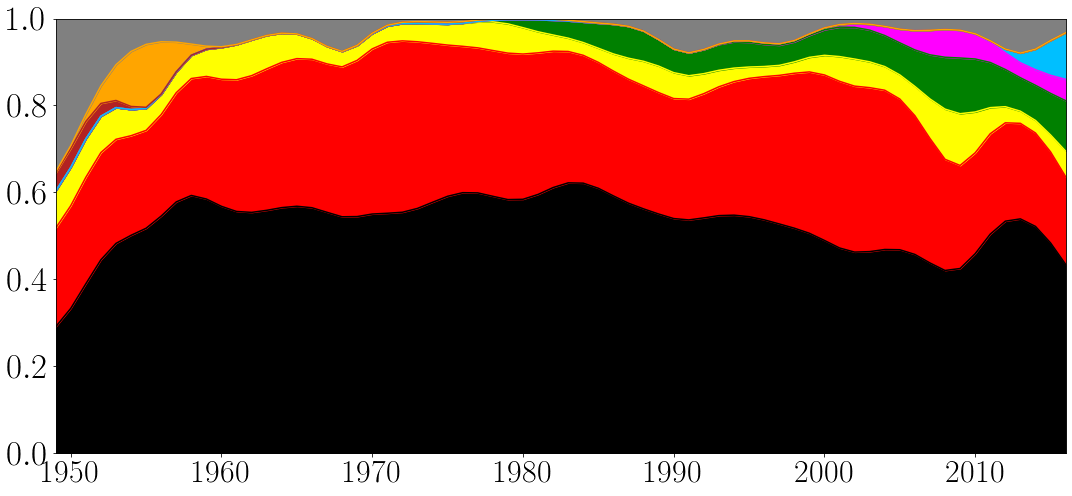

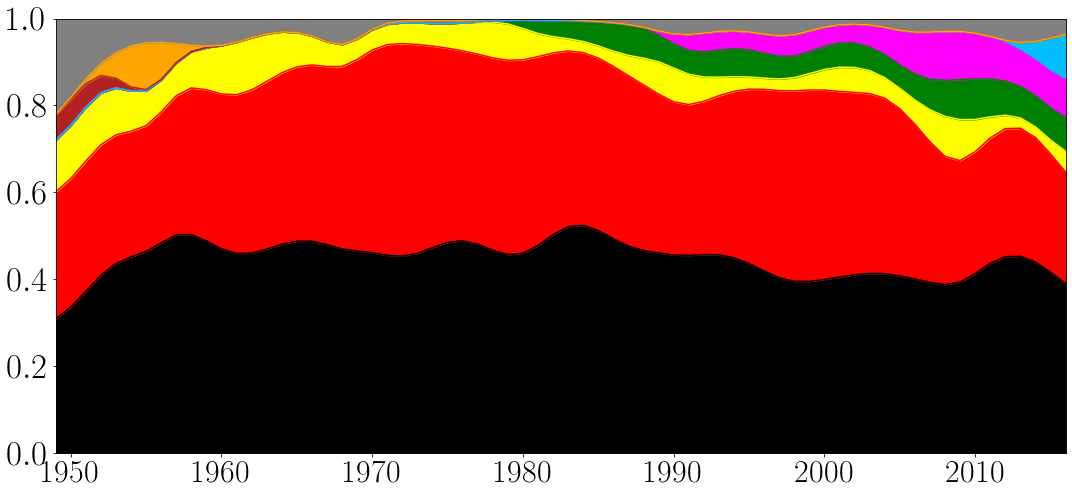

In [21]:
sm_cum_results = [sm_cumulative_SH, sm_cumulative_HH, sm_cumulative_NS, sm_cumulative_HB, sm_cumulative_NW, 
                  sm_cumulative_HS, sm_cumulative_RP, sm_cumulative_BW, sm_cumulative_BY, sm_cumulative_ger]

filenames = ['election_SH.pdf', 'election_HH.pdf', 'election_NS.pdf', 'election_HB.pdf', 'election_NW.pdf', 
             'election_HS.pdf', 'election_RP.pdf', 'election_BW.pdf', 'election_BY.pdf', 'election_ger.pdf']

for i in range(len(sm_cum_results)):
    
    r = sm_cum_results[i]
    v = results_v[i]
    plot_cum_results(r, v, save=False, filename=filenames[i], legend=False)

In [22]:
# data prep for the GP+LM samples

election_GP_samples = out["spost"]
print(election_GP_samples.shape)

election_GP_samples = election_GP_samples.reshape((n_GP_samples,-1, n_regions*n_parties))
print(election_GP_samples.shape)

test_1_SH_GP_s = election_GP_samples[:, :, :n_parties]
test_1_HH_GP_s = election_GP_samples[:, :, n_parties:2*n_parties]
test_1_NS_GP_s = election_GP_samples[:, :, 2*n_parties:3*n_parties]
test_1_HB_GP_s = election_GP_samples[:, :, 3*n_parties:4*n_parties]
test_1_NW_GP_s = election_GP_samples[:, :, 4*n_parties:5*n_parties]
test_1_HS_GP_s = election_GP_samples[:, :, 5*n_parties:6*n_parties]
test_1_RP_GP_s = election_GP_samples[:, :, 6*n_parties:7*n_parties]
test_1_BW_GP_s = election_GP_samples[:, :, 7*n_parties:8*n_parties]
test_1_BY_GP_s = election_GP_samples[:, :, 8*n_parties:9*n_parties]
test_1_ger_GP_s = election_GP_samples[:, :, 9*n_parties:10*n_parties]

sm_results_SH_GP_s = np.array([softmax_batch(s_i) for s_i in test_1_SH_GP_s]) 
sm_cumulative_SH_GP_s = np.cumsum(sm_results_SH_GP_s, 2)

sm_results_HH_GP_s = np.array([softmax_batch(s_i) for s_i in test_1_HH_GP_s]) 
sm_cumulative_HH_GP_s = np.cumsum(sm_results_HH_GP_s, 2)

sm_results_NS_GP_s = np.array([softmax_batch(s_i) for s_i in test_1_NS_GP_s]) 
sm_cumulative_NS_GP_s = np.cumsum(sm_results_NS_GP_s, 2)

sm_results_HB_GP_s = np.array([softmax_batch(s_i) for s_i in test_1_HB_GP_s]) 
sm_cumulative_HB_GP_s = np.cumsum(sm_results_HB_GP_s, 2)

sm_results_NW_GP_s = np.array([softmax_batch(s_i) for s_i in test_1_NW_GP_s]) 
sm_cumulative_NW_GP_s = np.cumsum(sm_results_NW_GP_s, 2)

sm_results_HS_GP_s = np.array([softmax_batch(s_i) for s_i in test_1_HS_GP_s]) 
sm_cumulative_HS_GP_s = np.cumsum(sm_results_HS_GP_s, 2)

sm_results_RP_GP_s = np.array([softmax_batch(s_i) for s_i in test_1_RP_GP_s]) 
sm_cumulative_RP_GP_s = np.cumsum(sm_results_RP_GP_s, 2)

sm_results_BW_GP_s = np.array([softmax_batch(s_i) for s_i in test_1_BW_GP_s]) 
sm_cumulative_BW_GP_s = np.cumsum(sm_results_BW_GP_s, 2)

sm_results_BY_GP_s = np.array([softmax_batch(s_i) for s_i in test_1_BY_GP_s]) 
sm_cumulative_BY_GP_s = np.cumsum(sm_results_BY_GP_s, 2)

sm_results_ger_GP_s = np.array([softmax_batch(s_i) for s_i in test_1_ger_GP_s]) 
sm_cumulative_ger_GP_s = np.cumsum(sm_results_ger_GP_s, 2)

print(np.shape(sm_results_SH_GP_s))
print(np.shape(sm_cumulative_SH_GP_s))

(50, 6120)
(50, 68, 90)
(50, 68, 9)
(50, 68, 9)


In [23]:
# create plot for samples instead of color strengths


def plot_samples_cum(samples_cum, sm_results_cum, save=False, filename='test.pdf', x=T_x, legend=False):
    
    plt.rc('text', usetex=True)
    plt.rc('xtick', labelsize=32)
    plt.rc('ytick', labelsize=35)
    plt.rc('axes', labelsize=35)
    legend_size=28
    #xlabel_size=25
    #ylabel_size=25
    #title_size=25
    lw_size=3
    
    fig = plt.figure(figsize=(15, 7))
    plt.ylim((0.0, 1.00))
    plt.xlim((np.min(T_x), np.max(T_x)))
    
    #plot the means and fill between
    alpha_fill = 0.4
    alpha_samples = 0.6
    
    #"""
    for i in range(n_parties):
        c = party_colors[parties[i]]
        
        plt.plot(x, sm_results_cum[:, i], label=parties[i], color=c)
        y2 = sm_results_cum[:, i].astype('float')
        if i == 0:
            plt.fill_between(x, y1=np.zeros(len(sm_results_cum)), y2=y2, color=c, alpha=alpha_fill)
        else:
            y1 = sm_results_cum[:, i-1].astype('float')
            plt.fill_between(x, y1=y1, y2=y2, color=c, alpha=alpha_fill)
    #"""
    
    #plot all samples
    for s in samples_cum:
        
        for i in range(n_parties):
            c = party_colors[parties[i]]
            
            plt.plot(x, s[:, i], label=parties[i], color=c, alpha=alpha_samples)
            
            """
            y2 = s[:, i].astype('float')
            if i == 0:
                plt.fill_between(x, y1=np.zeros(len(s)), y2=y2, color=c, alpha=alpha_fill)
            else:
                y1 = s[:, i-1].astype('float')
                plt.fill_between(x, y1=y1, y2=y2, color=c, alpha=alpha_fill)
            """    
    
    
    if legend:
        leg = plt.legend(prop={'size': legend_size}) 
        # set the linewidth of each legend object
        for legobj in leg.legendHandles:
            legobj.set_linewidth(15.0)
        
    fig.tight_layout()
    if save:
        plt.savefig(filename)
        plt.show();
        
        

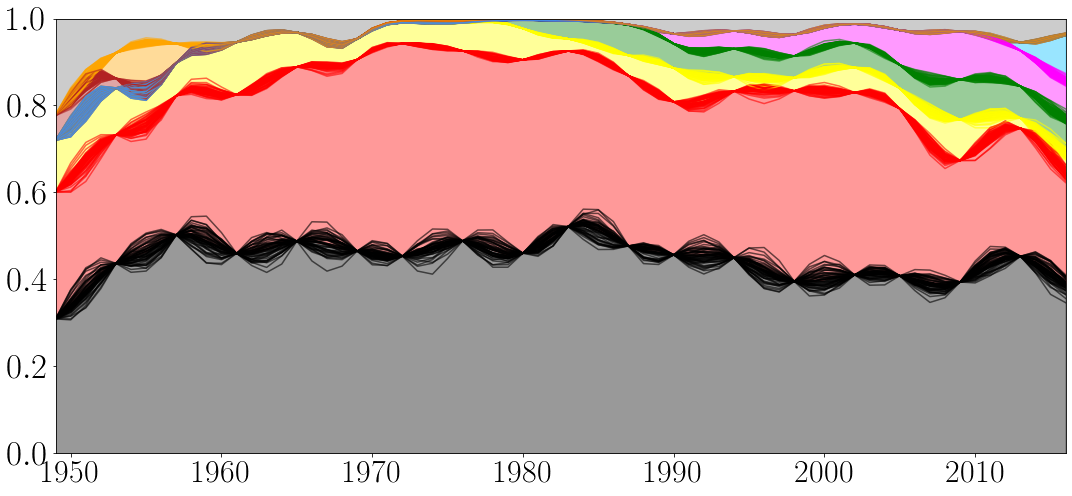

In [24]:
# plot it

plot_samples_cum(sm_cumulative_ger_GP_s, sm_cumulative_ger, save=False, filename='elections_GP_samples.pdf', legend=False)

In [25]:
# create plot for samples instead of color strengths
import matplotlib.colors as mcolors
from matplotlib.patches import Polygon


def plot_samples_cum2(samples_cum, sm_results_cum, results_v, save=False, filename='test.pdf', x=T_x, legend=False):
    
    plt.rc('text', usetex=True)
    plt.rc('xtick', labelsize=32)
    plt.rc('ytick', labelsize=35)
    plt.rc('axes', labelsize=35)
    legend_size=28
    #xlabel_size=25
    #ylabel_size=25
    #title_size=25
    lw_size=3
    
    fig = plt.figure(figsize=(15, 7))
    plt.ylim((0.0, 1.00))
    plt.xlim((np.min(T_x), np.max(T_x)))
    
    #plot the means and fill between
    alpha_fill = 0.4
    alpha_samples = 0.6
    
    #"""
    lb = 0
    r_prev = np.zeros(x.max() - x.min()+1)
    
    v_min, v_max = results_v.min(), results_v.max()
    for i in range(n_parties):
        
        c = party_colors[parties[i]]
        r = sm_results_cum[:,i].astype('float')
        n = len(r)
        v = results_v[:, i].astype('float')

        y_min, y_max = r.min(), r.max()
        x_min, x_max = x.min(), x.max()
        
        ax = plt.gca()
        line, = ax.plot(x, r, color=c, label = parties[i])
            
        zorder = line.get_zorder()
        
        z = np.empty((x_max - x_min+1, 1, 4), dtype=float)
        c_norm = 1/v * v_min
        rgb = mcolors.colorConverter.to_rgb(c)
        z[:,:,:3] = rgb
        z[:,:,-1] = c_norm.reshape(-1,1)
        z = z.reshape(1, -1, 4)
        
        im = ax.imshow(z, aspect='auto', extent=[x_min, x_max, lb, y_max], origin='lower', zorder=zorder)
        
        xy = np.column_stack([x, r])
        xy_prev = np.column_stack([x, r_prev])[::-1]
        xy = np.vstack([[x_min, lb], xy, [x_max, lb], xy_prev])
        clip_path = Polygon(xy, facecolor='none', edgecolor='none', closed=True)
        ax.add_patch(clip_path)
        im.set_clip_path(clip_path)
        
        lb = y_min
        r_prev = r
    #"""
    
    #plot all samples
    for s in samples_cum:
        
        for i in range(n_parties):
            c = party_colors[parties[i]]
            
            plt.plot(x, s[:, i], label=parties[i], color=c, alpha=alpha_samples)
            
            """
            y2 = s[:, i].astype('float')
            if i == 0:
                plt.fill_between(x, y1=np.zeros(len(s)), y2=y2, color=c, alpha=alpha_fill)
            else:
                y1 = s[:, i-1].astype('float')
                plt.fill_between(x, y1=y1, y2=y2, color=c, alpha=alpha_fill)
            """    
    
    
    if legend:
        leg = plt.legend(prop={'size': legend_size}) 
        # set the linewidth of each legend object
        for legobj in leg.legendHandles:
            legobj.set_linewidth(15.0)
        
    fig.tight_layout()
    if save:
        plt.savefig(filename)
        plt.show();
        
        

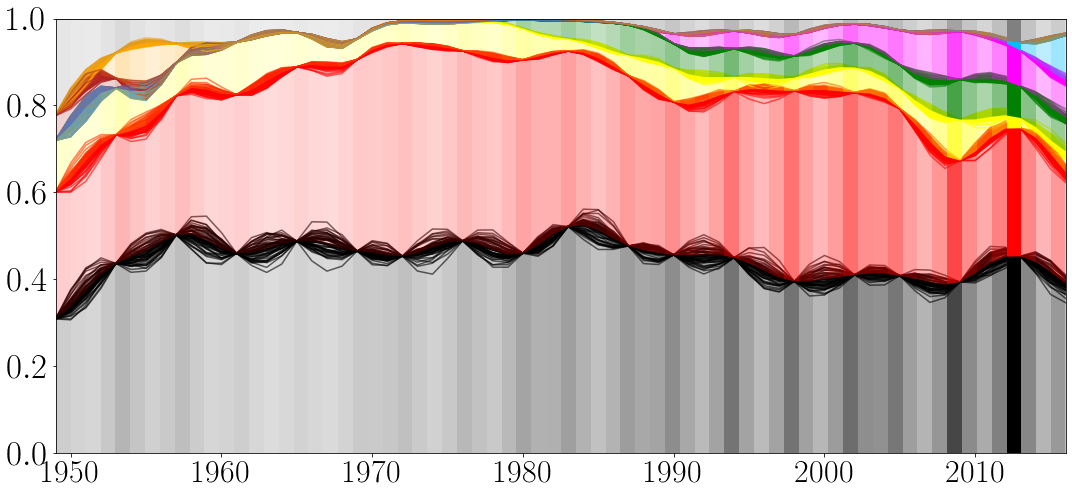

In [26]:
# plot it

plot_samples_cum2(sm_cumulative_ger_GP_s, sm_cumulative_ger, test_1_ger_v, save=False, filename='elections_GP_samples.pdf', legend=False)

In [27]:
print(T_x)
print(years)

[1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962
 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976
 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990
 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004
 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016]
[1949, 1953, 1957, 1961, 1965, 1969, 1972, 1976, 1980, 1983, 1987, 1990, 1994, 1998, 2002, 2005, 2009, 2013, 2017]


In [28]:
import matplotlib.colors as mcolors
from matplotlib.patches import Polygon

def plot_cum_results2(sm_results_cum, results_v, x=T_x, save=False, filename='test.pdf', legend=True):

    plt.rc('text', usetex=True)
    plt.rc('xtick', labelsize=32)
    plt.rc('ytick', labelsize=35)
    plt.rc('axes', labelsize=35)
    legend_size=28
    #xlabel_size=25
    #ylabel_size=25
    #title_size=25
    lw_size=3
    
    plt.figure(figsize=(15, 7))
    plt.ylim((0.0, 1.00))
    lb = 0
    r_prev = np.zeros(x.max() - x.min()+1)
    
    v_min, v_max = results_v.min(), results_v.max()
    for i in range(n_parties):
        
        c = party_colors[parties[i]]
        r = sm_results_cum[:,i].astype('float')
        n = len(r)
        v = results_v[:, i].astype('float')
        #v_min, v_max = v.min(), v.max()
        #c = mc.to_rgba_array(c).reshape(-1,4)
        #c_a = np.tile(c,(n,1)).reshape(-1,4)
        #c_a[:, -1] = v
        #c_a = [tuple(x.reshape(-1)) for x in c_a]
        #print(c_a)
        
        #ax = plt.gca()
        y_min, y_max = r.min(), r.max()
        x_min, x_max = x.min(), x.max()
        
        ax = plt.gca()
        line, = ax.plot(x, r, color=c, label = parties[i])
            
        zorder = line.get_zorder()
        
        z = np.empty((x_max - x_min+1, 1, 4), dtype=float)
        c_norm = 1/v * v_min
        rgb = mcolors.colorConverter.to_rgb(c)
        z[:,:,:3] = rgb
        z[:,:,-1] = c_norm.reshape(-1,1)
        z = z.reshape(1, -1, 4)
        
        im = ax.imshow(z, aspect='auto', extent=[x_min, x_max, lb, y_max], origin='lower', zorder=zorder)
        
        xy = np.column_stack([x, r])
        xy_prev = np.column_stack([x, r_prev])[::-1]
        #print(xy_prev)
        xy = np.vstack([[x_min, lb], xy, [x_max, lb], xy_prev])
        #xy = np.vstack([[xmin, ymin], xy, [xmax, ymin] , [xmin, ymin]])
        clip_path = Polygon(xy, facecolor='none', edgecolor='none', closed=True)
        ax.add_patch(clip_path)
        im.set_clip_path(clip_path)
        
        lb = y_min
        r_prev = r
    
    if legend:
        plt.legend(prop={'size': legend_size})        

    plt.tight_layout()
    if save:
        plt.savefig(filename)
        plt.show();

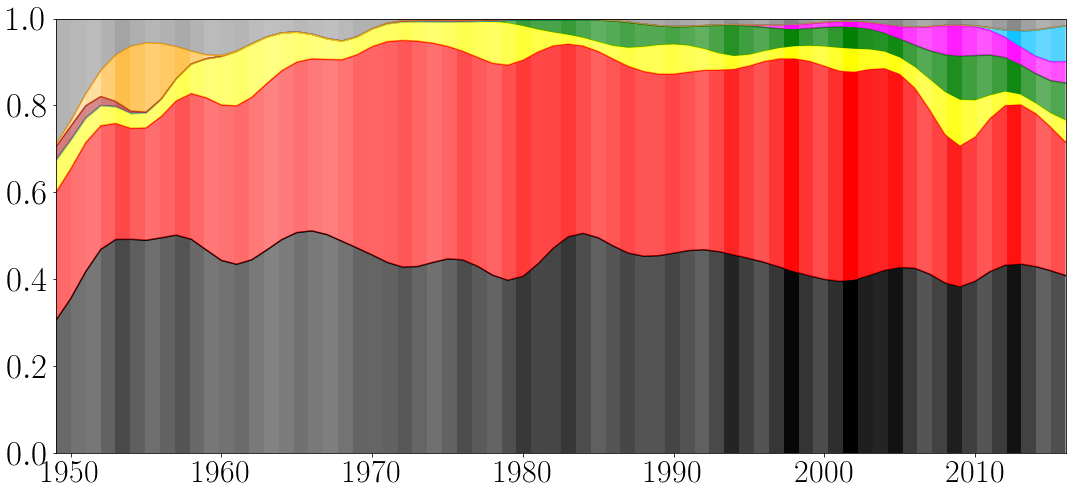

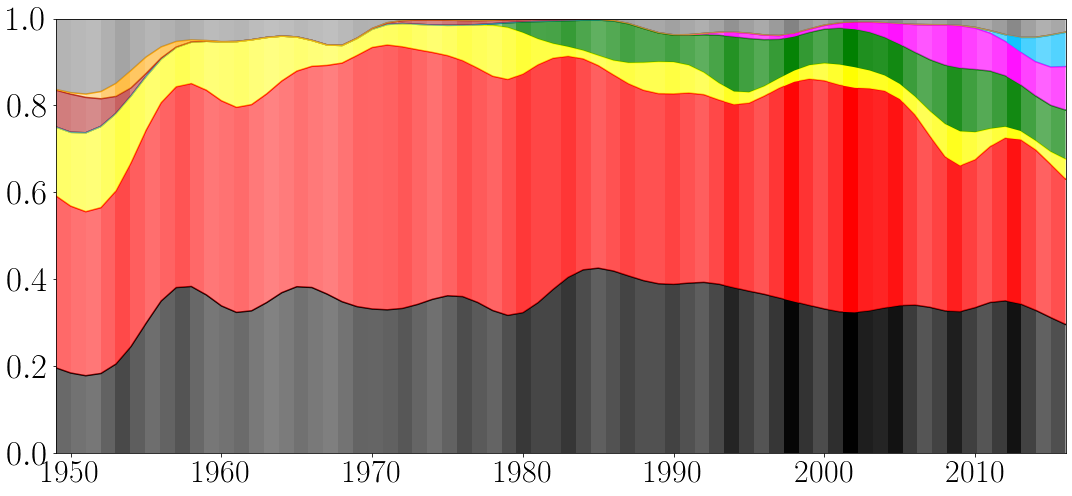

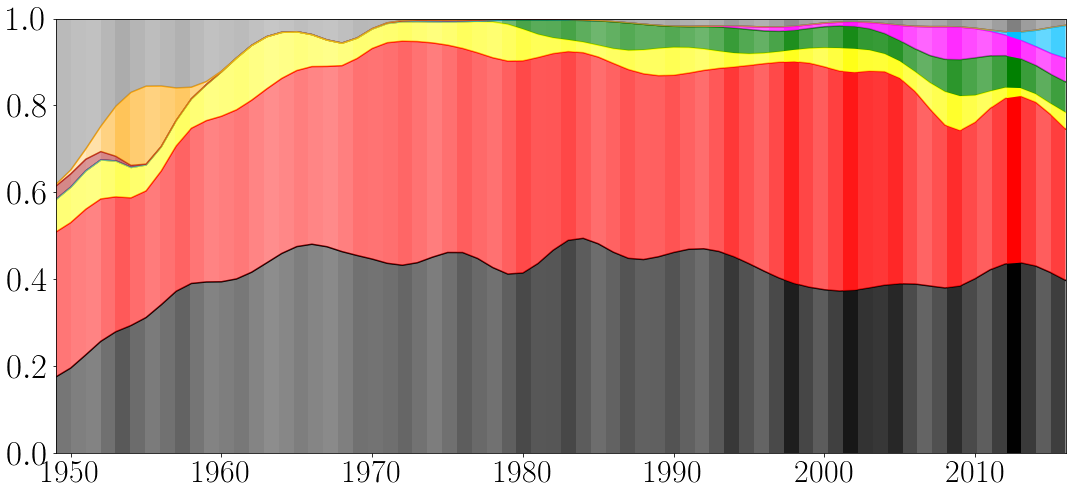

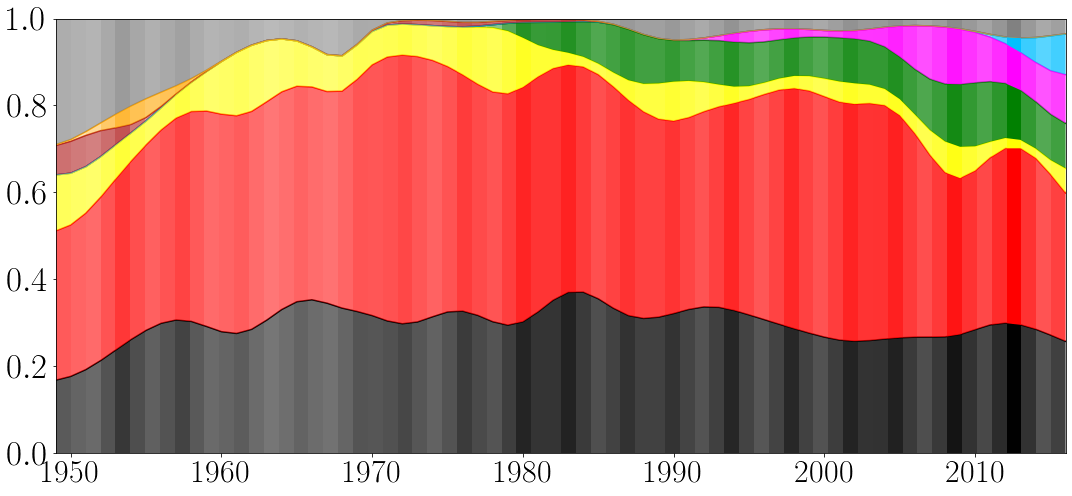

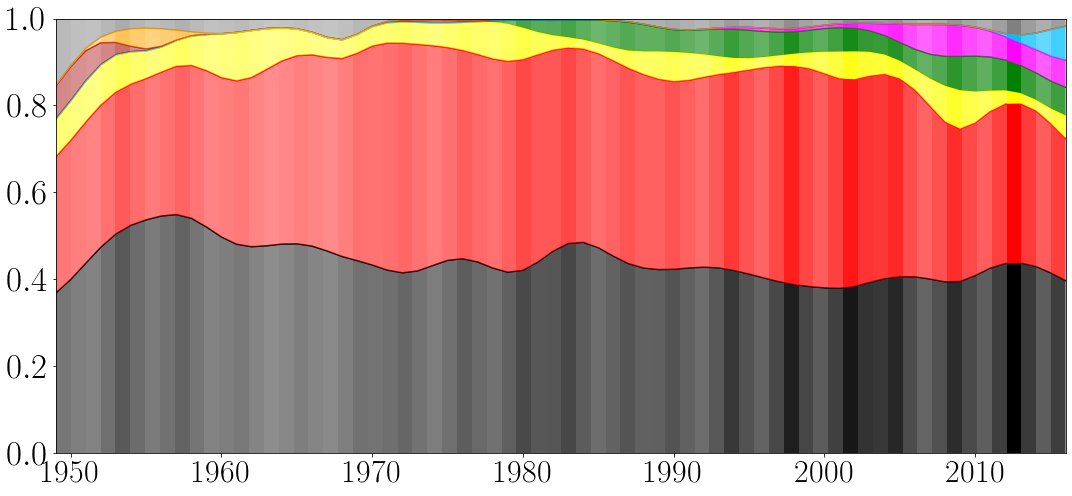

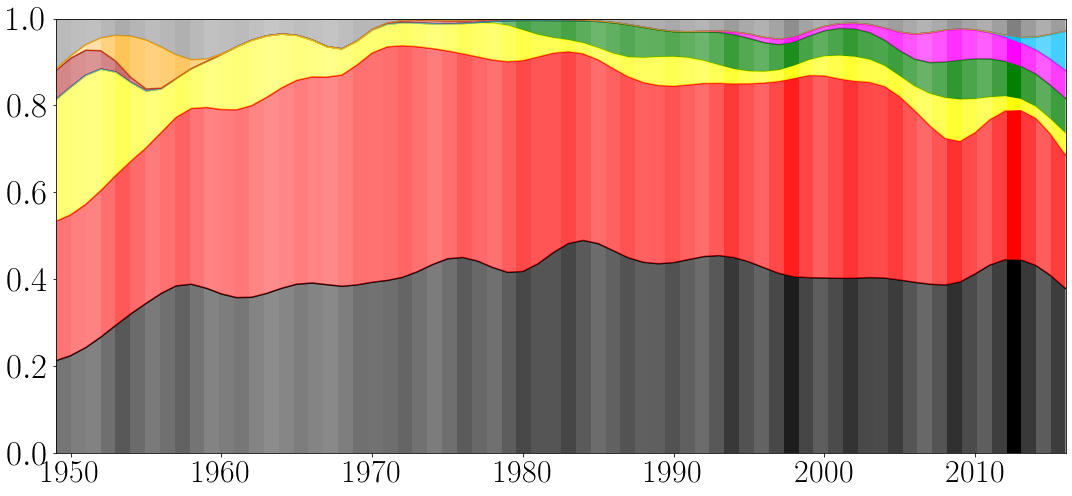

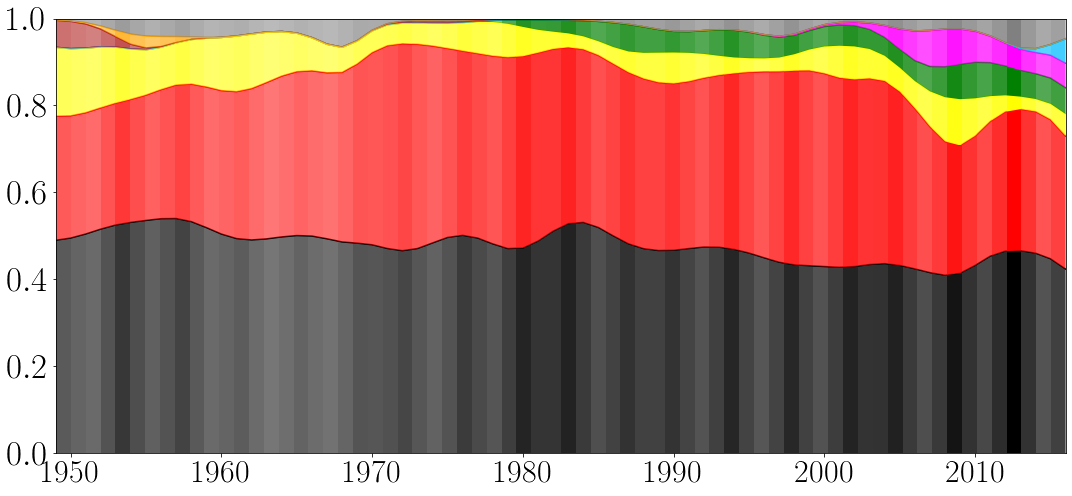

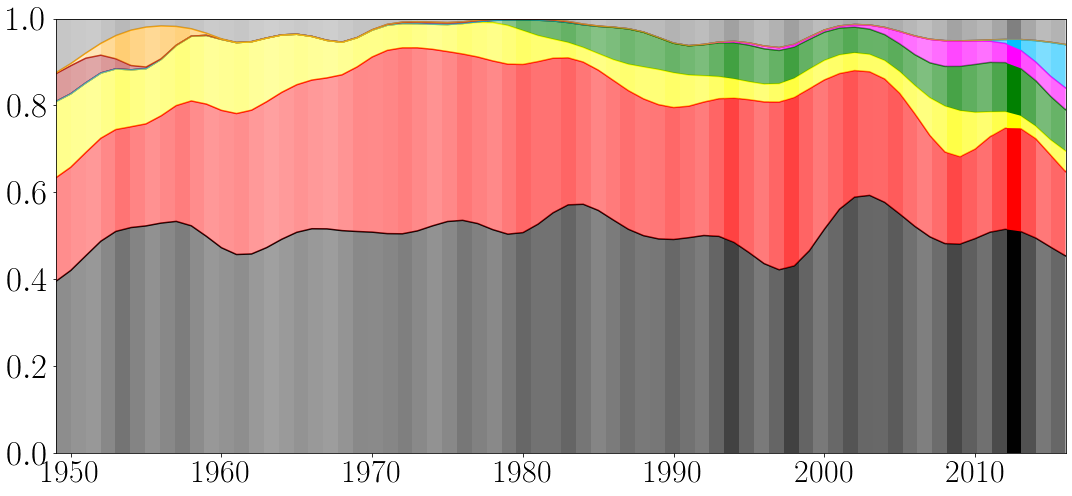

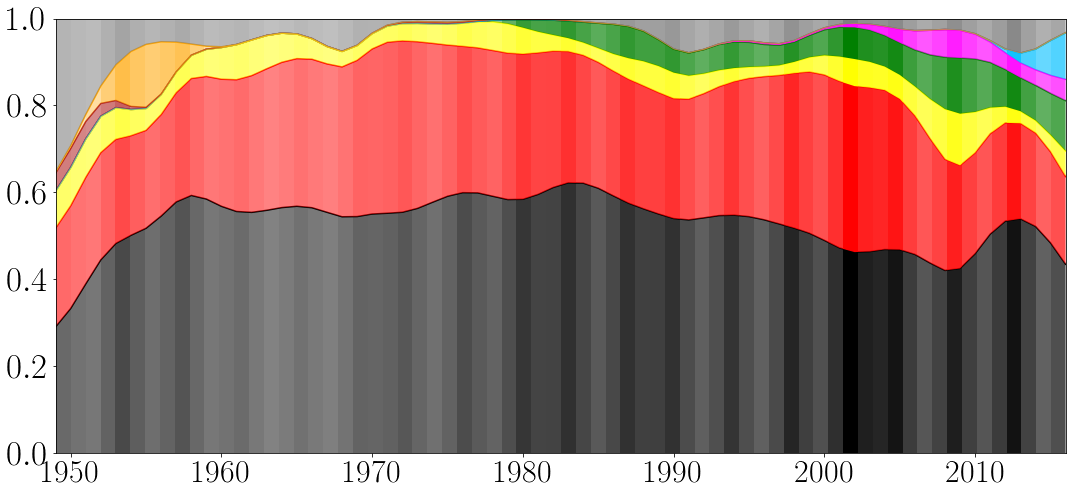

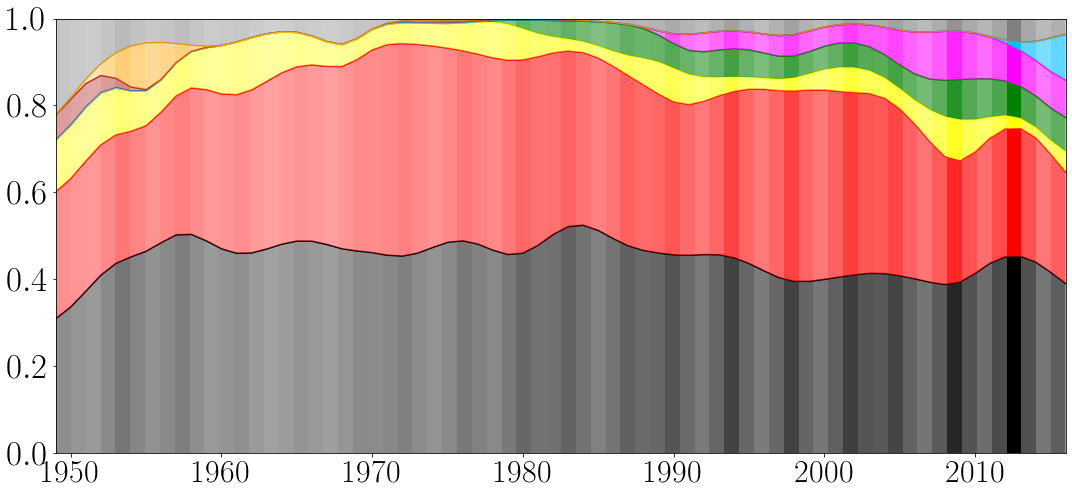

In [29]:
sm_cum_results = [sm_cumulative_SH, sm_cumulative_HH, sm_cumulative_NS, sm_cumulative_HB, sm_cumulative_NW, 
                  sm_cumulative_HS, sm_cumulative_RP, sm_cumulative_BW, sm_cumulative_BY, sm_cumulative_ger]

if ignore_2009:
    filenames2 = ['election_SH_wo_2009.png', 'election_HH_wo_2009.png', 'election_NS_wo_2009.png', 
              'election_HB_wo_2009.png', 'election_NW_wo_2009.png', 'election_HS_wo_2009.png',
              'election_RP_wo_2009.png', 'election_BW_wo_2009.png', 'election_BY_wo_2009.png',
              'election_ger_wo_2009.png']
elif predict_2029:
    filenames2 = ['election_SH_2029.png', 'election_HH_2029.png', 'election_NS_2029.png', 
                  'election_HB_2029.png', 'election_NW_2029.png', 'election_HS_2029.png', 
                  'election_RP_2029.png', 'election_BW_2029.png', 'election_BY_2029.png', 'election_ger_2029.png']
else:
    filenames2 = ['election_SH.png', 'election_HH.png', 'election_NS.png', 'election_HB.png', 'election_NW.png',
              'election_HS.png', 'election_RP.png', 'election_BW.png', 'election_BY.png', 'election_ger.png']



for i in range(len(sm_cum_results)):
    
    r = sm_cum_results[i]
    v = np.sqrt(results_v[i])
    plot_cum_results2(r, v, save=False, filename=filenames2[i], legend=False)
    

# Compare this to elliptical slice sampling

In [30]:
#
# Elliptical slice sampling
#
import math
def elliptical_slice(initial_theta,prior,lnpdf,pdf_params=(),
                     cur_lnpdf=None,angle_range=None):
    """
    NAME:
       elliptical_slice
    PURPOSE:
       Markov chain update for a distribution with a Gaussian "prior" factored out
    INPUT:
       initial_theta - initial vector
       prior - cholesky decomposition of the covariance matrix 
               (like what numpy.linalg.cholesky returns), 
               or a sample from the prior
       lnpdf - function evaluating the log of the pdf to be sampled
       pdf_params= parameters to pass to the pdf
       cur_lnpdf= value of lnpdf at initial_theta (optional)
       angle_range= Default 0: explore whole ellipse with break point at
                    first rejection. Set in (0,2*pi] to explore a bracket of
                    the specified width centred uniformly at random.
    OUTPUT:
       new_theta, new_lnpdf
    HISTORY:
       Originally written in matlab by Iain Murray (http://homepages.inf.ed.ac.uk/imurray2/pub/10ess/elliptical_slice.m)
       2012-02-24 - Written - Bovy (IAS)
    """
    D= len(initial_theta)
    if cur_lnpdf is None:
        cur_lnpdf= lnpdf(initial_theta,*pdf_params)

    # Set up the ellipse and the slice threshold
    if len(prior.shape) == 1: #prior = prior sample
        nu= prior
        print("first condition is True")
    else: #prior = cholesky decomp
        if not prior.shape[0] == D or not prior.shape[1] == D:
            raise IOError("Prior must be given by a D-element sample or DxD chol(Sigma)")
        nu= np.dot(prior,np.random.normal(size=D))
    hh = math.log(np.random.uniform()) + cur_lnpdf

    # Set up a bracket of angles and pick a first proposal.
    # "phi = (theta'-theta)" is a change in angle.
    if angle_range is None or angle_range == 0.:
        # Bracket whole ellipse with both edges at first proposed point
        phi= np.random.uniform()*2.*math.pi
        phi_min= phi-2.*math.pi
        phi_max= phi
    else:
        # Randomly center bracket on current point
        phi_min= -angle_range*np.random.uniform()
        phi_max= phi_min + angle_range
        phi= np.random.uniform()*(phi_max-phi_min)+phi_min

    #print("nu: ", np.shape(nu))
    #print("nu*math.sin(phi): ", np.shape(nu*math.sin(phi)))
    #print("initial_theta*math.cos(phi): ", np.shape(initial_theta*math.cos(phi)))
        
    # Slice sampling loop
    while True:
        # Compute xx for proposed angle difference and check if it's on the slice
        xx_prop = (initial_theta*math.cos(phi)).reshape(-1) + (nu*math.sin(phi)).reshape(-1)
        #print("xx_prop: ", np.shape(xx_prop))
        cur_lnpdf = lnpdf(xx_prop,*pdf_params)
        if cur_lnpdf > hh:
            # New point is on slice, ** EXIT LOOP **
            break
        # Shrink slice to rejected point
        if phi > 0:
            phi_max = phi
        elif phi < 0:
            phi_min = phi
        else:
            raise RuntimeError('BUG DETECTED: Shrunk to current position and still not acceptable.')
        # Propose new angle difference
        phi = np.random.uniform()*(phi_max - phi_min) + phi_min
    return (xx_prop,cur_lnpdf)

In [31]:
# apply the ESS algorithm to get samples
from scipy.special import logsumexp

y_values = medium_df.reset_index(drop=True).values

# define the log-likelihood as log prod_t prod_c prod_p softmax(f(t,c))[p]^y[t,c,p]
# we can pull the log in to get sums and logsumexps for the softmax

def log_likelihood(x, y=y_values, n_parties=n_parties):
    #TODO: what is x, y, n_parties
    
    #reshape the vector such that we have p columns for the parties and every row is one [t,c]
    x_ = x.reshape(-1, n_parties)
    y_ = y.reshape(-1, n_parties)
    
    #apply the log softmax to all rows in parallel
    x_sm = x_ - logsumexp(x_, axis=1).reshape(-1, 1)
    
    #take all softmax points to the power of the corresponding vote count y
    x_sm_y = x_sm * y_
    
    #return the sum over everything as the log-likelihood
    return(np.sum(x_sm_y))

n_samples = 5000
burn_in = 0#25000 #100000 #after 25000 there are only minor improvements in ll. 

"""
# draw the first f_x from our prior GP with mean 0 and Cov k_XX
f_x = multivariate_normal(
    np.zeros(n), K_XX, size=1
).T
"""

# 'cheat' by choosing the init from the true observed probabilities
y_norm = np.array(y_values/y_values.sum(1).reshape(-1,1), dtype=float) + 10e-8 # <- to prevent the 0s
log_ = np.log(y_norm)
f_x = log_ - log_.sum(1).reshape(-1,1)
f_x = f_x.reshape(-1)

L = np.linalg.cholesky(G_)

post_samples = np.zeros((n_samples, n))

print("L: ", np.shape(L))

t0 = time.time()
# get many samples with ESS
for i in range(-burn_in, n_samples):
    #sample one sample
    f_x, ll = elliptical_slice(initial_theta=f_x, prior=L, lnpdf=log_likelihood) 
    if i % 50 == 0: 
            print("iteration: ", i)
            print("log-likelihood: ", ll)
    if i >= 0:
        post_samples[i] = f_x
        
t1 = time.time()
print("time to take samples: ", t1-t0)



L:  (1710, 1710)
iteration:  0
log-likelihood:  -1660738546.172067
iteration:  50
log-likelihood:  -1660738556.8440368
iteration:  100
log-likelihood:  -1660738565.5548518
iteration:  150
log-likelihood:  -1660738570.9847858
iteration:  200
log-likelihood:  -1660738583.3953831
iteration:  250
log-likelihood:  -1660738593.1449776
iteration:  300
log-likelihood:  -1660738599.246154
iteration:  350
log-likelihood:  -1660738608.3516939
iteration:  400
log-likelihood:  -1660738613.189498
iteration:  450
log-likelihood:  -1660738622.3844192
iteration:  500
log-likelihood:  -1660738628.280888
iteration:  550
log-likelihood:  -1660738624.9692862
iteration:  600
log-likelihood:  -1660738630.1635451
iteration:  650
log-likelihood:  -1660738629.0625343
iteration:  700
log-likelihood:  -1660738632.8311055
iteration:  750
log-likelihood:  -1660738636.469568
iteration:  800
log-likelihood:  -1660738634.2771678
iteration:  850
log-likelihood:  -1660738631.2936704
iteration:  900
log-likelihood:  -166

In [32]:
# check out predictions

K = out["vpost"] 

print(np.shape(post_samples))

sample_mean = post_samples.mean(axis=0)
sample_std = post_samples.std(axis=0)

(5000, 1710)


In [33]:
sample_post = A @ sample_mean
sample_post_s = np.diag(K)

In [34]:
sample_post = sample_post.reshape((-1, n_regions*n_parties))
sample_std = sample_post_s.reshape((-1, n_regions*n_parties))

s_mean_SH = sample_post[:, :n_parties]
s_mean_HH = sample_post[:, n_parties:2*n_parties]
s_mean_NS = sample_post[:, 2*n_parties:3*n_parties]
s_mean_HB = sample_post[:, 3*n_parties:4*n_parties]
s_mean_NW = sample_post[:, 4*n_parties:5*n_parties]
s_mean_HS = sample_post[:, 5*n_parties:6*n_parties]
s_mean_RP = sample_post[:, 6*n_parties:7*n_parties]
s_mean_BW = sample_post[:, 7*n_parties:8*n_parties]
s_mean_BY = sample_post[:, 8*n_parties:9*n_parties]
s_mean_ger = sample_post[:, 9*n_parties:10*n_parties]

s_SH_v = sample_std[:, :n_parties]
s_HH_v = sample_std[:, n_parties:2*n_parties]
s_NS_v = sample_std[:, 2*n_parties:3*n_parties]
s_HB_v = sample_std[:, 3*n_parties:4*n_parties]
s_NW_v = sample_std[:, 4*n_parties:5*n_parties]
s_HS_v = sample_std[:, 5*n_parties:6*n_parties]
s_RP_v = sample_std[:, 6*n_parties:7*n_parties]
s_BW_v = sample_std[:, 7*n_parties:8*n_parties]
s_BY_v = sample_std[:, 8*n_parties:9*n_parties]
s_ger_v = sample_std[:, 9*n_parties:10*n_parties]

print(np.shape(s_mean_ger))
print(np.shape(s_ger_v))

(68, 9)
(68, 9)


In [35]:
sm_s_results_SH = softmax_batch(s_mean_SH)
sm_s_cumulative_SH = np.cumsum(sm_s_results_SH, 1)

sm_s_results_HH = softmax_batch(s_mean_HH)
sm_s_cumulative_HH = np.cumsum(sm_s_results_HH, 1)

sm_s_results_NS = softmax_batch(s_mean_NS)
sm_s_cumulative_NS = np.cumsum(sm_s_results_NS, 1)

sm_s_results_HB = softmax_batch(s_mean_HB)
sm_s_cumulative_HB = np.cumsum(sm_s_results_HB, 1)

sm_s_results_NW = softmax_batch(s_mean_NW)
sm_s_cumulative_NW = np.cumsum(sm_s_results_NW, 1)

sm_s_results_HS = softmax_batch(s_mean_HS)
sm_s_cumulative_HS = np.cumsum(sm_s_results_HS, 1)

sm_s_results_RP = softmax_batch(s_mean_RP)
sm_s_cumulative_RP = np.cumsum(sm_s_results_RP, 1)

sm_s_results_BW = softmax_batch(s_mean_BW)
sm_s_cumulative_BW = np.cumsum(sm_s_results_BW, 1)

sm_s_results_BY = softmax_batch(s_mean_BY)
sm_s_cumulative_BY = np.cumsum(sm_s_results_BY, 1)

sm_s_results_ger = softmax_batch(s_mean_ger)
sm_s_cumulative_ger = np.cumsum(sm_s_results_ger, 1)

In [36]:
print(np.shape(sm_s_results_ger))
print(np.shape(sm_results_ger))

(68, 9)
(68, 9)


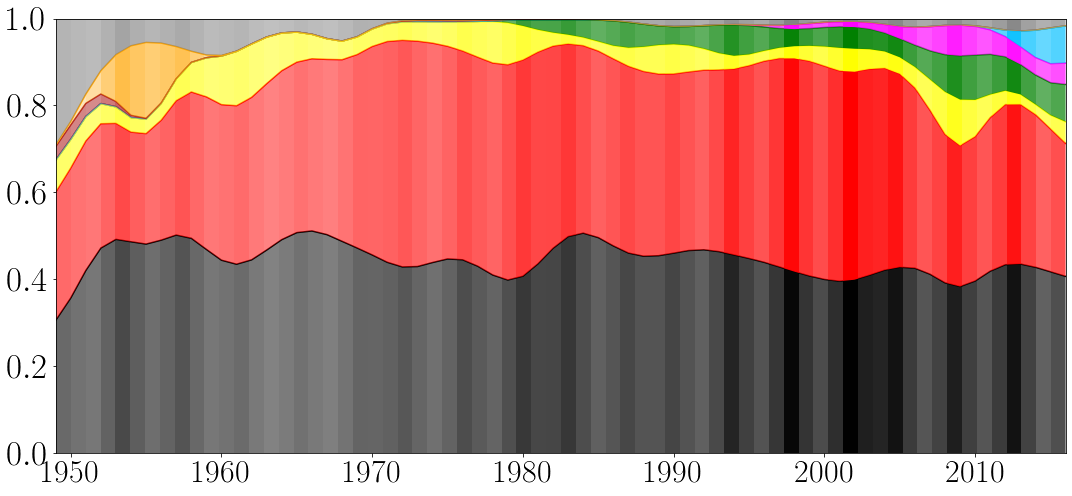

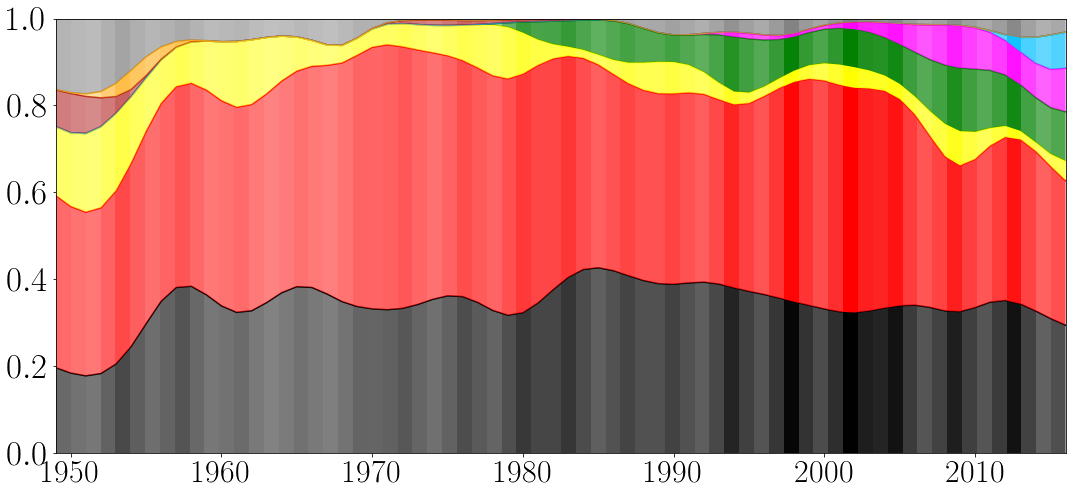

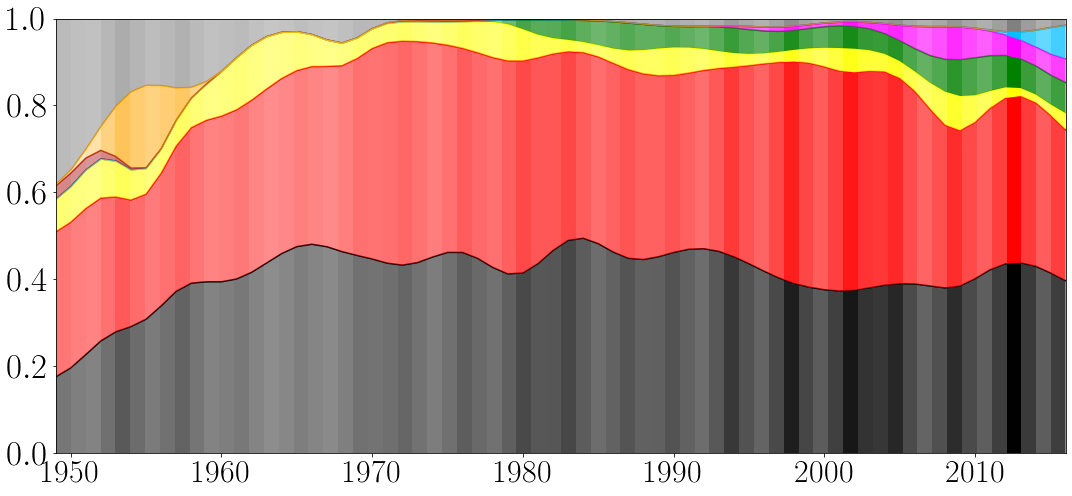

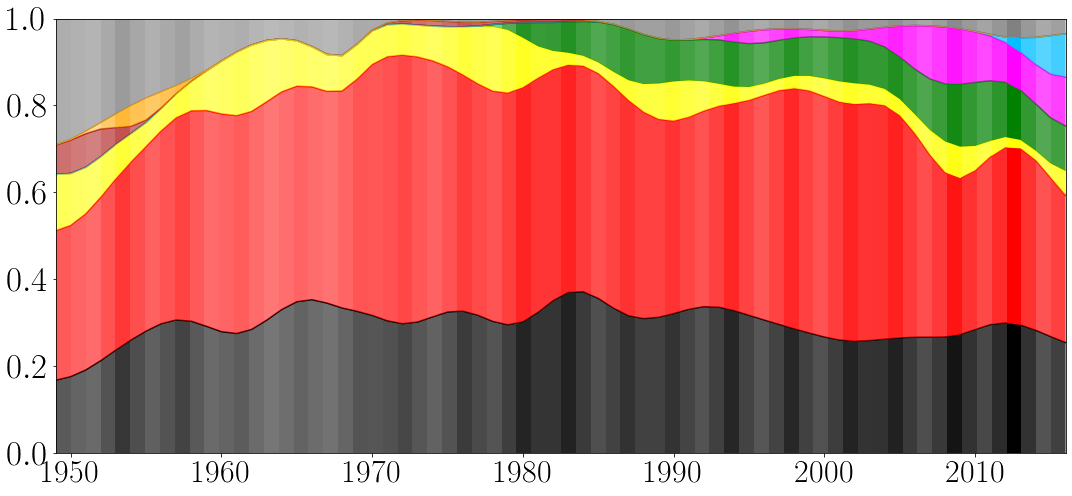

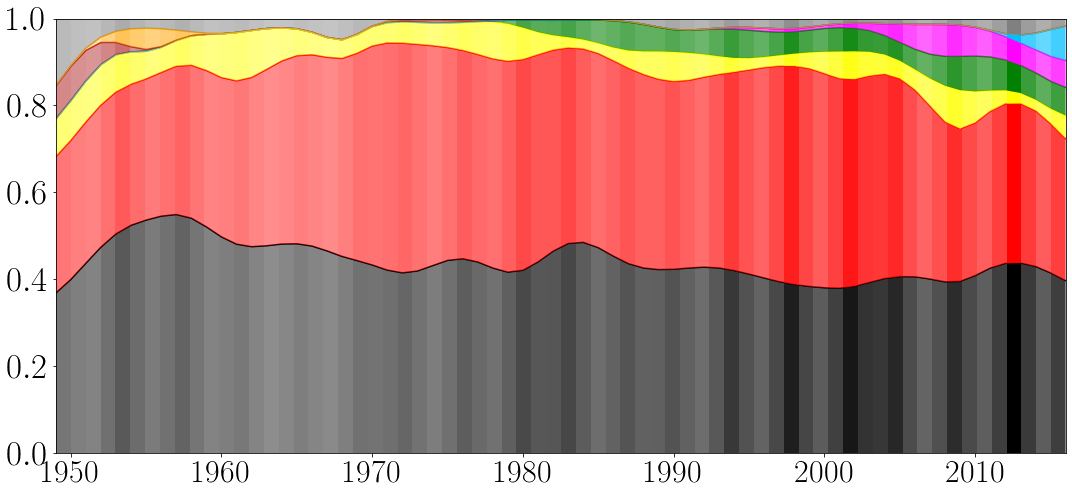

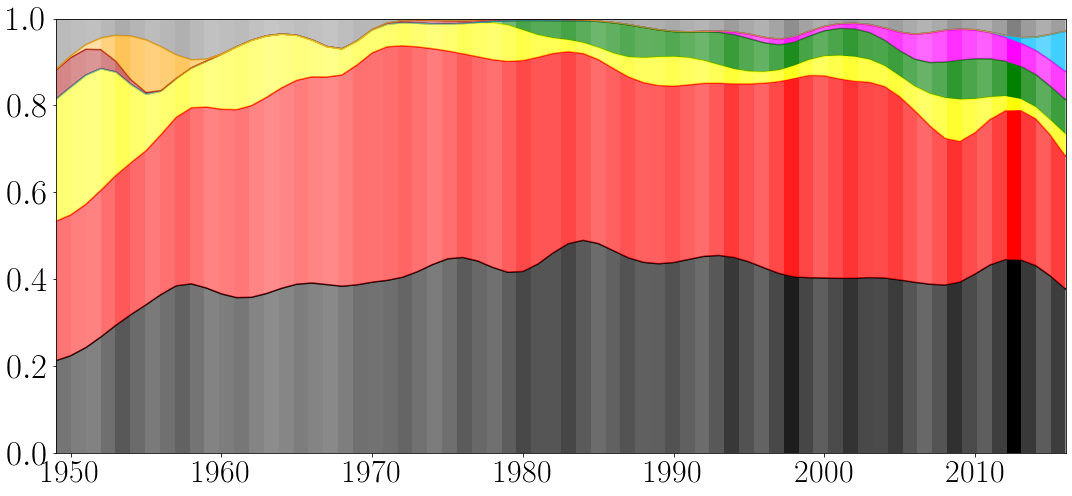

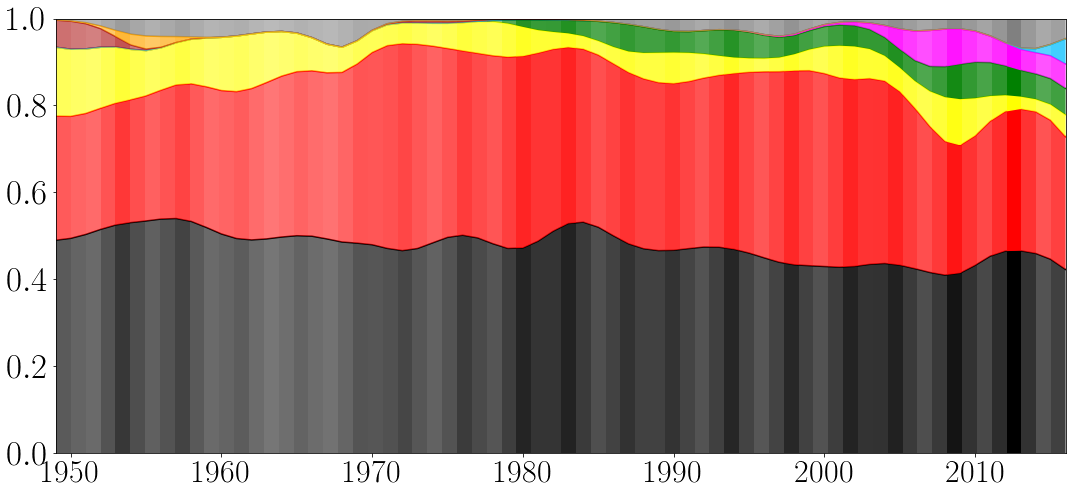

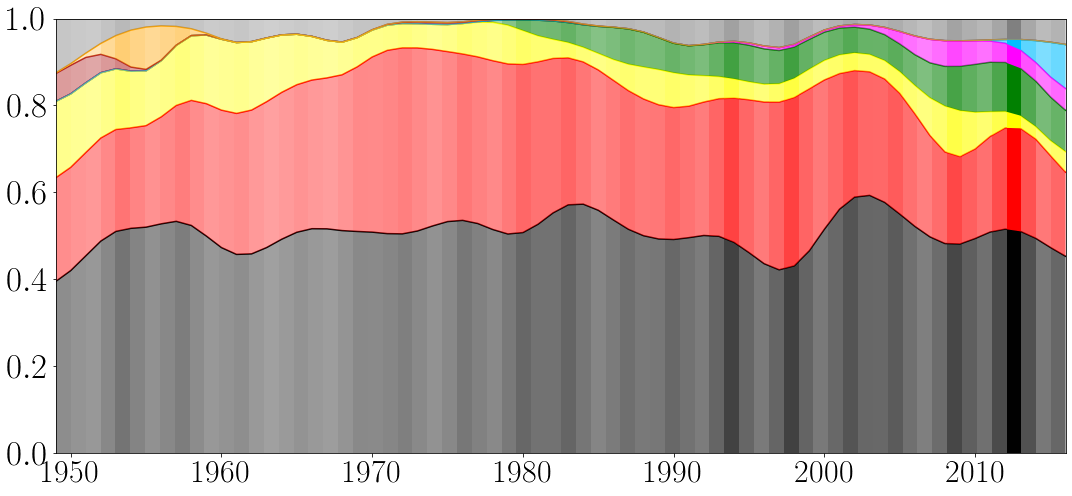

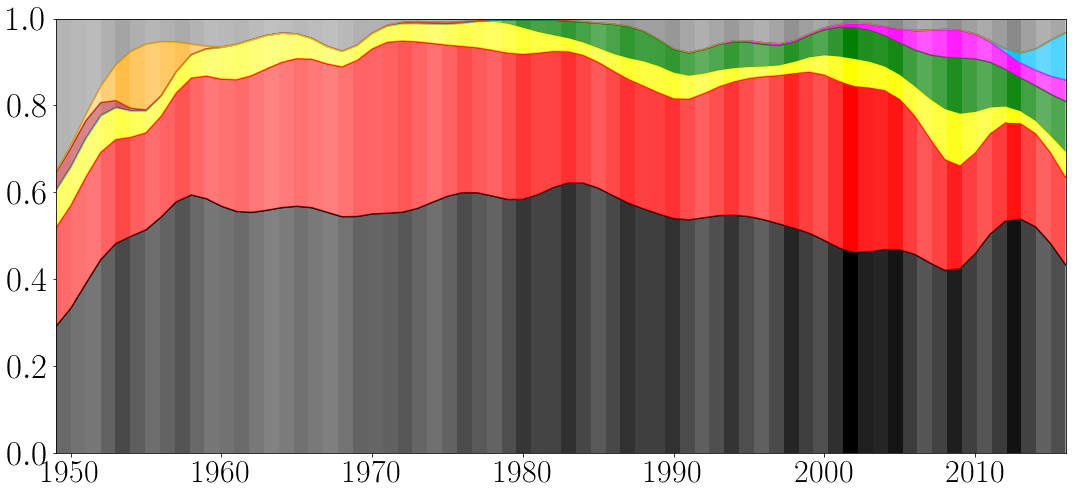

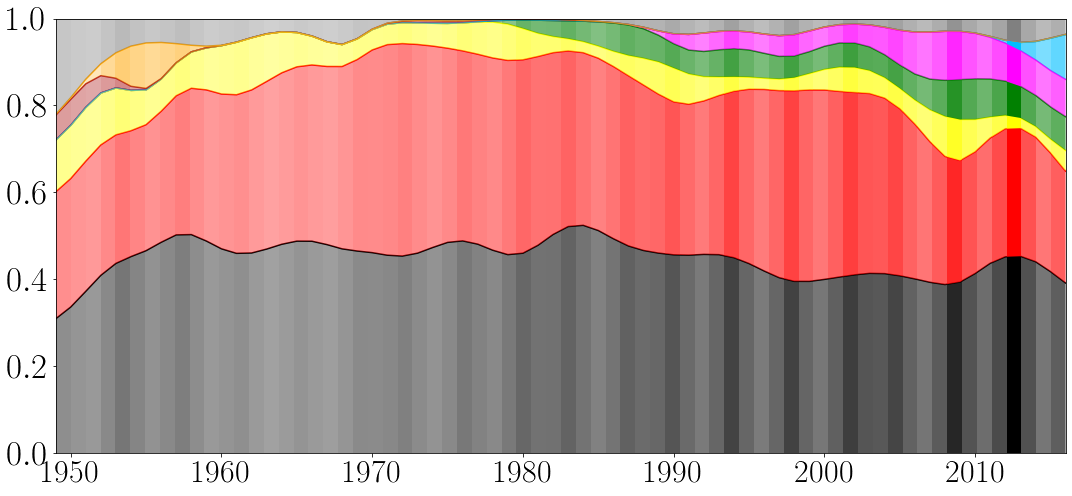

In [37]:
sm_cum_results_samples = [sm_s_cumulative_SH, sm_s_cumulative_HH, sm_s_cumulative_NS, sm_s_cumulative_HB,
                          sm_s_cumulative_NW, sm_s_cumulative_HS, sm_s_cumulative_RP, sm_s_cumulative_BW, 
                          sm_s_cumulative_BY, sm_s_cumulative_ger]

results_v_samples = [s_SH_v, s_HH_v, s_NS_v, s_HB_v, s_NW_v, 
                     s_HS_v, s_RP_v, s_BW_v, s_BY_v, s_ger_v]


if ignore_2009:
    filenames2 = ['election_SH_s_wo_2009.png', 'election_HH_s_wo_2009.png', 'election_NS_s_wo_2009.png', 
                  'election_HB_s_wo_2009.png', 'election_NW_s_wo_2009.png', 'election_HS_s_wo_2009.png',
                  'election_RP_s_wo_2009.png', 'election_BW_s_wo_2009.png', 'election_BY_s_wo_2009.png',
                  'election_ger_s_wo_2009.png']
elif predict_2029:
    filenames2 = ['election_SH_s_2029.png', 'election_HH_s_2029.png', 'election_NS_s_2029.png',
              'election_HB_s_2029.png', 'election_NW_s_2029.png', 'election_HS_s_2029.png', 
              'election_RP_s_2029.png', 'election_BW_s_2029.png', 'election_BY_s_2029.png', 'election_ger_s_2029.png']
else:
    filenames2 = ['election_SH_s.png', 'election_HH_s.png', 'election_NS_s.png', 'election_HB_s.png', 'election_NW_s.png', 
                  'election_HS_s.png', 'election_RP_s.png', 'election_BW_s.png', 'election_BY_s.png', 'election_ger_s.png']



for i in range(len(sm_cum_results_samples)):
    
    r = sm_cum_results_samples[i]
    v = np.sqrt(results_v_samples[i])
    plot_cum_results2(r, v, save=False, filename=filenames2[i], legend=False)
    

# compare this to original values

Running these cells only makes sense if we use the entirety of the training data

In [38]:
if ignore_2009 or remove_BY_from_1990:
    raise(ValueError("The rest of the Jupyter Notebook doesn't make any sense if you are not using all training data"))

original_df = medium_df.reset_index(drop=True)
regions_single = ['SH', 'HH', 'NS', 'HB', 'NW', 'HS', 'RP', 'BW', 'BY', 'ger'] 
regions = regions_single* 19
years_ = [y for y in years for i in range(10)]
print(len(years))
original_df['region'] = regions
original_df['year'] = years_
original_df

19


CDU/CSU         SPD        FDP   GRUENE    LINKE      AFD        KPD  \
0      428956.0    413257.0   103492.0        0        0        0    43744.0   
1      178786.0    358873.0   143371.0        0        0        0    76747.0   
2      593691.0   1125295.0   252141.0        0        0        0   104132.0   
3       51290.0    104509.0    39228.0        0        0        0    20530.0   
4     2481523.0   2109172.0   581456.0        0        0        0   513225.0   
5      454437.0    684042.0   597081.0        0        0        0   142539.0   
6      702125.0    408905.0   226625.0        0        0        0    89026.0   
7     1087828.0    655506.0   482381.0        0        0        0   175911.0   
8     1380448.0   1075416.0   404145.0        0        0        0   195852.0   
9     7359084.0   6934975.0  2829920.0        0        0        0  1361706.0   
10     666475.0    361264.0    51684.0        0        0        0    16410.0   
11     215376.0    416865.0   186694.0        0        0        0    41108.0   
12    1049883.0   1162311.0   308663.0        0        0        0    40315.0   
13      85669.0    141596.0    28169.0        0        0        0    13992.0   
14    4034990.0   2609048.0   683465.0        0        0        0   227366.0   
15     760423.0    889040.0   610534.0        0        0        0    64130.0   
16     925829.0    493443.0   226874.0        0        0        0    41723.0   
17    1839014.0    843299.0   502041.0        0        0        0    82673.0   
18    2450286.0   1214391.0   369442.0        0        0        0    83600.0   
19   12027945.0   8131257.0  2967566.0        0        0        0   611317.0   
20     670199.0    412561.0    67164.0        0        0        0        0.0   
21     445149.0    538847.0   105558.0        0        0        0        0.0   
22    1428300.0   1279201.0   223521.0        0        0        0        0.0   
23     124688.0    188647.0    22125.0        0        0        0        0.0   
24    4911300.0   3049317.0   528307.0        0        0        0        0.0   
25    1064466.0   1071222.0   243877.0        0        0        0        0.0   
26    1031349.0    586124.0   185300.0        0        0        0        0.0   
27    2111326.0   1053371.0   547010.0        0        0        0        0.0   
28    3068418.0   1332056.0   252341.0        0        0        0        0.0   
29   15161550.0   9651669.0  2276234.0        0        0        0        0.0   
30     609048.0    510160.0   174848.0        0        0        0        0.0   
31     392417.0    570382.0   182919.0        0        0        0        0.0   
32    1606479.0   1556255.0   476886.0        0        0        0        0.0   
33     121347.0    220130.0    63985.0        0        0        0        0.0   
34    4602409.0   3593596.0  1063302.0        0        0        0        0.0   
35    1055277.0   1271675.0   425210.0        0        0        0        0.0   
36     988462.0    675693.0   255961.0        0        0        0        0.0   
37    1955620.0   1385442.0   697279.0        0        0        0        0.0   
38    3104742.0   1690099.0   450506.0        0        0        0        0.0   
39   14727737.0  11672057.0  3866269.0        0        0        0        0.0   
40     715058.0    551767.0    97236.0        0        0        0        0.0   
41     452116.0    584560.0    92513.0        0        0        0        0.0   
42    1919789.0   1633758.0   360034.0        0        0        0        0.0   
43     153888.0    218628.0    45992.0        0        0        0        0.0   
44    4655973.0   4178408.0   596375.0        0        0        0        0.0   
45    1158372.0   1395691.0   308146.0        0        0        0        0.0   
46    1017950.0    765462.0   180286.0        0        0        0        0.0   
47    2256883.0   1505607.0   515025.0        0        0        0        0.0   
48    3204648.0   1913778.0   320121.0        0        0        0        0.0   
49   158

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


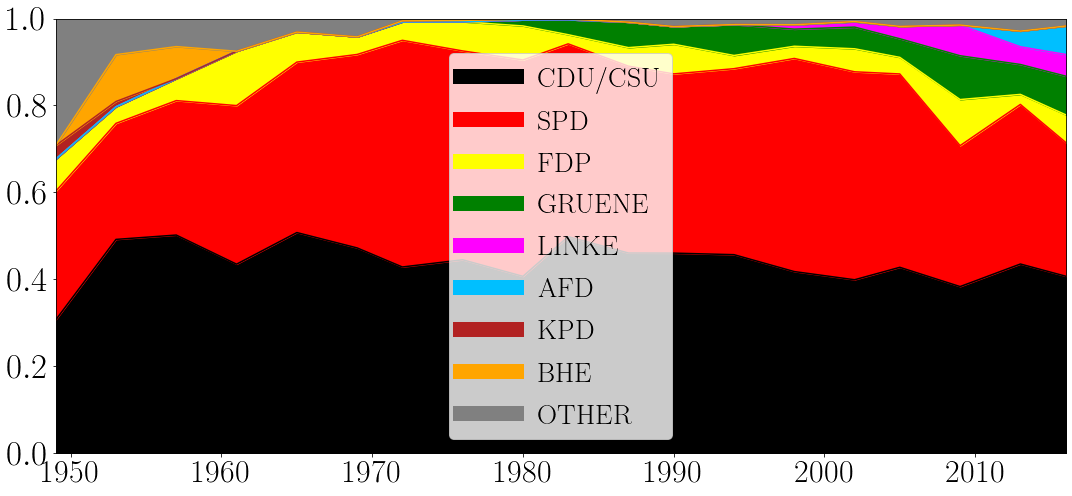

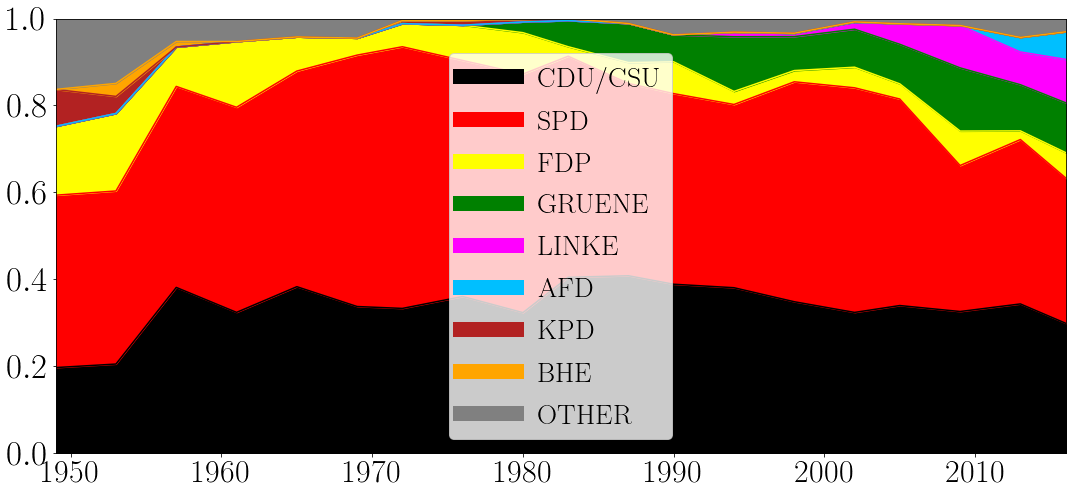

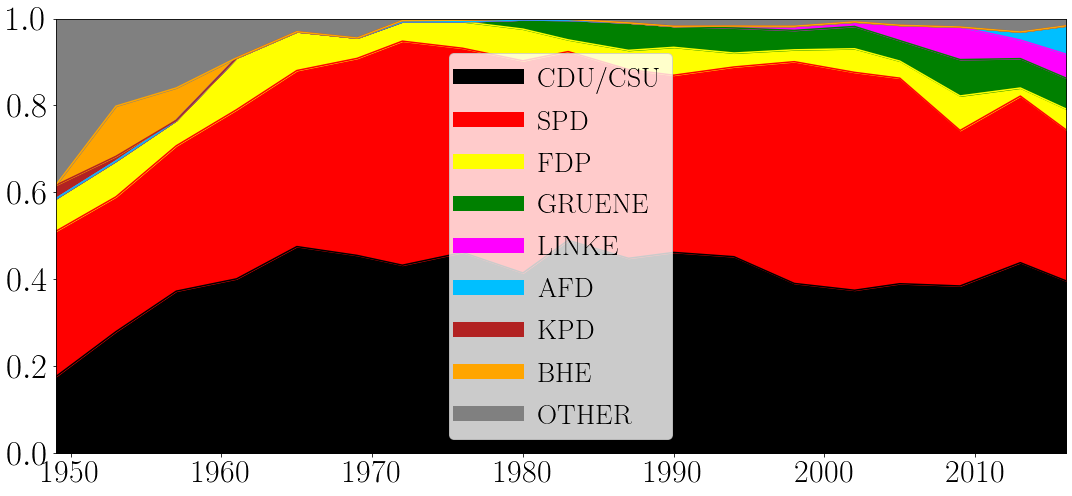

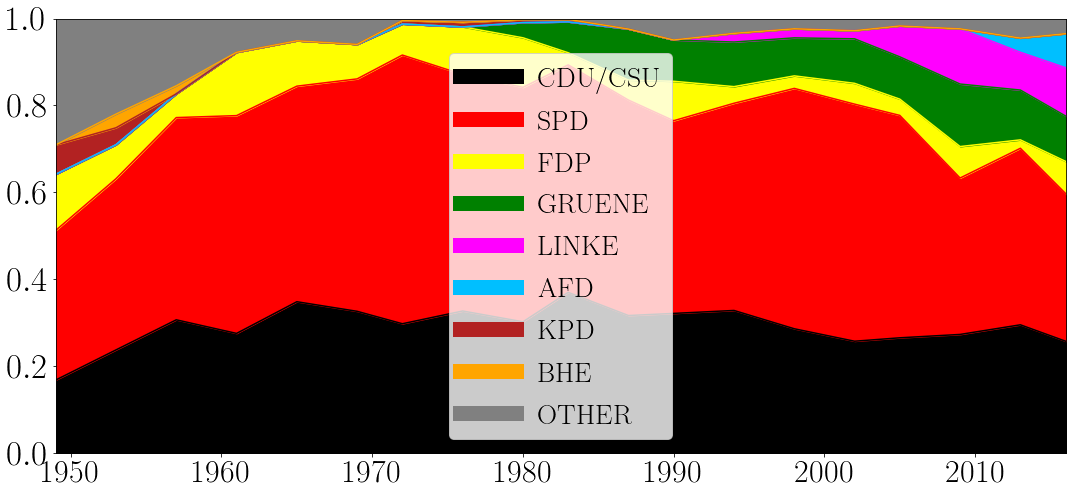

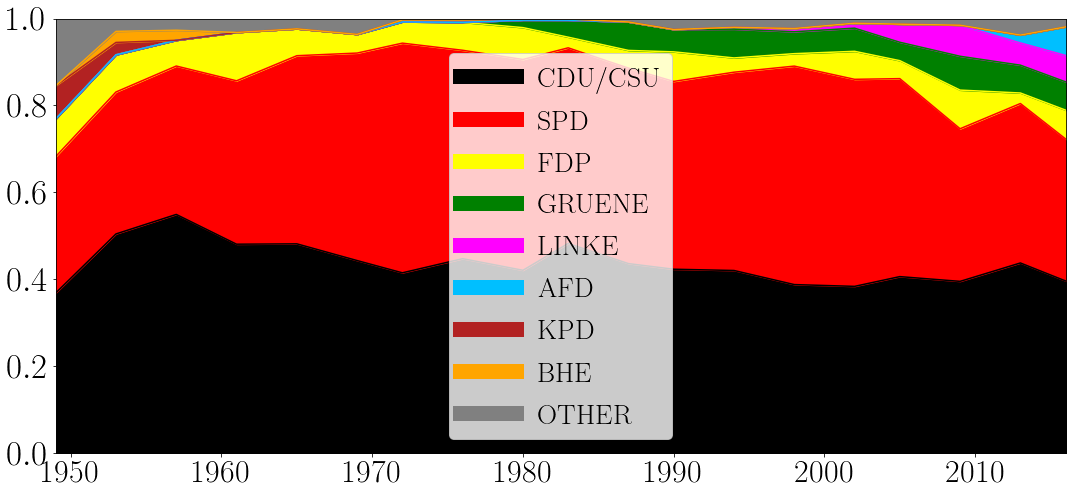

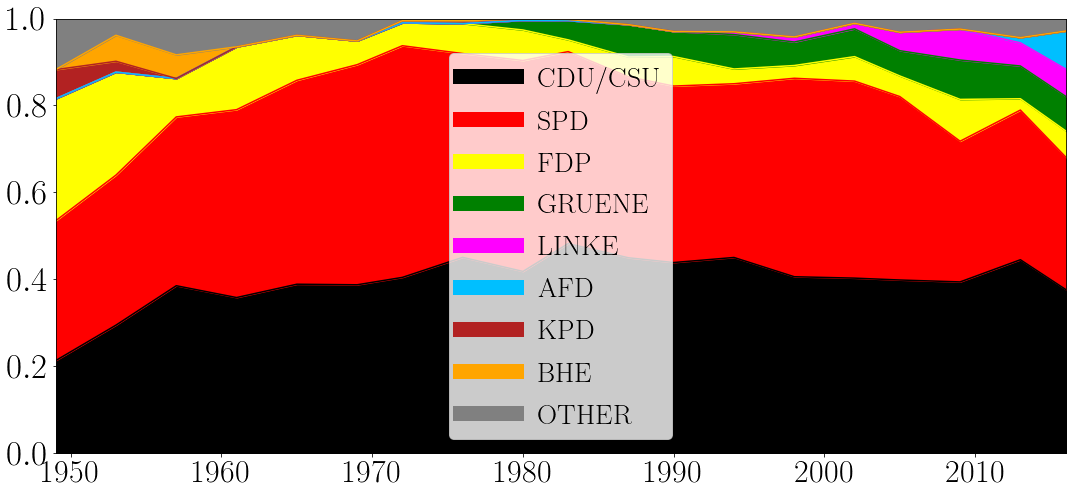

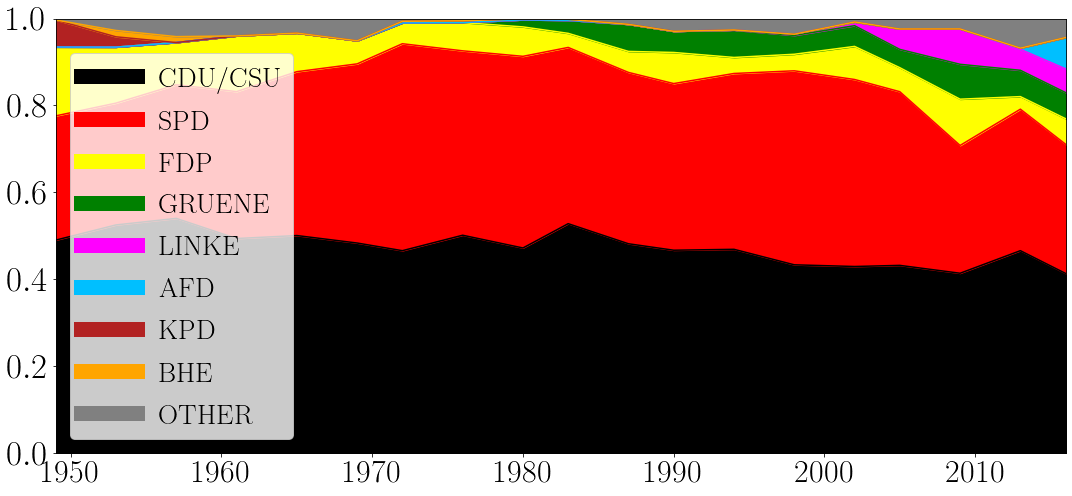

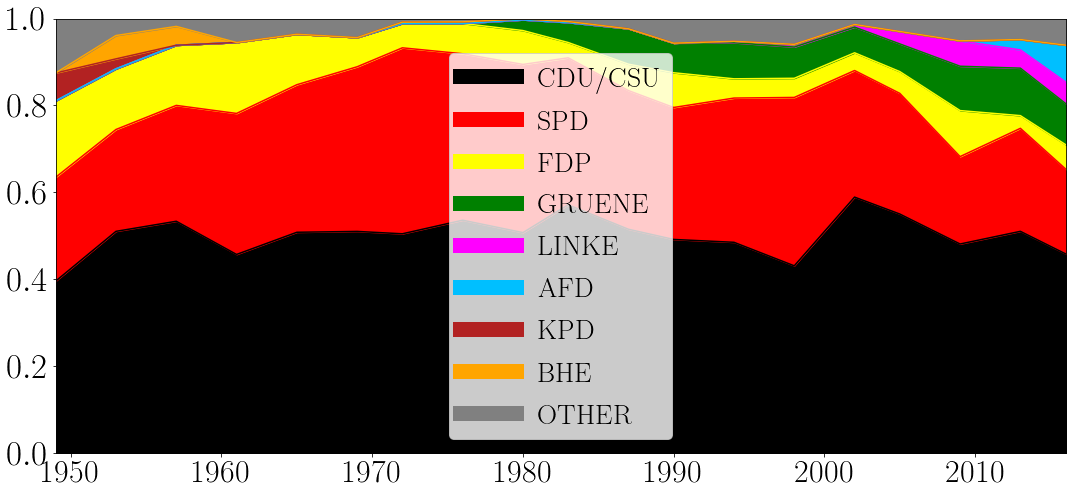

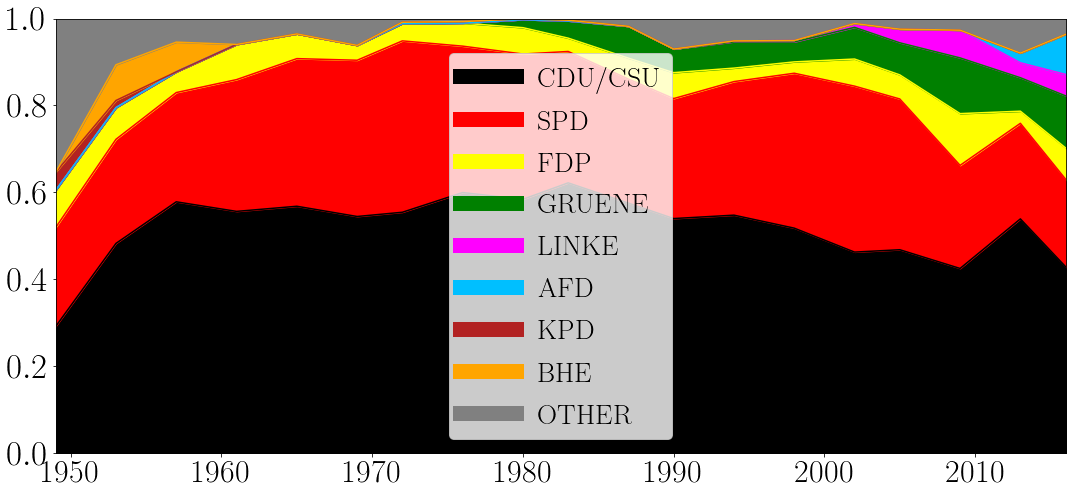

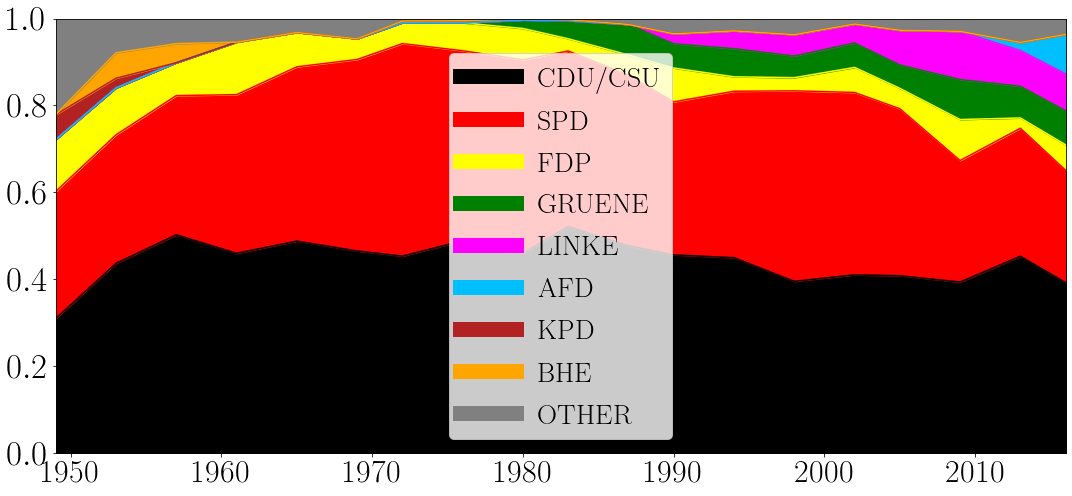

In [39]:
def prep_orig(region):
    orig = original_df.loc[original_df['region'] == region]
    orig = orig[parties].values 
    orig_norm = np.array(orig)/orig.sum(1).reshape(-1, 1)
    orig_norm_cum = np.cumsum(orig_norm, 1)
    
    return(orig_norm, orig_norm_cum)

filenames_orig = ['election_orig_SH.pdf', 'election_orig_HH.pdf',
                  'election_orig_NS.pdf', 'election_orig_HB.pdf', 'election_orig_NW.pdf',
                  'election_orig_HS.pdf', 'election_orig_RP.pdf', 'election_orig_BW.pdf', 
                  'election_orig_BY.pdf', 'election_orig_ger.pdf']

for i, reg in enumerate(regions_single):
    orig, orig_cum = prep_orig(reg)
    #plot_results(orig, x=years)
    plot_cum_results(orig_cum, results_v, x=years, save=False, filename=filenames_orig[i], legend=True)

# Compute Variance from samples to true and LM to true

We compute the distance (1-norm) of estimated and true variances dependent on the number of samples drawn from ESS. We conduct three experiments.
1. Compute the distance between the sample var and the true var dependent on samples and compare it with the static mean of the LB. We compare number of samples and wall-clock time
2. Compute the distance between the sample var and true var dep. on samples at a marginal with low uncertainty, i.e. a point in time where we have data
3. Compute the distance between the sample var and true var dep. on samples at a marginal with high uncertainty, i.e. a point in time where we have no data

In [40]:
# draw samples #1

# 'cheat' by choosing the init from the true observed probabilities
y_norm = np.array(y_values/y_values.sum(1).reshape(-1,1), dtype=float) + 10e-8 # <- to prevent the 0s
log_ = np.log(y_norm)
#log_ = np.log(y_values.astype(float) + 10e-8)
f_x = log_ - log_.sum(1).reshape(-1,1)
#f_x = log_ - log_.mean(1).reshape(-1,1)
f_x = f_x.reshape(-1)

n_samples = 1
burn_in = 0

L = np.linalg.cholesky(G_)

post_samples_1 = np.zeros((n_samples, n))

print("L: ", np.shape(L))

t0 = time.time()
# get many samples with ESS
for i in range(-burn_in, n_samples):
    #sample one sample
    f_x, ll = elliptical_slice(initial_theta=f_x, prior=L, lnpdf=log_likelihood) 
    if i % 50 == 0: 
            print("iteration: ", i)
            print("log-likelihood: ", ll)
    if i >= 0:
        post_samples_1[i] = f_x
        
t1 = time.time()
print("time to take samples: ", t1-t0)

L:  (1710, 1710)
iteration:  0
log-likelihood:  -1660738546.1713686
time to take samples:  0.010465860366821289


In [41]:
# draw samples #5

# 'cheat' by choosing the init from the true observed probabilities
y_norm = np.array(y_values/y_values.sum(1).reshape(-1,1), dtype=float) + 10e-8 # <- to prevent the 0s
log_ = np.log(y_norm)
#log_ = np.log(y_values.astype(float) + 10e-8)
f_x = log_ - log_.sum(1).reshape(-1,1)
#f_x = log_ - log_.mean(1).reshape(-1,1)
f_x = f_x.reshape(-1)

n_samples = 5
burn_in = 0

L = np.linalg.cholesky(G_)

post_samples_5 = np.zeros((n_samples, n))

print("L: ", np.shape(L))

t0 = time.time()
# get many samples with ESS
for i in range(-burn_in, n_samples):
    #sample one sample
    f_x, ll = elliptical_slice(initial_theta=f_x, prior=L, lnpdf=log_likelihood) 
    if i % 50 == 0: 
            print("iteration: ", i)
            print("log-likelihood: ", ll)
    if i >= 0:
        post_samples_5[i] = f_x
        
t1 = time.time()
print("time to take samples: ", t1-t0)

L:  (1710, 1710)
iteration:  0
log-likelihood:  -1660738546.4159024
time to take samples:  0.04056525230407715


In [42]:
# draw samples #10

# 'cheat' by choosing the init from the true observed probabilities
y_norm = np.array(y_values/y_values.sum(1).reshape(-1,1), dtype=float) + 10e-8 # <- to prevent the 0s
log_ = np.log(y_norm)
#log_ = np.log(y_values.astype(float) + 10e-8)
f_x = log_ - log_.sum(1).reshape(-1,1)
#f_x = log_ - log_.mean(1).reshape(-1,1)
f_x = f_x.reshape(-1)

n_samples = 10
burn_in = 0

L = np.linalg.cholesky(G_)

post_samples_10 = np.zeros((n_samples, n))

print("L: ", np.shape(L))

t0 = time.time()
# get many samples with ESS
for i in range(-burn_in, n_samples):
    #sample one sample
    f_x, ll = elliptical_slice(initial_theta=f_x, prior=L, lnpdf=log_likelihood) 
    if i % 50 == 0: 
            print("iteration: ", i)
            print("log-likelihood: ", ll)
    if i >= 0:
        post_samples_10[i] = f_x
        
t1 = time.time()
print("time to take samples: ", t1-t0)

L:  (1710, 1710)
iteration:  0
log-likelihood:  -1660738546.9828835
time to take samples:  0.10916566848754883


In [43]:
# draw samples #50

# 'cheat' by choosing the init from the true observed probabilities
y_norm = np.array(y_values/y_values.sum(1).reshape(-1,1), dtype=float) + 10e-8 # <- to prevent the 0s
log_ = np.log(y_norm)
#log_ = np.log(y_values.astype(float) + 10e-8)
f_x = log_ - log_.sum(1).reshape(-1,1)
#f_x = log_ - log_.mean(1).reshape(-1,1)
f_x = f_x.reshape(-1)

n_samples = 50
burn_in = 0

L = np.linalg.cholesky(G_)

post_samples_50 = np.zeros((n_samples, n))

print("L: ", np.shape(L))

t0 = time.time()
# get many samples with ESS
for i in range(-burn_in, n_samples):
    #sample one sample
    f_x, ll = elliptical_slice(initial_theta=f_x, prior=L, lnpdf=log_likelihood) 
    if i % 50 == 0: 
            print("iteration: ", i)
            print("log-likelihood: ", ll)
    if i >= 0:
        post_samples_50[i] = f_x
        
t1 = time.time()
print("time to take samples: ", t1-t0)

L:  (1710, 1710)
iteration:  0
log-likelihood:  -1660738546.1708305
time to take samples:  0.3783142566680908


In [44]:
# draw samples #100

# 'cheat' by choosing the init from the true observed probabilities
y_norm = np.array(y_values/y_values.sum(1).reshape(-1,1), dtype=float) + 10e-8 # <- to prevent the 0s
log_ = np.log(y_norm)
#log_ = np.log(y_values.astype(float) + 10e-8)
f_x = log_ - log_.sum(1).reshape(-1,1)
#f_x = log_ - log_.mean(1).reshape(-1,1)
f_x = f_x.reshape(-1)

n_samples = 100
burn_in = 0

L = np.linalg.cholesky(G_)

post_samples_100 = np.zeros((n_samples, n))

print("L: ", np.shape(L))

t0 = time.time()
# get many samples with ESS
for i in range(-burn_in, n_samples):
    #sample one sample
    f_x, ll = elliptical_slice(initial_theta=f_x, prior=L, lnpdf=log_likelihood) 
    if i % 50 == 0: 
            print("iteration: ", i)
            print("log-likelihood: ", ll)
    if i >= 0:
        post_samples_100[i] = f_x
        
t1 = time.time()
print("time to take samples: ", t1-t0)

L:  (1710, 1710)
iteration:  0
log-likelihood:  -1660738546.746919
iteration:  50
log-likelihood:  -1660738558.0221229
time to take samples:  0.7113330364227295


In [45]:
# draw samples #500

# 'cheat' by choosing the init from the true observed probabilities
y_norm = np.array(y_values/y_values.sum(1).reshape(-1,1), dtype=float) + 10e-8 # <- to prevent the 0s
log_ = np.log(y_norm)
#log_ = np.log(y_values.astype(float) + 10e-8)
f_x = log_ - log_.sum(1).reshape(-1,1)
#f_x = log_ - log_.mean(1).reshape(-1,1)
f_x = f_x.reshape(-1)

n_samples = 500
burn_in = 0

L = np.linalg.cholesky(G_)

post_samples_500 = np.zeros((n_samples, n))

print("L: ", np.shape(L))

t0 = time.time()
# get many samples with ESS
for i in range(-burn_in, n_samples):
    #sample one sample
    f_x, ll = elliptical_slice(initial_theta=f_x, prior=L, lnpdf=log_likelihood) 
    if i % 50 == 0: 
            print("iteration: ", i)
            print("log-likelihood: ", ll)
    if i >= 0:
        post_samples_500[i] = f_x
        
t1 = time.time()
print("time to take samples: ", t1-t0)

L:  (1710, 1710)
iteration:  0
log-likelihood:  -1660738547.3087542
iteration:  50
log-likelihood:  -1660738562.9796803
iteration:  100
log-likelihood:  -1660738572.4236434
iteration:  150
log-likelihood:  -1660738584.7044313
iteration:  200
log-likelihood:  -1660738592.6750834
iteration:  250
log-likelihood:  -1660738596.8344061
iteration:  300
log-likelihood:  -1660738611.307468
iteration:  350
log-likelihood:  -1660738615.141339
iteration:  400
log-likelihood:  -1660738615.3545227
iteration:  450
log-likelihood:  -1660738613.5251663
time to take samples:  4.222231149673462


In [46]:
# draw samples #1000

# 'cheat' by choosing the init from the true observed probabilities
y_norm = np.array(y_values/y_values.sum(1).reshape(-1,1), dtype=float) + 10e-8 # <- to prevent the 0s
log_ = np.log(y_norm)
#log_ = np.log(y_values.astype(float) + 10e-8)
f_x = log_ - log_.sum(1).reshape(-1,1)
#f_x = log_ - log_.mean(1).reshape(-1,1)
f_x = f_x.reshape(-1)

n_samples = 1000
burn_in = 0

L = np.linalg.cholesky(G_)

post_samples_1000 = np.zeros((n_samples, n))

print("L: ", np.shape(L))

t0 = time.time()
# get many samples with ESS
for i in range(-burn_in, n_samples):
    #sample one sample
    f_x, ll = elliptical_slice(initial_theta=f_x, prior=L, lnpdf=log_likelihood) 
    if i % 50 == 0: 
            print("iteration: ", i)
            print("log-likelihood: ", ll)
    if i >= 0:
        post_samples_1000[i] = f_x
        
t1 = time.time()
print("time to take samples: ", t1-t0)

L:  (1710, 1710)
iteration:  0
log-likelihood:  -1660738546.2089584
iteration:  50
log-likelihood:  -1660738551.9549546
iteration:  100
log-likelihood:  -1660738562.7808685
iteration:  150
log-likelihood:  -1660738568.6519911
iteration:  200
log-likelihood:  -1660738575.8138697
iteration:  250
log-likelihood:  -1660738585.9867604
iteration:  300
log-likelihood:  -1660738595.1850092
iteration:  350
log-likelihood:  -1660738598.8529892
iteration:  400
log-likelihood:  -1660738600.5597
iteration:  450
log-likelihood:  -1660738605.728797
iteration:  500
log-likelihood:  -1660738609.106318
iteration:  550
log-likelihood:  -1660738614.1199327
iteration:  600
log-likelihood:  -1660738614.6106973
iteration:  650
log-likelihood:  -1660738622.5316336
iteration:  700
log-likelihood:  -1660738624.3965275
iteration:  750
log-likelihood:  -1660738621.5970535
iteration:  800
log-likelihood:  -1660738625.8940306
iteration:  850
log-likelihood:  -1660738627.6093626
iteration:  900
log-likelihood:  -166

In [47]:
# draw samples #10000

# 'cheat' by choosing the init from the true observed probabilities
y_norm = np.array(y_values/y_values.sum(1).reshape(-1,1), dtype=float) + 10e-8 # <- to prevent the 0s
log_ = np.log(y_norm)
#log_ = np.log(y_values.astype(float) + 10e-8)
f_x = log_ - log_.sum(1).reshape(-1,1)
#f_x = log_ - log_.mean(1).reshape(-1,1)
f_x = f_x.reshape(-1)

n_samples = 10000
burn_in = 1000

L = np.linalg.cholesky(G_)

post_samples_10k = np.zeros((n_samples, n))

print("L: ", np.shape(L))

t0 = time.time()
# get many samples with ESS
for i in range(-burn_in, n_samples):
    #sample one sample
    f_x, ll = elliptical_slice(initial_theta=f_x, prior=L, lnpdf=log_likelihood) 
    if i % 50 == 0: 
            print("iteration: ", i)
            print("log-likelihood: ", ll)
    if i >= 0:
        post_samples_10k[i] = f_x
        
t1 = time.time()
print("time to take samples: ", t1-t0)

L:  (1710, 1710)
iteration:  -1000
log-likelihood:  -1660738546.4022634
iteration:  -950
log-likelihood:  -1660738558.590428
iteration:  -900
log-likelihood:  -1660738569.797603
iteration:  -850
log-likelihood:  -1660738578.6353667
iteration:  -800
log-likelihood:  -1660738581.8675716
iteration:  -750
log-likelihood:  -1660738590.1479084
iteration:  -700
log-likelihood:  -1660738590.2148669
iteration:  -650
log-likelihood:  -1660738596.1290529
iteration:  -600
log-likelihood:  -1660738602.3210456
iteration:  -550
log-likelihood:  -1660738606.595062
iteration:  -500
log-likelihood:  -1660738605.16826
iteration:  -450
log-likelihood:  -1660738607.0207298
iteration:  -400
log-likelihood:  -1660738610.962708
iteration:  -350
log-likelihood:  -1660738612.452364
iteration:  -300
log-likelihood:  -1660738622.2550216
iteration:  -250
log-likelihood:  -1660738610.796189
iteration:  -200
log-likelihood:  -1660738615.6798387
iteration:  -150
log-likelihood:  -1660738614.7554994
iteration:  -100
l

iteration:  6650
log-likelihood:  -1660738748.583579
iteration:  6700
log-likelihood:  -1660738756.6446075
iteration:  6750
log-likelihood:  -1660738758.3262067
iteration:  6800
log-likelihood:  -1660738761.4695654
iteration:  6850
log-likelihood:  -1660738758.747253
iteration:  6900
log-likelihood:  -1660738756.865284
iteration:  6950
log-likelihood:  -1660738755.5405245
iteration:  7000
log-likelihood:  -1660738755.3185556
iteration:  7050
log-likelihood:  -1660738755.3278992
iteration:  7100
log-likelihood:  -1660738756.2835326
iteration:  7150
log-likelihood:  -1660738757.9157045
iteration:  7200
log-likelihood:  -1660738754.9211316
iteration:  7250
log-likelihood:  -1660738756.2976866
iteration:  7300
log-likelihood:  -1660738757.671833
iteration:  7350
log-likelihood:  -1660738751.8881543
iteration:  7400
log-likelihood:  -1660738754.1564527
iteration:  7450
log-likelihood:  -1660738753.0303612
iteration:  7500
log-likelihood:  -1660738753.965889
iteration:  7550
log-likelihood: 

In [48]:
# 1 samples
sample_mean_1 = post_samples_1.mean(axis=0)
sample_std_1 = post_samples_1.std(axis=0)

sample_post_1 = A @ sample_mean_1
sample_post_s_1 = sample_std_1

sample_post_1 = sample_post_1.reshape((-1, n_regions*n_parties))
sample_std_1 = sample_post_s_1.reshape((-1, n_regions*n_parties))

s_mean_ger_1 = sample_post_1[:, 9*n_parties:10*n_parties]
s_ger_v_1 = sample_std_1[:, 9*n_parties:10*n_parties]

sm_s_results_ger_1 = softmax_batch(s_mean_ger_1)

# 5 samples
sample_mean_5 = post_samples_5.mean(axis=0)
sample_std_5 = post_samples_5.std(axis=0)

sample_post_5 = A @ sample_mean_5
sample_post_s_5 = sample_std_5

sample_post_5 = sample_post_5.reshape((-1, n_regions*n_parties))
sample_std_5 = sample_post_s_5.reshape((-1, n_regions*n_parties))

s_mean_ger_5 = sample_post_5[:, 9*n_parties:10*n_parties]
s_ger_v_5 = sample_std_5[:, 9*n_parties:10*n_parties]

sm_s_results_ger_5 = softmax_batch(s_mean_ger_5)

# 10 samples
sample_mean_10 = post_samples_10.mean(axis=0)
sample_std_10 = post_samples_10.std(axis=0)

sample_post_10 = A @ sample_mean_10
sample_post_s_10 = sample_std_10

sample_post_10 = sample_post_10.reshape((-1, n_regions*n_parties))
sample_std_10 = sample_post_s_10.reshape((-1, n_regions*n_parties))

s_mean_ger_10 = sample_post_10[:, 9*n_parties:10*n_parties]
s_ger_v_10 = sample_std_10[:, 9*n_parties:10*n_parties]

sm_s_results_ger_10 = softmax_batch(s_mean_ger_10)

# 50 samples
sample_mean_50 = post_samples_50.mean(axis=0)
sample_std_50 = post_samples_50.std(axis=0)

sample_post_50 = A @ sample_mean_50
sample_post_s_50 = sample_std_50

sample_post_50 = sample_post_50.reshape((-1, n_regions*n_parties))
sample_std_50 = sample_post_s_50.reshape((-1, n_regions*n_parties))

s_mean_ger_50 = sample_post_50[:, 9*n_parties:10*n_parties]
s_ger_v_50 = sample_std_50[:, 9*n_parties:10*n_parties]

sm_s_results_ger_50 = softmax_batch(s_mean_ger_50)

# 100 samples
sample_mean_100 = post_samples_100.mean(axis=0)
sample_std_100 = post_samples_100.std(axis=0)

sample_post_100 = A @ sample_mean_100
sample_post_s_100 = sample_std_100

sample_post_100 = sample_post_100.reshape((-1, n_regions*n_parties))
sample_std_100 = sample_post_s_100.reshape((-1, n_regions*n_parties))

s_mean_ger_100 = sample_post_100[:, 9*n_parties:10*n_parties]
s_ger_v_100 = sample_std_100[:, 9*n_parties:10*n_parties]

sm_s_results_ger_100 = softmax_batch(s_mean_ger_100)

# 500 samples
sample_mean_500 = post_samples_500.mean(axis=0)
sample_std_500 = post_samples_500.std(axis=0)

sample_post_500 = A @ sample_mean_500
sample_post_s_500 = sample_std_500

sample_post_500 = sample_post_500.reshape((-1, n_regions*n_parties))
sample_std_500 = sample_post_s_500.reshape((-1, n_regions*n_parties))

s_mean_ger_500 = sample_post_500[:, 9*n_parties:10*n_parties]
s_ger_v_500 = sample_std_500[:, 9*n_parties:10*n_parties]

sm_s_results_ger_500 = softmax_batch(s_mean_ger_500)

# 1000 samples
sample_mean_1000 = post_samples_1000.mean(axis=0)
sample_std_1000 = post_samples_1000.std(axis=0)

sample_post_1000 = A @ sample_mean_1000
sample_post_s_1000 = sample_std_1000

sample_post_1000 = sample_post_1000.reshape((-1, n_regions*n_parties))
sample_std_1000 = sample_post_s_1000.reshape((-1, n_regions*n_parties))

s_mean_ger_1000 = sample_post_1000[:, 9*n_parties:10*n_parties]
s_ger_v_1000 = sample_std_1000[:, 9*n_parties:10*n_parties]

sm_s_results_ger_1000 = softmax_batch(s_mean_ger_1000)

# 10k samples
sample_mean_10k = post_samples_10k.mean(axis=0)
sample_std_10k = post_samples_10k.std(axis=0)

sample_post_10k = A @ sample_mean_10k
sample_post_s_10k = sample_std_10k

sample_post_10k = sample_post_10k.reshape((-1, n_regions*n_parties))
sample_std_10k = sample_post_s_10k.reshape((-1, n_regions*n_parties))

s_mean_ger_10k = sample_post_10k[:, 9*n_parties:10*n_parties]
s_ger_v_10k = sample_std_10k[:, 9*n_parties:10*n_parties]

sm_s_results_ger_10k = softmax_batch(s_mean_ger_10k)

In [106]:
print(sample_std_1.sum())
print(np.sum(np.abs(sample_std_1 - sample_std_10k)))

print(sample_std_5.sum())
print(np.sum(np.abs(sample_std_5 - sample_std_10k)))

print(sample_std_10.sum())
print(np.sum(np.abs(sample_std_10 - sample_std_10k)))

print(sample_std_50.sum())
print(np.sum(np.abs(sample_std_50 - sample_std_10k)))

print(sample_std_100.sum())
print(np.sum(np.abs(sample_std_100 - sample_std_10k)))

print(sample_std_500.sum())
print(np.sum(np.abs(sample_std_500 - sample_std_10k)))

print(sample_std_1000.sum())
print(np.sum(np.abs(sample_std_1000 - sample_std_10k)))

0.0
3.0925649581415167
0.04394269669317791
3.0486222614483385
0.06406812422066266
3.028496833920854
0.1945882149238129
2.897976743217704
0.295328003165916
2.7972369549756007
0.7939274380905914
2.3007343098007875
1.1414086159189425
1.9686683810716352


(1710,)
(1710,)


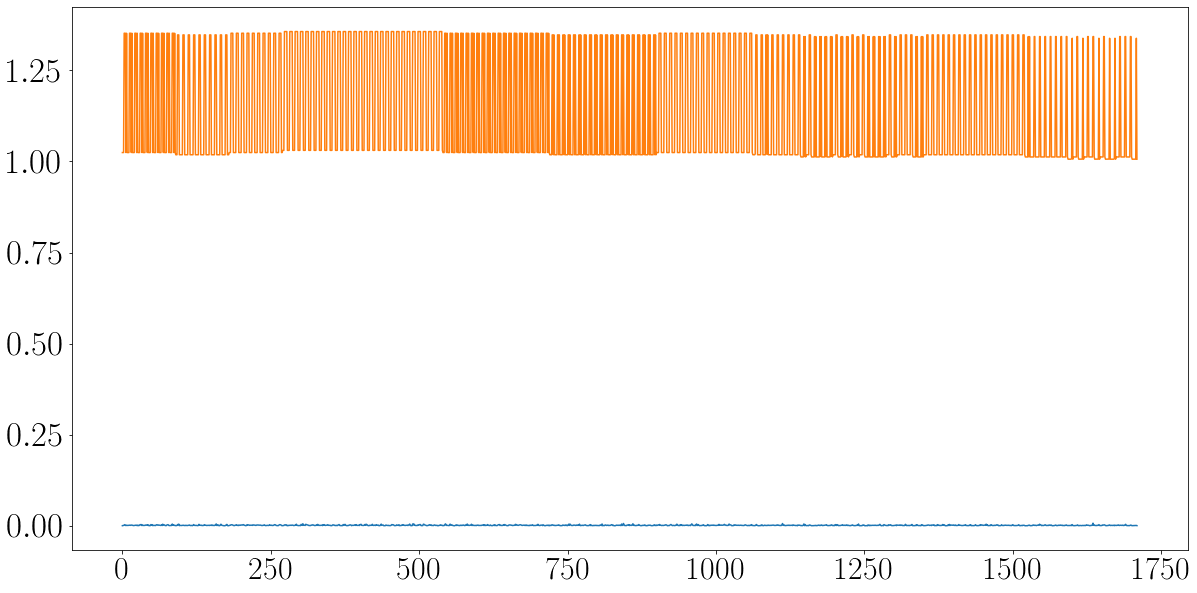

In [101]:
print(np.shape(sample_std_10k.reshape(-1)))
print(np.shape(np.diag(G_)))

plt.figure(figsize=(20,10))
plt.plot(sample_std_10k.reshape(-1))
plt.plot(np.sqrt(np.diag(G_)))
plt.show();

In [49]:
sample_10k_pred = np.array([A @ X for X in post_samples_10k])
sample_10k_pred_std = sample_10k_pred.std(axis=0)
print(np.shape(sample_10k_pred_std))

(6120,)


In [50]:
# compare this to the mean prediction from LM

print(sm_results_ger[0])
print(sm_s_results_ger_10k[0])

# compute difference:
LM_mean_diff = np.sum(np.abs(sm_results_ger - sm_s_results_ger_10k))
print("LM mean diff: ", LM_mean_diff)

# compute difference in real space:
LM_mean_diff_r = np.sum(np.abs(Y_mu - post_samples_10k))
print("LM mean diff real: ", LM_mean_diff_r)

# compute the difference for different initializations
log_ = np.log(y_norm)
log_2 = np.log(y_values.astype(float) + 10e-8)
f_x = log_ - log_.sum(1).reshape(-1,1)
f_x2 = log_ - log_.mean(1).reshape(-1,1)
f_x3 = np.ones_like(y_norm)

init0 = f_x.reshape(-1)
init0_pred = (A @ init0).reshape((-1, n_regions*n_parties))
init0_pred_ger = init0_pred[:, 9*n_parties:10*n_parties]
init0_pred_ger_sm = softmax_batch(init0_pred_ger)
init1 = f_x2.reshape(-1)
init1_pred = (A @ init1).reshape((-1, n_regions*n_parties))
init1_pred_ger = init1_pred[:, 9*n_parties:10*n_parties]
init1_pred_ger_sm = softmax_batch(init1_pred_ger)
init2 = f_x3.reshape(-1)
init2_pred = (A @ init2).reshape((-1, n_regions*n_parties))
init2_pred_ger = init2_pred[:, 9*n_parties:10*n_parties]
init2_pred_ger_sm = softmax_batch(init2_pred_ger)

init0_mean_diff = np.sum(np.abs(init0_pred_ger_sm - sm_s_results_ger_10k))
print("init0 mean diff: ", init0_mean_diff)
init1_mean_diff = np.sum(np.abs(init1_pred_ger_sm - sm_s_results_ger_10k))
print("init1 mean diff: ", init1_mean_diff)
init2_mean_diff = np.sum(np.abs(init2_pred_ger_sm - sm_s_results_ger_10k))
print("init2 mean diff: ", init2_mean_diff)

init0_mean_diff_r = np.sum(np.abs(init0 - post_samples_10k))
print("init0 mean diff real: ", init0_mean_diff_r)
init1_mean_diff_r = np.sum(np.abs(init1 - post_samples_10k))
print("init1 mean diff real: ", init1_mean_diff_r)
init2_mean_diff_r = np.sum(np.abs(init2 - post_samples_10k))
print("init2 mean diff real: ", init2_mean_diff_r)

[3.09592337e-01 2.91750254e-01 1.19053041e-01 1.30345768e-06
 8.45756349e-07 2.63972050e-07 5.72860113e-02 1.59023276e-03
 2.20725711e-01]
[3.09525947e-01 2.91717248e-01 1.19043710e-01 2.03445440e-06
 1.49763369e-06 5.49709657e-07 5.72692191e-02 1.73045953e-03
 2.20709334e-01]
LM mean diff:  0.04956960368746477
LM mean diff real:  1059815096.3105202
init0 mean diff:  0.005690256628382113
init1 mean diff:  0.0056902566277864455
init2 mean diff:  82.3488125828006
init0 mean diff real:  47587.224328191325
init1 mean diff real:  1059815096.31052
init2 mean diff real:  1042715096.3105205


In [51]:
# compute the distances for 1, 5, 10, 50, 100, 500, 1000 and 5k samples to 10k samples

s_mean_diff_1 = np.sum(np.abs(sm_s_results_ger_1 - sm_s_results_ger_10k))
print("mean diff 1: \t", s_mean_diff_1)

s_mean_diff_5 = np.sum(np.abs(sm_s_results_ger_5 - sm_s_results_ger_10k))
print("mean diff 5: \t", s_mean_diff_5)

s_mean_diff_10 = np.sum(np.abs(sm_s_results_ger_10 - sm_s_results_ger_10k))
print("mean diff 10: \t", s_mean_diff_10)

s_mean_diff_50 = np.sum(np.abs(sm_s_results_ger_50 - sm_s_results_ger_10k))
print("mean diff 50: \t", s_mean_diff_50)

s_mean_diff_100 = np.sum(np.abs(sm_s_results_ger_100 - sm_s_results_ger_10k))
print("mean diff 100: \t", s_mean_diff_100)

s_mean_diff_500 = np.sum(np.abs(sm_s_results_ger_500 - sm_s_results_ger_10k))
print("mean diff 500: \t", s_mean_diff_500)

s_mean_diff_1000 = np.sum(np.abs(sm_s_results_ger_1000 - sm_s_results_ger_10k))
print("mean diff 1000: \t", s_mean_diff_1000)

mean diff 1: 	 0.005687637361848827
mean diff 5: 	 0.0055981508014344376
mean diff 10: 	 0.006019123622351864
mean diff 50: 	 0.006799098612791998
mean diff 100: 	 0.006089816537234344
mean diff 500: 	 0.007096615125494602
mean diff 1000: 	 0.007678523385496964


In [52]:
# compute the distances for all samples in real space

s_mean_diff_r_1 = np.sum(np.abs(sm_s_results_ger_1 - sm_s_results_ger_10k))
print("mean diff 1 real: \t", s_mean_diff_r_1)

s_mean_diff_r_5 = np.sum(np.abs(sm_s_results_ger_5 - sm_s_results_ger_10k))
print("mean diff 5 real: \t", s_mean_diff_r_5)

s_mean_diff_r_10 = np.sum(np.abs(sm_s_results_ger_10 - sm_s_results_ger_10k))
print("mean diff 10 real: \t", s_mean_diff_r_10)

s_mean_diff_r_50 = np.sum(np.abs(sm_s_results_ger_50 - sm_s_results_ger_10k))
print("mean diff 50 real: \t", s_mean_diff_r_50)

s_mean_diff_r_100 = np.sum(np.abs(sm_s_results_ger_100 - sm_s_results_ger_10k))
print("mean diff 100 real: \t", s_mean_diff_r_100)

s_mean_diff_r_500 = np.sum(np.abs(sm_s_results_ger_500 - sm_s_results_ger_10k))
print("mean diff 500 real: \t", s_mean_diff_r_500)

s_mean_diff_r_1000 = np.sum(np.abs(sm_s_results_ger_1000 - sm_s_results_ger_10k))
print("mean diff 1000 real: \t", s_mean_diff_r_1000)

mean diff 1 real: 	 0.005687637361848827
mean diff 5 real: 	 0.0055981508014344376
mean diff 10 real: 	 0.006019123622351864
mean diff 50 real: 	 0.006799098612791998
mean diff 100 real: 	 0.006089816537234344
mean diff 500 real: 	 0.007096615125494602
mean diff 1000 real: 	 0.007678523385496964


(6120,)
(6120,)


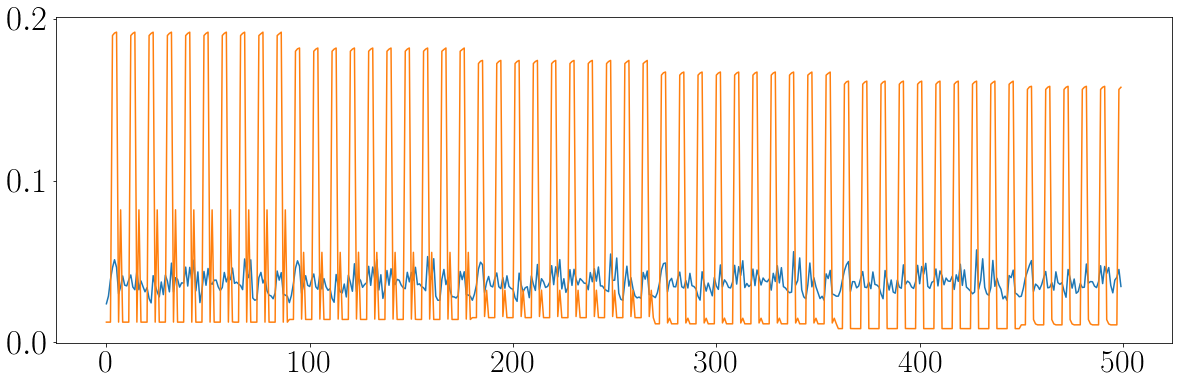

In [53]:
# plot the difference

# TODO: since we initialize the ESS with the posterior mean, the samples are obviously pretty perfect. 
print(np.shape(sample_10k_pred_std))
print(np.shape(test_1_v.reshape(-1)))

n_ = np.arange(len(sample_10k_pred_std.reshape(-1)))
plt.figure(figsize=(20, 6))
plt.plot(n_[:500], np.sqrt(sample_10k_pred_std.reshape(-1)[:500]))
plt.plot(n_[:500], test_1_v.reshape(-1)[:500])
plt.show();

### a fresh start

I just got a bit lost with the variables above

In [170]:
# draw samples #1, 5, 10, 50, 100, 500, 1000, 5000, 10000

# 'cheat' by choosing the init from the true observed probabilities
y_norm = np.array(y_values/y_values.sum(1).reshape(-1,1), dtype=float) + 10e-8 # <- to prevent the 0s
log_ = np.log(y_norm)
#log_ = np.log(y_values.astype(float) + 10e-8)
#f_x = log_ #- log_.sum(1).reshape(-1,1)
f_x = log_ - log_.mean(1).reshape(-1,1)
f_x = f_x.reshape(-1)

n_samples = 10000
burn_in = 25000

L = np.linalg.cholesky(G_)

post_samples_10k = np.zeros((n_samples, n))

print("L: ", np.shape(L))

t0 = time.time()
# get many samples with ESS
for i in range(-burn_in, n_samples):
    #sample one sample
    f_x, ll = elliptical_slice(initial_theta=f_x, prior=L, lnpdf=log_likelihood) 
    if i % 50 == 0: 
            print("iteration: ", i)
            print("log-likelihood: ", ll)
    if i >= 0:
        post_samples_10k[i] = f_x
        
t1 = time.time()
print("time to take samples: ", t1-t0)

L:  (1710, 1710)
iteration:  -25000
log-likelihood:  -1660877027.4522831
iteration:  -24950
log-likelihood:  -1660877041.4532285
iteration:  -24900
log-likelihood:  -1660877050.6181269
iteration:  -24850
log-likelihood:  -1660877055.8352635
iteration:  -24800
log-likelihood:  -1660877067.0775788
iteration:  -24750
log-likelihood:  -1660877071.8891218
iteration:  -24700
log-likelihood:  -1660877075.8207955
iteration:  -24650
log-likelihood:  -1660877074.9507601
iteration:  -24600
log-likelihood:  -1660877080.281087
iteration:  -24550
log-likelihood:  -1660877081.6089952
iteration:  -24500
log-likelihood:  -1660877084.5768895
iteration:  -24450
log-likelihood:  -1660877093.2368276
iteration:  -24400
log-likelihood:  -1660877088.5366116
iteration:  -24350
log-likelihood:  -1660877092.6868806
iteration:  -24300
log-likelihood:  -1660877091.546584
iteration:  -24250
log-likelihood:  -1660877098.5272734
iteration:  -24200
log-likelihood:  -1660877098.7890337
iteration:  -24150
log-likelihood

iteration:  -17650
log-likelihood:  -1660877206.6221144
iteration:  -17600
log-likelihood:  -1660877200.521405
iteration:  -17550
log-likelihood:  -1660877205.6423979
iteration:  -17500
log-likelihood:  -1660877199.4767387
iteration:  -17450
log-likelihood:  -1660877207.1716847
iteration:  -17400
log-likelihood:  -1660877205.1047947
iteration:  -17350
log-likelihood:  -1660877201.5022461
iteration:  -17300
log-likelihood:  -1660877203.5749753
iteration:  -17250
log-likelihood:  -1660877198.1278863
iteration:  -17200
log-likelihood:  -1660877198.9361653
iteration:  -17150
log-likelihood:  -1660877209.8250203
iteration:  -17100
log-likelihood:  -1660877207.7515194
iteration:  -17050
log-likelihood:  -1660877206.808462
iteration:  -17000
log-likelihood:  -1660877204.5618336
iteration:  -16950
log-likelihood:  -1660877214.8862557
iteration:  -16900
log-likelihood:  -1660877210.372948
iteration:  -16850
log-likelihood:  -1660877211.5030673
iteration:  -16800
log-likelihood:  -1660877211.115

iteration:  -10300
log-likelihood:  -1660877253.0975387
iteration:  -10250
log-likelihood:  -1660877257.3551922
iteration:  -10200
log-likelihood:  -1660877256.690963
iteration:  -10150
log-likelihood:  -1660877258.6284194
iteration:  -10100
log-likelihood:  -1660877261.308113
iteration:  -10050
log-likelihood:  -1660877263.2394664
iteration:  -10000
log-likelihood:  -1660877262.675816
iteration:  -9950
log-likelihood:  -1660877257.387313
iteration:  -9900
log-likelihood:  -1660877253.941711
iteration:  -9850
log-likelihood:  -1660877257.9639287
iteration:  -9800
log-likelihood:  -1660877256.9069803
iteration:  -9750
log-likelihood:  -1660877254.0565171
iteration:  -9700
log-likelihood:  -1660877252.7380538
iteration:  -9650
log-likelihood:  -1660877260.1968906
iteration:  -9600
log-likelihood:  -1660877264.1087358
iteration:  -9550
log-likelihood:  -1660877262.1456625
iteration:  -9500
log-likelihood:  -1660877257.0598278
iteration:  -9450
log-likelihood:  -1660877256.5979557
iteratio

iteration:  -2800
log-likelihood:  -1660877266.8125048
iteration:  -2750
log-likelihood:  -1660877270.9562175
iteration:  -2700
log-likelihood:  -1660877266.6611614
iteration:  -2650
log-likelihood:  -1660877266.4337864
iteration:  -2600
log-likelihood:  -1660877270.6964738
iteration:  -2550
log-likelihood:  -1660877274.3870513
iteration:  -2500
log-likelihood:  -1660877277.67406
iteration:  -2450
log-likelihood:  -1660877270.3577306
iteration:  -2400
log-likelihood:  -1660877275.5757327
iteration:  -2350
log-likelihood:  -1660877272.798647
iteration:  -2300
log-likelihood:  -1660877274.543878
iteration:  -2250
log-likelihood:  -1660877273.5318935
iteration:  -2200
log-likelihood:  -1660877266.3583052
iteration:  -2150
log-likelihood:  -1660877269.8407316
iteration:  -2100
log-likelihood:  -1660877270.83479
iteration:  -2050
log-likelihood:  -1660877267.9523911
iteration:  -2000
log-likelihood:  -1660877266.5507886
iteration:  -1950
log-likelihood:  -1660877267.8898413
iteration:  -190

iteration:  4850
log-likelihood:  -1660877281.841347
iteration:  4900
log-likelihood:  -1660877288.9819834
iteration:  4950
log-likelihood:  -1660877289.5996728
iteration:  5000
log-likelihood:  -1660877289.8453164
iteration:  5050
log-likelihood:  -1660877290.4622798
iteration:  5100
log-likelihood:  -1660877298.7887626
iteration:  5150
log-likelihood:  -1660877304.3752568
iteration:  5200
log-likelihood:  -1660877304.186231
iteration:  5250
log-likelihood:  -1660877301.015141
iteration:  5300
log-likelihood:  -1660877301.1945574
iteration:  5350
log-likelihood:  -1660877292.53042
iteration:  5400
log-likelihood:  -1660877289.1782384
iteration:  5450
log-likelihood:  -1660877288.834455
iteration:  5500
log-likelihood:  -1660877291.6209633
iteration:  5550
log-likelihood:  -1660877290.7683897
iteration:  5600
log-likelihood:  -1660877292.3443172
iteration:  5650
log-likelihood:  -1660877302.242767
iteration:  5700
log-likelihood:  -1660877306.9539096
iteration:  5750
log-likelihood:  -

In [190]:
"""
post_samples_1 = post_samples_10k[0]
post_samples_5 = post_samples_10k[:5]
post_samples_10 = post_samples_10k[:10]
post_samples_50 = post_samples_10k[:50]
post_samples_100 = post_samples_10k[:100]
post_samples_500 = post_samples_10k[:500]
post_samples_1k = post_samples_10k[:1000]
post_samples_5k = post_samples_10k[:5000]
"""

post_samples_1 = post_samples_50k[0]
post_samples_5 = post_samples_50k[:5]
post_samples_10 = post_samples_50k[:10]
post_samples_50 = post_samples_50k[:50]
post_samples_100 = post_samples_50k[:100]
post_samples_500 = post_samples_50k[:500]
post_samples_1k = post_samples_50k[:1000]
post_samples_5k = post_samples_50k[:5000]
post_samples_10k = post_samples_50k[:10000]

post_samples_m10k = post_samples_50k[:-10000]

post_samples_5_mean = post_samples_5.mean(0)
post_samples_10_mean = post_samples_10.mean(0)
post_samples_50_mean = post_samples_50.mean(0)
post_samples_100_mean = post_samples_100.mean(0)
post_samples_500_mean = post_samples_500.mean(0)
post_samples_1k_mean = post_samples_1k.mean(0)
post_samples_5k_mean = post_samples_5k.mean(0)
post_samples_10k_mean = post_samples_10k.mean(0)

post_samples_m10k_mean = post_samples_m10k.mean(0)

post_samples_5_std = post_samples_5.std(0)
post_samples_10_std = post_samples_10.std(0)
post_samples_50_std = post_samples_50.std(0)
post_samples_100_std = post_samples_100.std(0)
post_samples_500_std = post_samples_500.std(0)
post_samples_1k_std = post_samples_1k.std(0)
post_samples_5k_std = post_samples_5k.std(0)
post_samples_10k_std = post_samples_10k.std(0)

post_samples_m10k_std = post_samples_m10k.std(0)

In [171]:
# draw samples #50000

# 'cheat' by choosing the init from the true observed probabilities
y_norm = np.array(y_values/y_values.sum(1).reshape(-1,1), dtype=float) + 10e-8 # <- to prevent the 0s
log_ = np.log(y_norm)
#log_ = np.log(y_values.astype(float) + 10e-8)
#f_x = log_ - log_.sum(1).reshape(-1,1)
f_x = log_ - log_.mean(1).reshape(-1,1)
f_x = f_x.reshape(-1)

n_samples = 50000
burn_in = 10000

L = np.linalg.cholesky(G_)

post_samples_50k = np.zeros((n_samples, n))

print("L: ", np.shape(L))

t0 = time.time()
# get many samples with ESS
for i in range(-burn_in, n_samples):
    #sample one sample
    f_x, ll = elliptical_slice(initial_theta=f_x, prior=L, lnpdf=log_likelihood) 
    if i % 50 == 0: 
            print("iteration: ", i)
            print("log-likelihood: ", ll)
    if i >= 0:
        post_samples_50k[i] = f_x
        
t1 = time.time()
print("time to take samples: ", t1-t0)

L:  (1710, 1710)
iteration:  -10000
log-likelihood:  -1660877026.887458
iteration:  -9950
log-likelihood:  -1660877039.4876385
iteration:  -9900
log-likelihood:  -1660877042.0924716
iteration:  -9850
log-likelihood:  -1660877052.9020483
iteration:  -9800
log-likelihood:  -1660877065.9300237
iteration:  -9750
log-likelihood:  -1660877070.6264575
iteration:  -9700
log-likelihood:  -1660877072.2463555
iteration:  -9650
log-likelihood:  -1660877077.6028223
iteration:  -9600
log-likelihood:  -1660877084.435326
iteration:  -9550
log-likelihood:  -1660877084.429498
iteration:  -9500
log-likelihood:  -1660877092.4548252
iteration:  -9450
log-likelihood:  -1660877095.7556856
iteration:  -9400
log-likelihood:  -1660877095.177987
iteration:  -9350
log-likelihood:  -1660877093.3949556
iteration:  -9300
log-likelihood:  -1660877093.0818214
iteration:  -9250
log-likelihood:  -1660877095.47923
iteration:  -9200
log-likelihood:  -1660877100.1841848
iteration:  -9150
log-likelihood:  -1660877105.797121

iteration:  -2500
log-likelihood:  -1660877213.7506635
iteration:  -2450
log-likelihood:  -1660877213.1465907
iteration:  -2400
log-likelihood:  -1660877216.808443
iteration:  -2350
log-likelihood:  -1660877219.5706146
iteration:  -2300
log-likelihood:  -1660877218.7520096
iteration:  -2250
log-likelihood:  -1660877222.0692093
iteration:  -2200
log-likelihood:  -1660877228.309645
iteration:  -2150
log-likelihood:  -1660877225.3167167
iteration:  -2100
log-likelihood:  -1660877220.9797611
iteration:  -2050
log-likelihood:  -1660877221.5144768
iteration:  -2000
log-likelihood:  -1660877223.1270194
iteration:  -1950
log-likelihood:  -1660877220.6866517
iteration:  -1900
log-likelihood:  -1660877227.5308332
iteration:  -1850
log-likelihood:  -1660877224.6974835
iteration:  -1800
log-likelihood:  -1660877223.1203935
iteration:  -1750
log-likelihood:  -1660877224.6059203
iteration:  -1700
log-likelihood:  -1660877223.541796
iteration:  -1650
log-likelihood:  -1660877220.0282419
iteration:  -

iteration:  5150
log-likelihood:  -1660877259.7952251
iteration:  5200
log-likelihood:  -1660877265.5806105
iteration:  5250
log-likelihood:  -1660877261.9223306
iteration:  5300
log-likelihood:  -1660877268.1921864
iteration:  5350
log-likelihood:  -1660877270.789808
iteration:  5400
log-likelihood:  -1660877277.982195
iteration:  5450
log-likelihood:  -1660877280.8532493
iteration:  5500
log-likelihood:  -1660877275.8424911
iteration:  5550
log-likelihood:  -1660877272.1962328
iteration:  5600
log-likelihood:  -1660877282.899101
iteration:  5650
log-likelihood:  -1660877284.4624557
iteration:  5700
log-likelihood:  -1660877288.8692489
iteration:  5750
log-likelihood:  -1660877281.3654242
iteration:  5800
log-likelihood:  -1660877276.5396173
iteration:  5850
log-likelihood:  -1660877274.2169075
iteration:  5900
log-likelihood:  -1660877275.7012947
iteration:  5950
log-likelihood:  -1660877276.2276068
iteration:  6000
log-likelihood:  -1660877271.0484927
iteration:  6050
log-likelihood

iteration:  12750
log-likelihood:  -1660877293.9683936
iteration:  12800
log-likelihood:  -1660877289.986141
iteration:  12850
log-likelihood:  -1660877279.9337223
iteration:  12900
log-likelihood:  -1660877283.017517
iteration:  12950
log-likelihood:  -1660877283.187432
iteration:  13000
log-likelihood:  -1660877280.1686718
iteration:  13050
log-likelihood:  -1660877290.1459816
iteration:  13100
log-likelihood:  -1660877287.3082187
iteration:  13150
log-likelihood:  -1660877291.5715442
iteration:  13200
log-likelihood:  -1660877285.5695615
iteration:  13250
log-likelihood:  -1660877285.5674655
iteration:  13300
log-likelihood:  -1660877289.932519
iteration:  13350
log-likelihood:  -1660877290.8621094
iteration:  13400
log-likelihood:  -1660877292.709797
iteration:  13450
log-likelihood:  -1660877292.7004426
iteration:  13500
log-likelihood:  -1660877292.673712
iteration:  13550
log-likelihood:  -1660877283.125253
iteration:  13600
log-likelihood:  -1660877288.2571099
iteration:  13650

iteration:  20250
log-likelihood:  -1660877303.3635159
iteration:  20300
log-likelihood:  -1660877309.3773706
iteration:  20350
log-likelihood:  -1660877314.2430835
iteration:  20400
log-likelihood:  -1660877310.1723046
iteration:  20450
log-likelihood:  -1660877305.4501388
iteration:  20500
log-likelihood:  -1660877304.4965103
iteration:  20550
log-likelihood:  -1660877308.037111
iteration:  20600
log-likelihood:  -1660877305.082721
iteration:  20650
log-likelihood:  -1660877308.6948678
iteration:  20700
log-likelihood:  -1660877311.6028264
iteration:  20750
log-likelihood:  -1660877311.6516519
iteration:  20800
log-likelihood:  -1660877311.3190527
iteration:  20850
log-likelihood:  -1660877315.300625
iteration:  20900
log-likelihood:  -1660877308.464389
iteration:  20950
log-likelihood:  -1660877314.0847328
iteration:  21000
log-likelihood:  -1660877309.3697631
iteration:  21050
log-likelihood:  -1660877305.5603304
iteration:  21100
log-likelihood:  -1660877307.0251982
iteration:  21

iteration:  27750
log-likelihood:  -1660877323.505272
iteration:  27800
log-likelihood:  -1660877322.3727715
iteration:  27850
log-likelihood:  -1660877315.0205142
iteration:  27900
log-likelihood:  -1660877313.9256158
iteration:  27950
log-likelihood:  -1660877321.1140373
iteration:  28000
log-likelihood:  -1660877319.141945
iteration:  28050
log-likelihood:  -1660877316.6709318
iteration:  28100
log-likelihood:  -1660877319.8356478
iteration:  28150
log-likelihood:  -1660877317.487291
iteration:  28200
log-likelihood:  -1660877315.747818
iteration:  28250
log-likelihood:  -1660877310.311433
iteration:  28300
log-likelihood:  -1660877299.114092
iteration:  28350
log-likelihood:  -1660877305.7220783
iteration:  28400
log-likelihood:  -1660877305.339486
iteration:  28450
log-likelihood:  -1660877301.208235
iteration:  28500
log-likelihood:  -1660877300.723799
iteration:  28550
log-likelihood:  -1660877308.972947
iteration:  28600
log-likelihood:  -1660877309.6146996
iteration:  28650
lo

iteration:  35250
log-likelihood:  -1660877299.0834234
iteration:  35300
log-likelihood:  -1660877305.5557723
iteration:  35350
log-likelihood:  -1660877300.1876776
iteration:  35400
log-likelihood:  -1660877301.7503471
iteration:  35450
log-likelihood:  -1660877302.4444416
iteration:  35500
log-likelihood:  -1660877305.5098486
iteration:  35550
log-likelihood:  -1660877301.2556286
iteration:  35600
log-likelihood:  -1660877297.1740992
iteration:  35650
log-likelihood:  -1660877301.9351459
iteration:  35700
log-likelihood:  -1660877309.2255886
iteration:  35750
log-likelihood:  -1660877305.9306743
iteration:  35800
log-likelihood:  -1660877308.1068692
iteration:  35850
log-likelihood:  -1660877303.6467645
iteration:  35900
log-likelihood:  -1660877303.8131814
iteration:  35950
log-likelihood:  -1660877301.6396995
iteration:  36000
log-likelihood:  -1660877303.9810557
iteration:  36050
log-likelihood:  -1660877308.9170508
iteration:  36100
log-likelihood:  -1660877309.5657663
iteration:

iteration:  42750
log-likelihood:  -1660877325.4836826
iteration:  42800
log-likelihood:  -1660877323.739245
iteration:  42850
log-likelihood:  -1660877332.2395205
iteration:  42900
log-likelihood:  -1660877327.2316275
iteration:  42950
log-likelihood:  -1660877330.716858
iteration:  43000
log-likelihood:  -1660877335.35966
iteration:  43050
log-likelihood:  -1660877336.1414645
iteration:  43100
log-likelihood:  -1660877325.1242988
iteration:  43150
log-likelihood:  -1660877335.9466553
iteration:  43200
log-likelihood:  -1660877332.840318
iteration:  43250
log-likelihood:  -1660877335.6965032
iteration:  43300
log-likelihood:  -1660877335.8442743
iteration:  43350
log-likelihood:  -1660877335.1586685
iteration:  43400
log-likelihood:  -1660877337.1098852
iteration:  43450
log-likelihood:  -1660877337.2481287
iteration:  43500
log-likelihood:  -1660877336.3995192
iteration:  43550
log-likelihood:  -1660877333.5522768
iteration:  43600
log-likelihood:  -1660877331.7346094
iteration:  436

In [133]:
post_samples_50k_mean = post_samples_50k.mean(0)
post_samples_50k_std = post_samples_50k.std(0)

print(np.sum(np.abs(post_samples_5_std - post_samples_50k_std)))
print(np.sum(np.abs(post_samples_10_std - post_samples_50k_std)))
print(np.sum(np.abs(post_samples_50_std - post_samples_50k_std)))
print(np.sum(np.abs(post_samples_100_std - post_samples_50k_std)))
print(np.sum(np.abs(post_samples_500_std - post_samples_50k_std)))
print(np.sum(np.abs(post_samples_1k_std - post_samples_50k_std)))
print(np.sum(np.abs(post_samples_5k_std - post_samples_50k_std)))
print(np.sum(np.abs(post_samples_10k_std - post_samples_50k_std)))
print(np.sum(np.abs(post_samples_m10k_std - post_samples_50k_std)))

print(np.sum(np.abs(post_samples_5_mean - post_samples_50k_mean)))
print(np.sum(np.abs(post_samples_10_mean - post_samples_50k_mean)))
print(np.sum(np.abs(post_samples_50_mean - post_samples_50k_mean)))
print(np.sum(np.abs(post_samples_100_mean - post_samples_50k_mean)))
print(np.sum(np.abs(post_samples_500_mean - post_samples_50k_mean)))
print(np.sum(np.abs(post_samples_1k_mean - post_samples_50k_mean)))
print(np.sum(np.abs(post_samples_5k_mean - post_samples_50k_mean)))
print(np.sum(np.abs(post_samples_10k_mean - post_samples_50k_mean)))
print(np.sum(np.abs(post_samples_m10k_mean - post_samples_50k_mean)))

6.569593150631476
6.521342737409014
6.333738831903945
6.241628908789007
5.855913071037568
5.539899769007556
4.430955042774841
3.5870589058063214
0.8950499934244777
7.269681999783241
7.266924995149569
7.290499407583873
7.291517294096298
7.26552668191065
7.336399085426024
6.992996700478017
6.173581465567597
1.6152328044023712


In [131]:
sample_m10k_pred = np.array([A @ X for X in post_samples_m10k])
sample_m10k_pred_std = sample_m10k_pred.std(axis=0)

In [132]:
print(sample_m10k_pred_std)
K_xx - A @ K_xX.T

[0.00267622 0.00246161 0.00195568 ... 0.00560692 0.00465416 0.00154867]


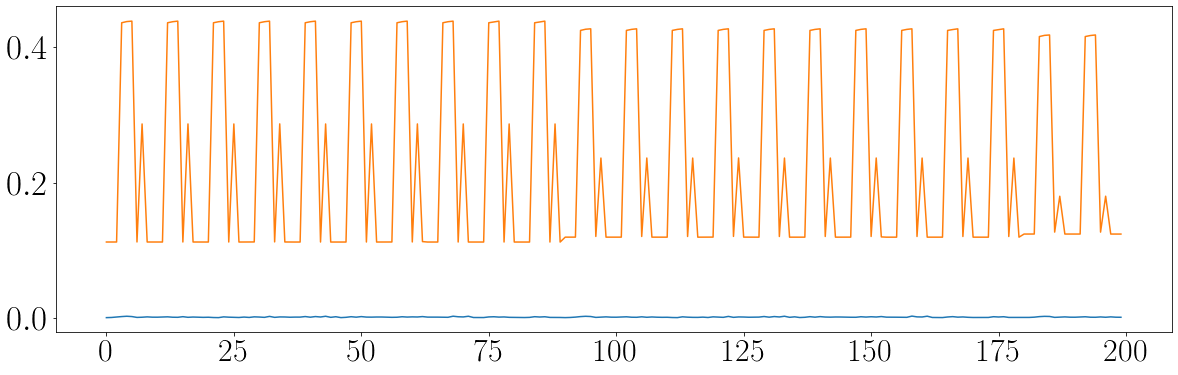

In [146]:
n_ = np.arange(len(sample_10k_pred_std.reshape(-1)))
plt.figure(figsize=(20, 6))
l = 200
plt.plot(n_[:l], sample_10k_pred_std.reshape(-1)[:l])
plt.plot(n_[:l], np.sqrt(test_1_v).reshape(-1)[:l])
plt.show();

In [145]:
print(post_samples_5[:, :3])

[[55.11022447 55.07110849 53.69703176]
 [55.11021514 55.07103426 53.69700275]
 [55.11023576 55.0710582  53.6969325 ]
 [55.1102362  55.07105839 53.6969322 ]
 [55.11023836 55.07105846 53.69693367]]


### test if the likelihood is correct

we sampel with likelihood 1 and check if the results resemble the prior

In [148]:
# draw samples test

# 'cheat' by choosing the init from the true observed probabilities
y_norm = np.array(y_values/y_values.sum(1).reshape(-1,1), dtype=float) + 10e-8 # <- to prevent the 0s
log_ = np.log(y_norm)
#log_ = np.log(y_values.astype(float) + 10e-8)
f_x = log_ - log_.sum(1).reshape(-1,1)
#f_x = log_ - log_.mean(1).reshape(-1,1)
f_x = f_x.reshape(-1)

n_samples = 500
burn_in = 100

L = np.linalg.cholesky(G_)

post_samples_500test = np.zeros((n_samples, n))

print("L: ", np.shape(L))

def ll_1(x):
    return(1)
    

t0 = time.time()
# get many samples with ESS
for i in range(-burn_in, n_samples):
    #sample one sample
    f_x, ll = elliptical_slice(initial_theta=f_x, prior=L, lnpdf=ll_1) 
    if i % 50 == 0: 
            print("iteration: ", i)
            print("log-likelihood: ", ll)
    if i >= 0:
        post_samples_500test[i] = f_x
        
t1 = time.time()
print("time to take samples: ", t1-t0)

L:  (1710, 1710)
iteration:  -100
log-likelihood:  1
iteration:  -50
log-likelihood:  1
iteration:  0
log-likelihood:  1
iteration:  50
log-likelihood:  1
iteration:  100
log-likelihood:  1
iteration:  150
log-likelihood:  1
iteration:  200
log-likelihood:  1
iteration:  250
log-likelihood:  1
iteration:  300
log-likelihood:  1
iteration:  350
log-likelihood:  1
iteration:  400
log-likelihood:  1
iteration:  450
log-likelihood:  1
time to take samples:  0.5439884662628174


In [149]:
print(post_samples_500test[:3, :10])

[[-1.82013512 -1.10940833 -2.64118422 -0.02103368  1.38457138  1.33916069
  -1.84625267  2.48889693 -1.55263306  0.42970966]
 [ 1.67210573  1.06583357  1.5350044   1.04450485 -1.75198484 -1.2311364
   1.21766039 -2.38778681  1.23274416 -0.13632787]
 [-1.71966285 -0.78794809 -0.37846422 -0.80743065  0.4896839   1.00420016
  -0.95603438  1.96551865 -0.6796893   0.11930435]]


In [150]:
sample_500test_pred = np.array([A @ X for X in post_samples_500test])
sample_500test_pred_std = sample_500test_pred.std(axis=0)

In [159]:
LM_GP_samples_std = out["spost"].std(0)

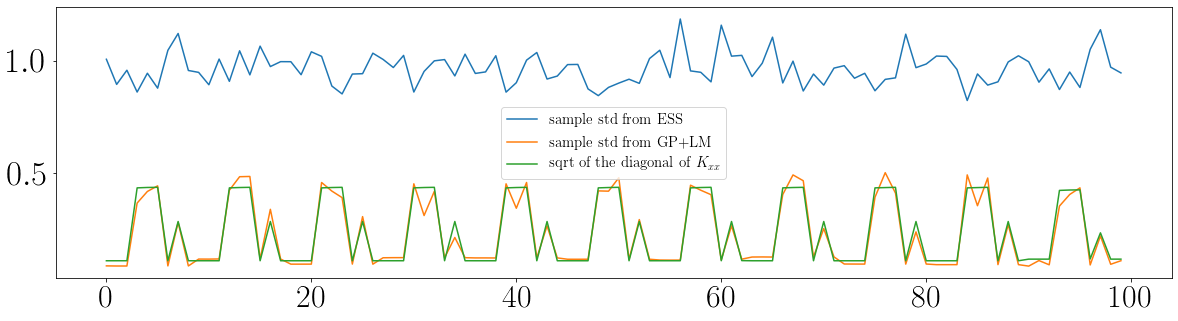

In [169]:
plt.figure(figsize=(20, 5))
plt.plot(sample_500test_pred_std[:100], label='sample std from ESS')
plt.plot(LM_GP_samples_std[:100], label='sample std from GP+LM')
plt.plot(np.sqrt(test_1_v).reshape(-1)[:100], label='sqrt of the diagonal of $K_{xx}$')
plt.legend(prop={'size': 15})
plt.show();

In [157]:
sample_post_10k = A @ sample_mean_10k
sample_post_s_10k = sample_std_10k

sample_post_10k = sample_post_10k.reshape((-1, n_regions*n_parties))
sample_std_10k = sample_post_s_10k.reshape((-1, n_regions*n_parties))

s_mean_ger_10k = sample_post_10k[:, 9*n_parties:10*n_parties]
s_ger_v_10k = sample_std_10k[:, 9*n_parties:10*n_parties]

sm_s_results_ger_10k = softmax_batch(s_mean_ger_10k)

(50, 6120)


In [181]:
# push all 50 samples through the softmax

election_GP_samples
election_GP_s_sm = np.concatenate([
    sm_results_SH_GP_s, 
    sm_results_HH_GP_s, 
    sm_results_NS_GP_s, 
    sm_results_HB_GP_s, 
    sm_results_NW_GP_s, 
    sm_results_HS_GP_s, 
    sm_results_RP_GP_s, 
    sm_results_BW_GP_s, 
    sm_results_BY_GP_s, 
    sm_results_ger_GP_s 
], axis=2)
print(np.shape(election_GP_s_sm))

(50, 68, 90)


In [182]:
# get samples for a region, i.e. germany and return their softmax predictions
# if you want another region, change this line s_pred_ger = s_pred[:, 9*n_parties:10*n_parties]
def samples_to_sm(samples):
    
    s_sm = []
    for s in samples:
        s_pred = A @ s
        s_pred = s_pred.reshape((-1, n_regions*n_parties))
        s_pred_ger = s_pred[:, 9*n_parties:10*n_parties] # <- here
        s_pred_ger_sm = softmax_batch(s_pred_ger)
        s_sm.append(s_pred_ger_sm)
        
    return(np.array(s_sm))

In [183]:
s_ger_50k_sm = samples_to_sm(post_samples_50k)

In [184]:
print(s_ger_50k_sm.shape)

(50000, 68, 9)


In [192]:
s_ger_50k_sm_std = np.std(s_ger_50k_sm.reshape((50000, -1)), axis=0).reshape(-1)
s_ger_GPs_sm_std = np.std(sm_results_ger_GP_s, axis=0).reshape(-1)

In [196]:
s_ger_5_sm = samples_to_sm(post_samples_5)
s_ger_10_sm = samples_to_sm(post_samples_10)
s_ger_50_sm = samples_to_sm(post_samples_50)
s_ger_100_sm = samples_to_sm(post_samples_100)
s_ger_500_sm = samples_to_sm(post_samples_500)
s_ger_1k_sm = samples_to_sm(post_samples_1k)
s_ger_5k_sm = samples_to_sm(post_samples_5k)
s_ger_10k_sm = samples_to_sm(post_samples_10k)

In [197]:
s_ger_5_sm_std = np.std(s_ger_50k_sm.reshape((5, -1)), axis=0).reshape(-1)
s_ger_10_sm_std = np.std(s_ger_50k_sm.reshape((10, -1)), axis=0).reshape(-1)
s_ger_50_sm_std = np.std(s_ger_50k_sm.reshape((50, -1)), axis=0).reshape(-1)
s_ger_100_sm_std = np.std(s_ger_50k_sm.reshape((100, -1)), axis=0).reshape(-1)
s_ger_500_sm_std = np.std(s_ger_50k_sm.reshape((500, -1)), axis=0).reshape(-1)
s_ger_1k_sm_std = np.std(s_ger_50k_sm.reshape((1000, -1)), axis=0).reshape(-1)
s_ger_5k_sm_std = np.std(s_ger_50k_sm.reshape((5000, -1)), axis=0).reshape(-1)
s_ger_10k_sm_std = np.std(s_ger_50k_sm.reshape((10000, -1)), axis=0).reshape(-1)

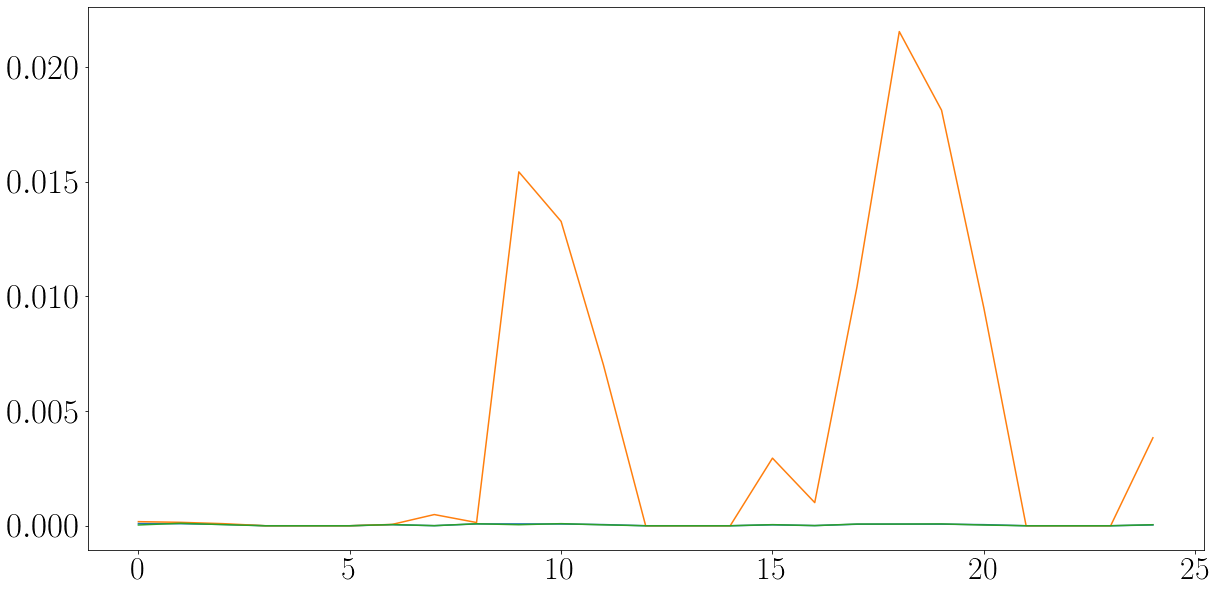

In [199]:
plt.figure(figsize=(20,10))
l = 25
plt.plot(s_ger_50k_sm_std[:l])
plt.plot(s_ger_GPs_sm_std[:l])
plt.plot(s_ger_5_sm_std[:l])

plt.show();

# Compute the same outcome with GP multi-class classification

Implemented as described in the Rasmussen & Williams GP book: http://www.gaussianprocess.org/gpml/chapters/RW.pdf in chapter 3.5

Mode-finding as explained in Algorithm 3.3 of the GP book. 

shape of y:  (9, 190)


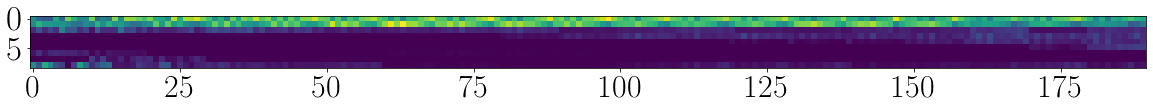

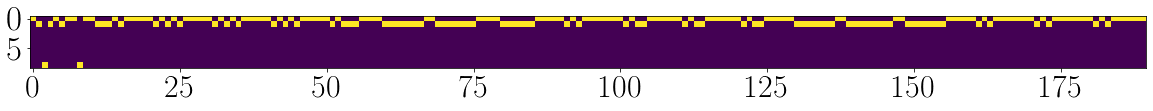

shape of K prior:  (1710, 1710)


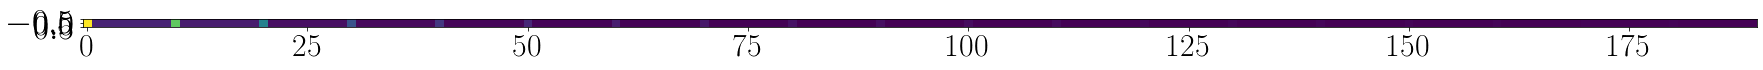

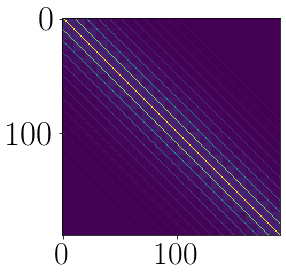

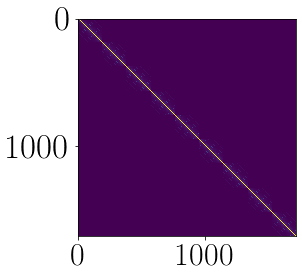

In [495]:
# we have inputs prior covariance matrix K and targets y

# the targets are just the true election results in our case
# it is a CxN vector which is 9(parties)x10(counties)x19(elections) in our case 

#y_values += 10 #test whether the zeros confuse the algorithm
y = y_values/y_values.sum(1).reshape(-1,1)
y = y.T
print("shape of y: ", y.shape) #we will keep it as a matrix for the calculation of the softmax

assert(np.allclose(np.sum(y.astype(float), axis=0) - 1, np.zeros(len(y[0]))))

plt.figure(figsize=(20,20))
plt.imshow(y.astype(float))
plt.show();

#test zone: have matrix with 1 for the maximum entry (i.e. the party that won the election) and 0 for all others
y_onehot = np.zeros_like(y)
y_onehot[y.argmax(0), np.arange(len(y[0]))] = 1

assert(np.allclose(np.sum(y_onehot.astype(float), axis=0) - 1, np.zeros(len(y[0]))))

plt.figure(figsize=(20,20))
plt.imshow(y_onehot.astype(float))
plt.show();


# the covariance matrix is a block diagonal matrix with K_1, ..., K_C as block entries. 
# for our purposes we don't have any different prior assumptions for either of the parties
# so K_1 = ... = K_C using the same kernel as for our large GP but without the party entries
n_GPC = n_regions * 19 #counties * elections

def k_dirac_hard(x,x_):
    if x == x_:
        return(1)
    else:
        return(0)
    
def k_dirac_soft(x, x_, equal=1, unequal=0.01):
    if x == x_:
        return(equal)
    else:
        return(unequal)

X_GPC = np.zeros((len(T)*len(C), 2))

idx = 0
for t in T:
    for c in C:
        X_GPC[idx] = [t, c]
        idx += 1

K_C = np.zeros((n_GPC, n_GPC))
for i in range(n_GPC):
    for j in range(n_GPC):
        t_i = X_GPC[i,0]
        c_i = X_GPC[i,1]
        t_j = X_GPC[j,0]
        c_j = X_GPC[j,1]
        #K_C[i, j] = k_RQ(t_i, t_j, l=5, a=1) * k_dirac_soft(c_i, c_j, equal=1, unequal=0.1)
        K_C[i, j] = 1000 * k_RQ(t_i, t_j, l=5, a=1) * k_dirac_soft(c_i, c_j, equal=1, unequal=0.1)
        #K_C[i, j] = k_SEK(t_i, t_j, l=1) * k_dirac_soft(c_i, c_j)

idx = 0
for _ in range(n_parties):
    K_GPC_prior[idx:idx+n_GPC, idx:idx+n_GPC] = K_C
    idx += n_GPC
    
print("shape of K prior: ", np.shape(K_GPC_prior))

#test 
plt.figure(figsize=(30,1))
plt.imshow(K_C[0].reshape(-1,1).T)
plt.show();

plt.imshow(K_C)
plt.show();

plt.imshow(K_GPC_prior)
plt.show();

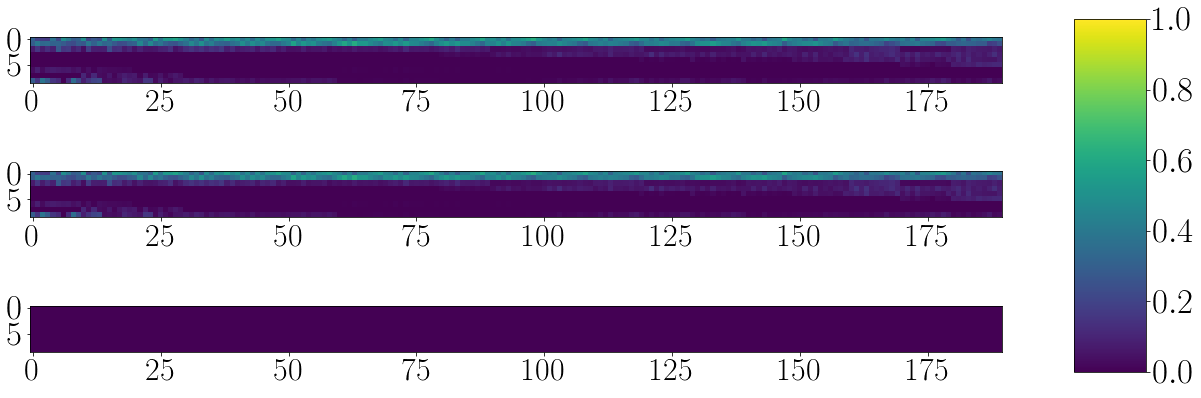

In [496]:
# initialization

# init f
#f = np.zeros_like(y) 
#f = np.random.normal(size=(np.shape(y)))
log_y = np.log(y.astype(float)+1e-8)  # init with the ground truth
f = log_y
f_sm = np.exp(f)/np.exp(f).sum(axis=0).reshape(1,-1)

# init convergencecriterium
convergence_criterium = False

fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(20,7))

im = axs[0].imshow(f_sm.astype(float), vmin=0, vmax=1)
im = axs[1].imshow(y.astype(float), vmin=0, vmax=1)
im = axs[2].imshow(f_sm.astype(float) - y.astype(float), vmin=0, vmax=1)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)

plt.show();


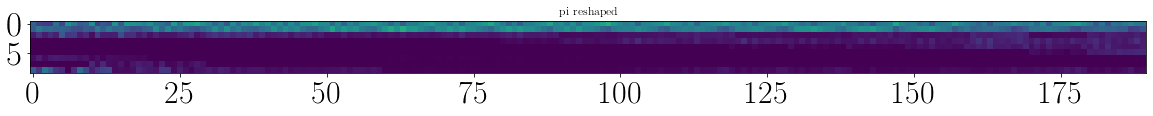

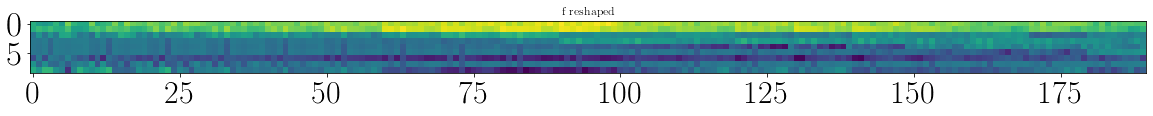

objective:  913.4257316576266


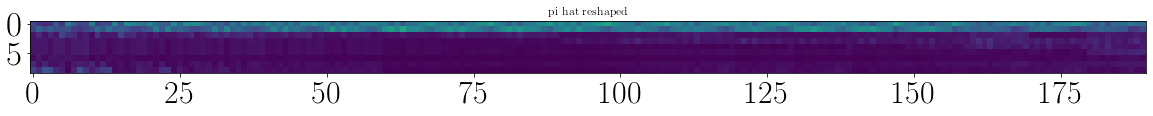

difference of f_new and f:  10923.735843405859


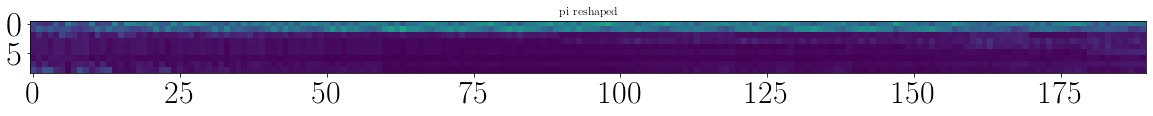

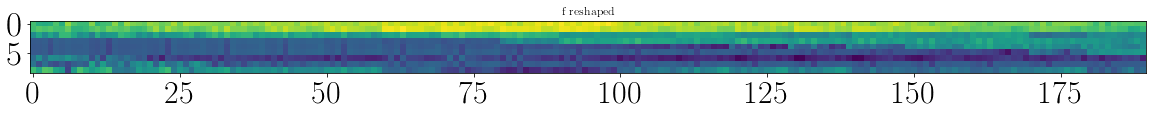

objective:  1067.7390691413375


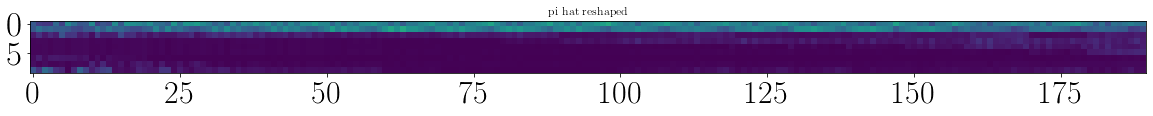

difference of f_new and f:  843.9770991600973


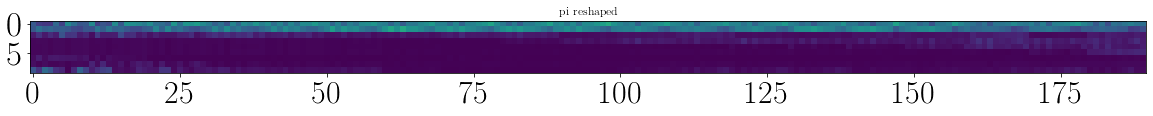

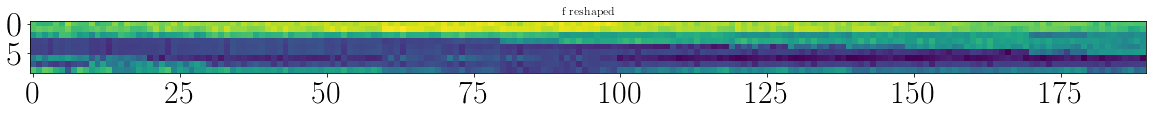

objective:  1209.513911366769


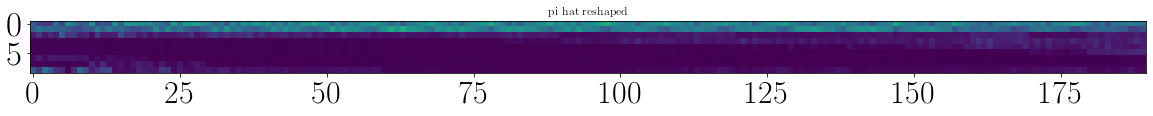

difference of f_new and f:  754.742036847549


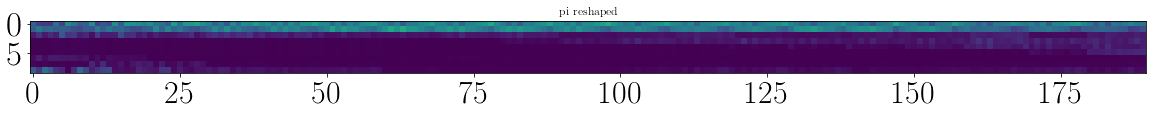

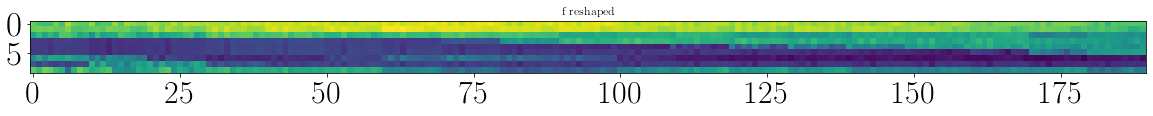

objective:  1334.599285257863


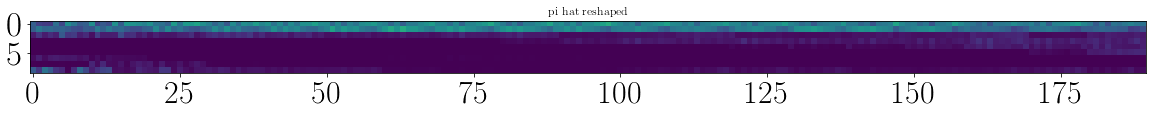

difference of f_new and f:  660.9872208845953


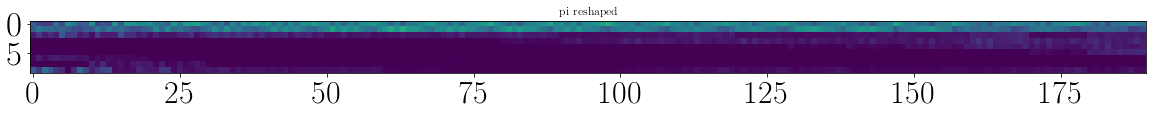

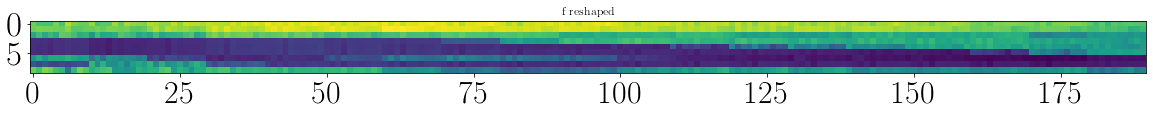

objective:  1429.2992815959283


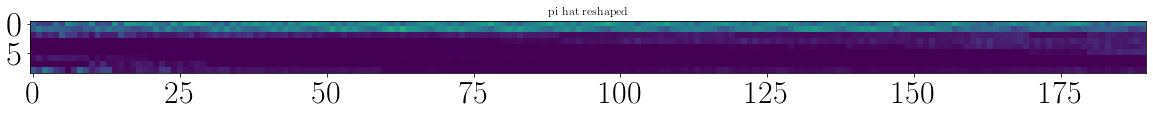

difference of f_new and f:  505.15925358533536


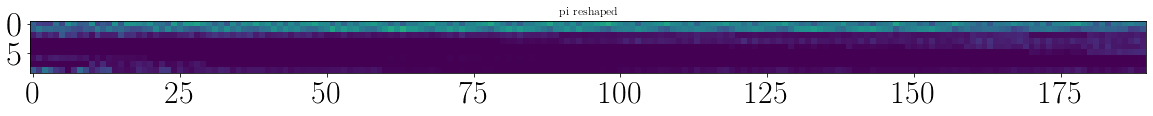

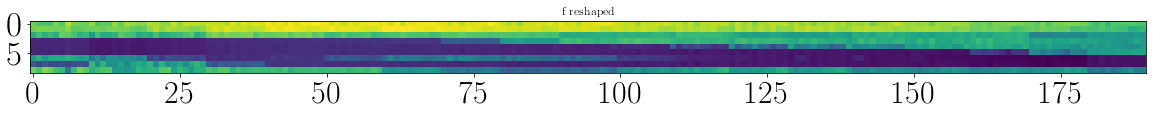

objective:  1480.8456561103903


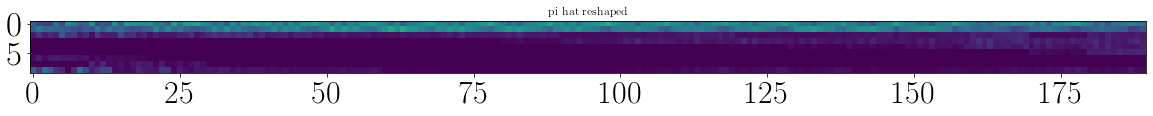

difference of f_new and f:  286.26396573233734


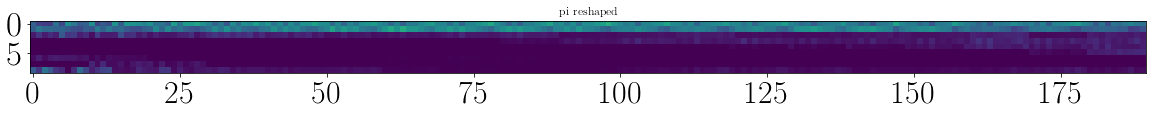

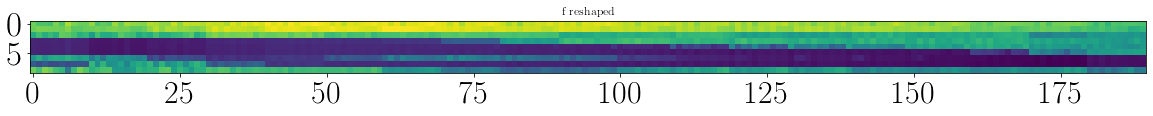

objective:  1495.2358962670069


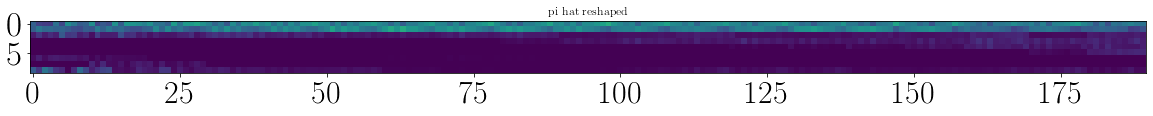

difference of f_new and f:  81.8808492392017


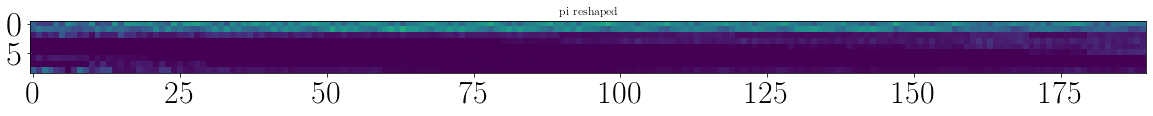

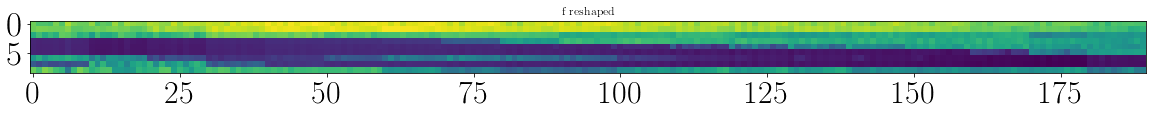

objective:  1496.3242960767768


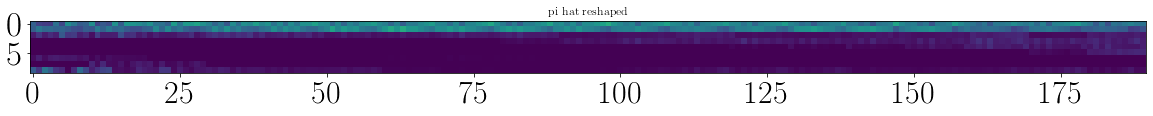

difference of f_new and f:  6.202633191672782


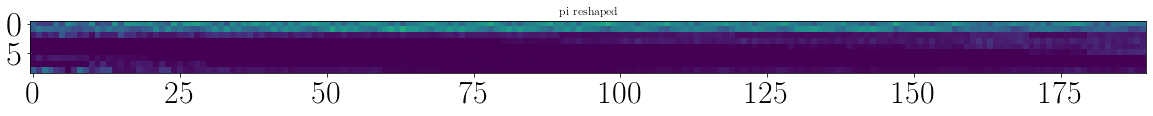

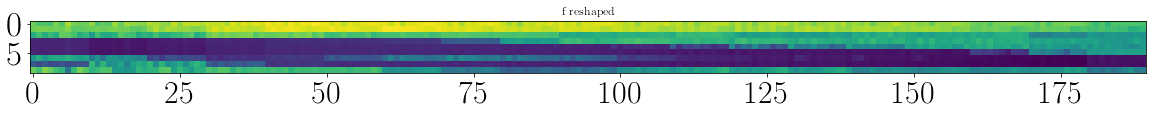

objective:  1496.331699170838


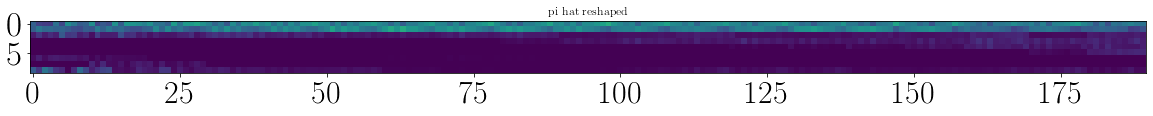

difference of f_new and f:  0.04208505197345819


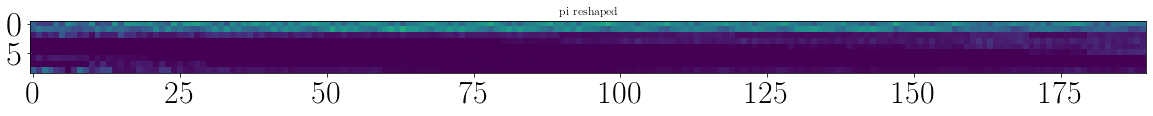

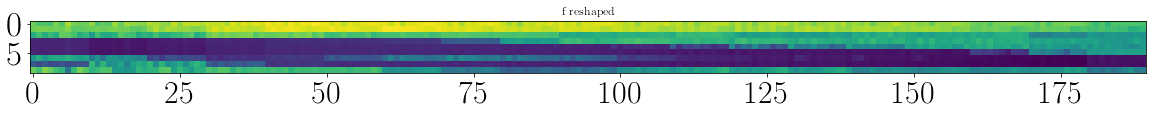

objective:  1496.3316996848637


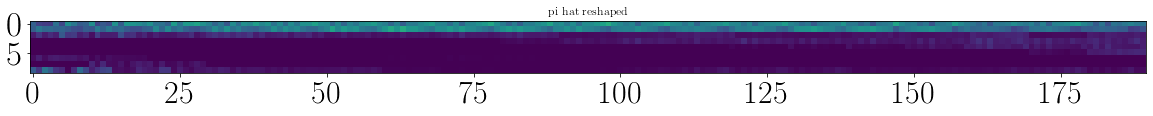

difference of f_new and f:  2.945357374612616e-06


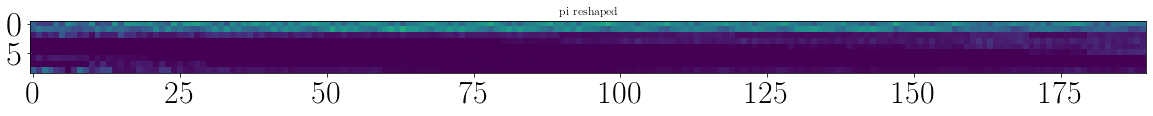

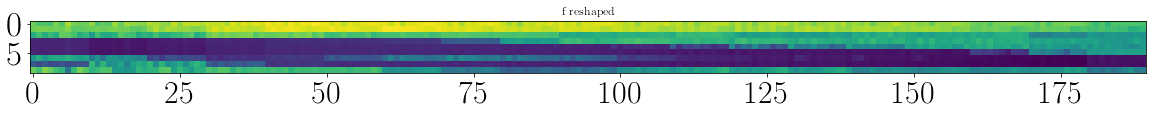

objective:  1496.3316996848635


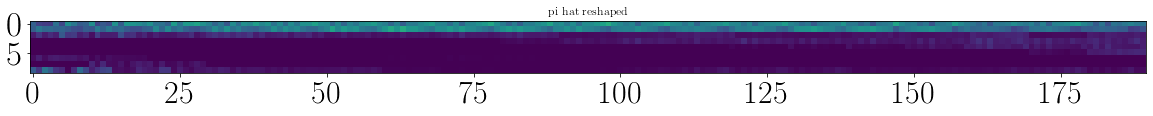

difference of f_new and f:  1.963648248561392e-09


In [497]:
# newton iteration


while convergence_criterium == False:
    
    # compute pi and PI from f: line 4
    f = f.reshape(n_parties, n_GPC).astype(float) #+ 10e-10 #mini nugget to prevent NaNs and inf
    f_prev = f
    pi = np.exp(f)/np.exp(f).sum(axis=0).reshape(1,-1)
    #"""
    plt.figure(figsize=(20,10))
    plt.title("pi reshaped")
    plt.imshow(pi, vmin = 0, vmax=1)
    plt.show();
    #"""
    assert(np.allclose(np.sum(pi, axis=0) - 1, np.zeros(len(pi[0]))))
    #print("pi: ", pi)
    PI = np.zeros((n_GPC*n_parties, n_GPC))
    idx = 0
    for p in range(n_parties):
        PI[idx:idx+n_GPC, :n_GPC] = np.diag(pi[p])
        idx += n_GPC
    
    """
    plt.figure(figsize=(20, 40))
    plt.imshow(PI)
    plt.show()
    #print([PI[i,i] for i in range(n_GPC)])
    #"""
    
    # Loop over classes: line 5
    E = np.zeros((n_GPC*n_parties, n_GPC*n_parties))
    Es = []
    idx = 0
    Zs = []
    for p in range(n_parties):
        D_sqrt = np.diag(np.sqrt(pi[p]))
        
        #cholesky: line 6
        L = cho_factor(1 * np.eye(n_GPC) + D_sqrt @ K_C @ D_sqrt)
        
        #compute E: line 7
        E_c = D_sqrt @ cho_solve(L, D_sqrt)
        E[idx:idx+n_GPC, idx:idx+n_GPC] = E_c
        idx += n_GPC
        Es.append(E_c)
        
        #compute z: line 8
        z_c = np.sum(np.log(np.diag(L[0])))
        Zs.append(z_c)
        
    """
    plt.figure(figsize=(20, 20))
    plt.imshow(E)
    plt.show()
    #"""
    
    # compute M: line 10
    M = cho_factor(np.sum(np.array(Es), axis=0))
    
    #compute b: line 11
    b = (np.diag(pi.reshape(-1)) - PI@PI.T) @ f.reshape(-1) + y.reshape(-1) - pi.reshape(-1)
    #b = (np.diag(pi.reshape(-1)) - PI@PI.T) @ f.reshape(-1) + y_onehot.reshape(-1) - pi.reshape(-1)
    """
    plt.figure(figsize=(20, 20))
    #plt.imshow((np.diag(pi.reshape(-1))))
    #plt.imshow(PI@PI.T)
    #plt.imshow((np.diag(pi.reshape(-1)) - PI@PI.T))
    plt.show()
    #"""
    """
    plt.figure(figsize=(20, 20))
    plt.title("b reshaped")
    plt.imshow(b.reshape((-1, n_GPC)).astype(float), vmin = 0, vmax=1)
    plt.show()
    #"""
    
    
    
    #compute c: line 12
    c = E @ K_GPC_prior @ b
    """
    plt.figure(figsize=(20, 20))
    plt.title("c reshaped")
    plt.imshow(c.reshape((-1, n_GPC)).astype(float), vmin = 0, vmax=1)
    plt.show()
    #"""
    
    #compute a: line 13
    R = np.stack([np.eye(n_GPC) for _ in range(n_parties)], axis=0).reshape(-1, n_GPC)
    """
    plt.figure(figsize=(20, 20))
    plt.imshow(R.astype(float))
    plt.show()
    #"""
    a = b - c + E @ R @ cho_solve(M, R.T @ c)
    """
    plt.figure(figsize=(20, 20))
    plt.title("a reshaped")
    plt.imshow(a.reshape((-1, n_GPC)).astype(float), vmin = 0, vmax=1)
    plt.show()
    #"""
    
    #compute new f: line 14
    f = K_GPC_prior @ a
    #f = K_GPC_prior @ b
    #"""
    plt.figure(figsize=(20, 20))
    plt.title("f reshaped")
    plt.imshow(f.reshape((-1, n_GPC)).astype(float), vmin = f.min(), vmax=f.max())
    plt.show()
    #"""
    
    #compute objective: line 15    
    objective = -1/2 * a.T @ f + y.reshape(-1).T @ f 
    #objective = -1/2 * a.T @ f + y_onehot.reshape(-1).T @ f 
    objective += np.sum(np.log(np.sum(np.exp(f.astype(float).reshape(n_parties, n_GPC)), axis=0)))
    print("objective: ", objective)
    
    #how good is f?
    f_hat = f.reshape(n_parties, n_GPC).astype(float) #+ 10e-10 #mini nugget to prevent NaNs and inf
    pi_hat = np.exp(f_hat)/np.exp(f_hat).sum(axis=0).reshape(1,-1)
    #"""
    plt.figure(figsize=(20, 20))
    plt.title("pi hat reshaped")
    plt.imshow(pi_hat.reshape((-1, n_GPC)).astype(float), vmin = 0, vmax=1)
    plt.show()
    #"""
    
    diff = np.sum(np.abs(f_prev - f.reshape(n_parties, n_GPC))) 
    print("difference of f_new and f: ", diff)
    if (diff <= 1e-8):
        convergence_criterium = True
    
    


pi hat shape:  (9, 190)
pi hat:  [[0.30652772 0.29443276 0.07265995 ... 0.03095992 0.0038301  0.28919045]
 [0.19543379 0.39446714 0.1579497  ... 0.0841023  0.00249694 0.1630832 ]
 [0.17579538 0.33260047 0.07483168 ... 0.03006718 0.00364618 0.38080554]
 ...
 [0.44117942 0.18191602 0.06404668 ... 0.00106036 0.00102986 0.06392998]
 [0.39302047 0.19500482 0.08464538 ... 0.00103692 0.0010196  0.02505171]
 [0.37246081 0.24638562 0.06855284 ... 0.00112841 0.0010231  0.03168668]]
error:  [[-0.00036486056343909556 -0.0012284263873417745 -0.001388955121765123
  ... -0.00034402912620295004 0.00382151032191697 -0.0028685994106195656]
 [-0.0020126271833777465 -0.0018491391195447626 -0.00038798005762041843
  ... -0.0006625693189516169 0.0024836834756390112 1.4548259938407249e-06]
 [-0.0005831482910629293 -0.001708087822485993 -7.8464262827177e-05 ...
  -0.0008721390773876354 0.003642614626321599 -0.002643659946517052]
 ...
 [-0.00043596629053466174 0.0006283373797717484 -0.0007809352549803111
  ... 

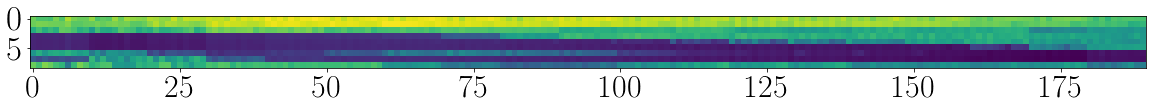

In [498]:
print("pi hat shape: ", np.shape(pi_hat))
print("pi hat: ", pi_hat.T)
print("error: ", (pi_hat - y).T)
print("error sum: ", np.sum(np.abs(pi_hat - y)))

plt.figure(figsize=(20,10))
plt.imshow(f_hat);

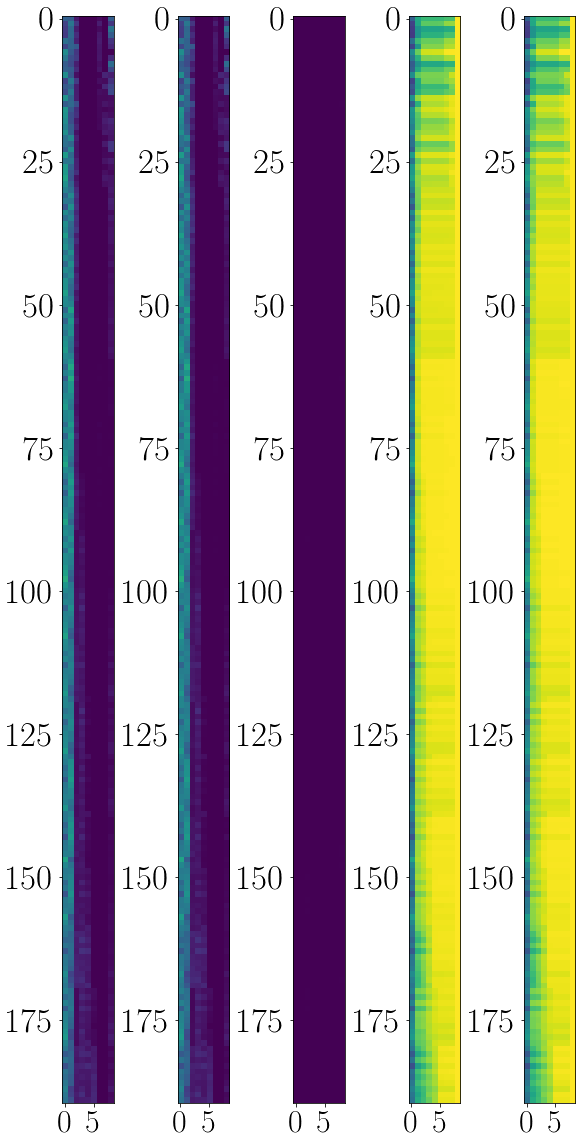

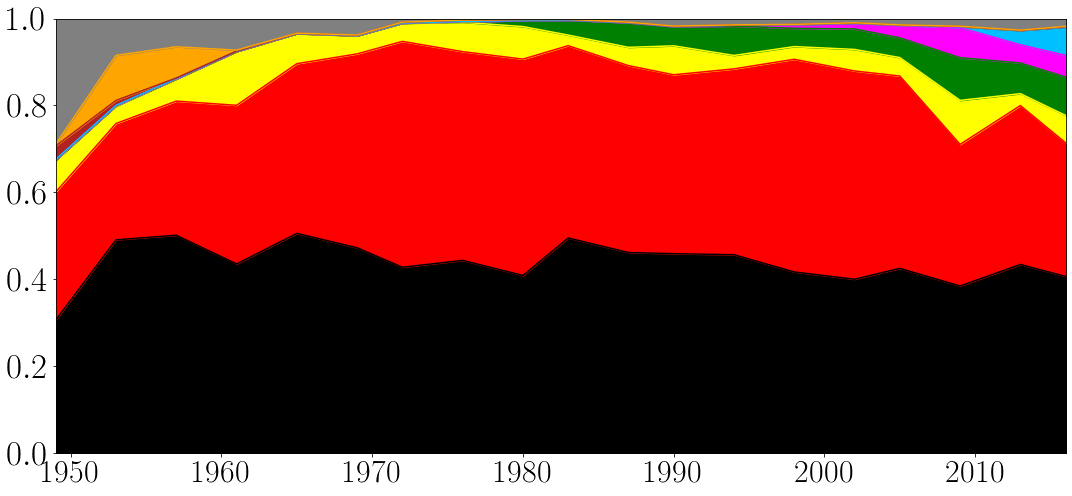

In [499]:
# plot a prediction

pi_hat_pred = pi_hat.T

#plt.figure(figsize=(10,20))
#plt.imshow(pi_hat_pred);

pi_hat_pred_cum = np.cumsum(pi_hat_pred, 1)

fix, ax = plt.subplots(1, 5, figsize=(10, 20))
ax[0].imshow(pi_hat_pred, vmin=0, vmax=1)
ax[1].imshow(y.astype(float).T, vmin=0, vmax=1)
ax[2].imshow(pi_hat_pred - y.astype(float).T, vmin=0, vmax=1)
ax[3].imshow(pi_hat_pred_cum, vmin=0, vmax=1)
ax[4].imshow(np.cumsum(y.astype(float).T, 1), vmin=0, vmax=1)
plt.show()

pi_hat_pred_cum = pi_hat_pred_cum.reshape((-1, n_regions*n_parties))
pi_hat_pred_cum_ger = pi_hat_pred_cum[:, 9*n_parties:10*n_parties]
pi_hat_pred_cum_SH = pi_hat_pred_cum[:, 0:1*n_parties]

plot_cum_results(pi_hat_pred_cum_SH, results_v, x=years, save=False, filename='GPC_ger.pdf', legend=False)

K_C_star shape: (190, 680)


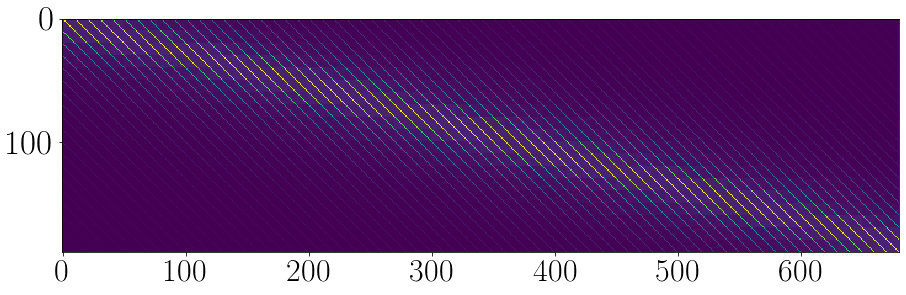

K_C_star_XX shape: (680, 680)


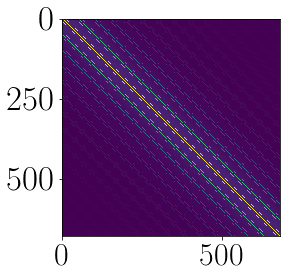

In [621]:
#### create the input data for the GPC predictions

T_x = np.arange(1949, 2017)
C_x = np.arange(1, n_regions +1)

n_GPC_pred = len(T_x)*len(C_x)
X_GPC_pred = np.zeros((n_GPC_pred, 2))

idx = 0
for t in T_x:
    for c in C_x:
        X_GPC_pred[idx] = [t, c]
        idx += 1

K_C_star = np.zeros((n_GPC, n_GPC_pred))
for i in range(n_GPC):
    for j in range(n_GPC_pred):
        t_i = X_GPC[i,0]
        c_i = X_GPC[i,1]
        t_j = X_GPC_pred[j,0]
        c_j = X_GPC_pred[j,1]
        K_C_star[i, j] = 1000 * k_RQ(t_i, t_j, l=5, a=1) * k_dirac_soft(c_i, c_j, equal=1, unequal=0.1)
        #K_C_star[i, j] = k_SEK(t_i, t_j, l=5) * k_dirac_soft(c_i, c_j, equal=1, unequal=0.1)
        
print("K_C_star shape:", np.shape(K_C_star))
plt.figure(figsize=(15, 15))
plt.imshow(K_C_star)
plt.show();

K_C_star_XX = np.zeros((n_GPC_pred, n_GPC_pred))
for i in range(n_GPC_pred):
    for j in range(n_GPC_pred):
        t_i = X_GPC_pred[i,0]
        c_i = X_GPC_pred[i,1]
        t_j = X_GPC_pred[j,0]
        c_j = X_GPC_pred[j,1]
        K_C_star_XX[i, j] = 1000 * k_RQ(t_i, t_j, l=5, a=1) * k_dirac_soft(c_i, c_j, equal=1, unequal=0.1)
        
print("K_C_star_XX shape:", np.shape(K_C_star_XX))
plt.imshow(K_C_star_XX)
plt.show();

# we want to draw S = 100 samples from the posterior and apply the softmax
S = 100

In [622]:
#f_hat = y

def is_pos_def(x):
    eig = np.linalg.eigvals(x)
    pd = np.all(eig > 0)
    if not pd:
        raise(ValueError("matrix is not positive definite! Matrix: {}; Eigenvalues: {}".format(x, eig)))
    else:
        print("Matrix is positive definite; minimum eigenvalue: {}".format(eig.min()))
        return(True)

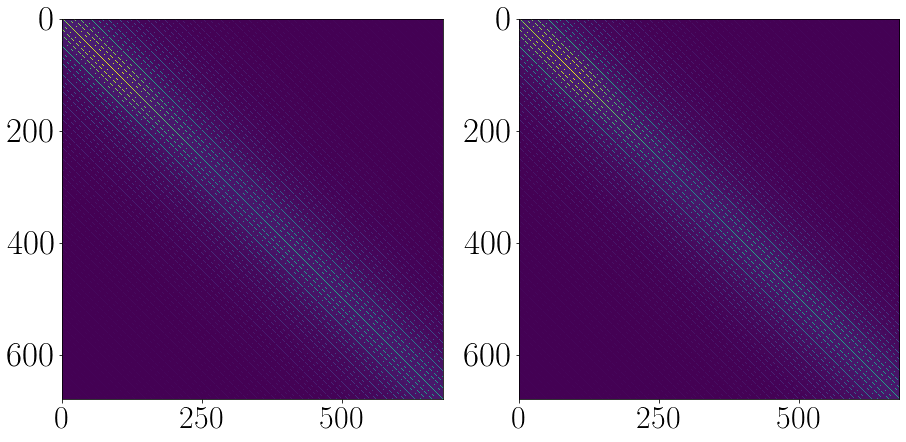

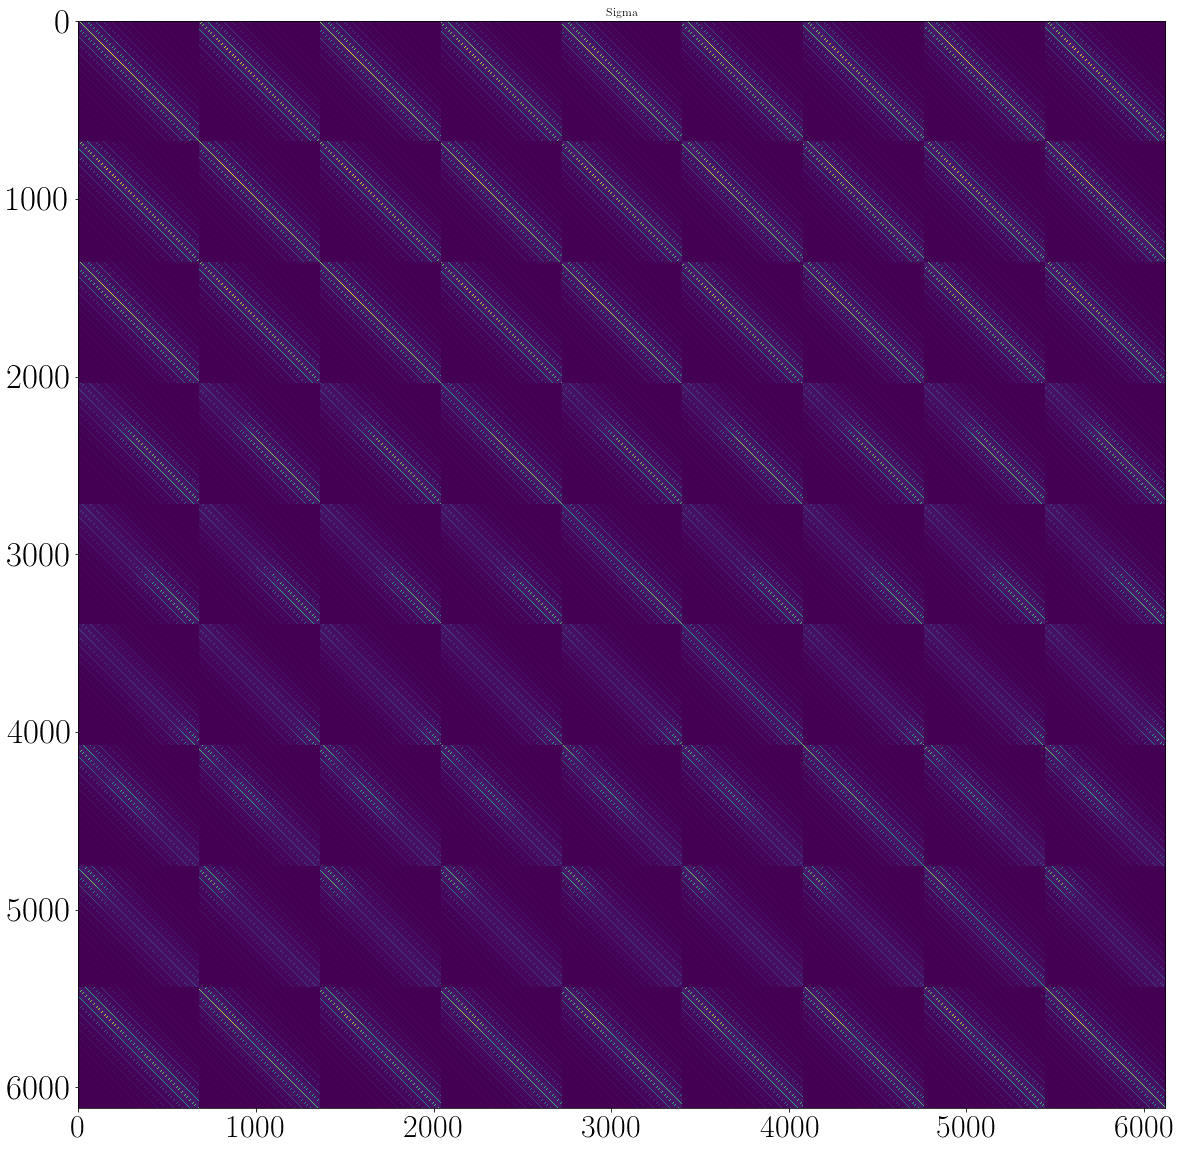

loops done, starting MC


In [623]:
#### do the prediction algorithm for multiclass GP classification as detailed in algorithm 3.4 in the GP book

# compute pi and PI from f_hat: line 2
f_hat = f_hat.reshape(n_parties, n_GPC).astype(float) 
pi = np.exp(f_hat)/np.exp(f_hat).sum(axis=0).reshape(1,-1)
assert(np.allclose(np.sum(pi, axis=0) - 1, np.zeros(len(pi[0]))))
#print("pi: ", pi)
PI = np.zeros((n_GPC*n_parties, n_GPC))
idx = 0
for p in range(n_parties):
    PI[idx:idx+n_GPC, :n_GPC] = np.diag(pi[p])
    idx += n_GPC


# Loop over classes: line 5
E = np.zeros((n_GPC*n_parties, n_GPC*n_parties))
Es = []
idx = 0
for p in range(n_parties):
    D_sqrt = np.diag(np.sqrt(pi[p]))

    #cholesky: line 4
    L = cho_factor(np.eye(n_GPC) + D_sqrt @ K_C @ D_sqrt)

    #compute E: line 5
    E_c = D_sqrt @ cho_solve(L, D_sqrt)
    E[idx:idx+n_GPC, idx:idx+n_GPC] = E_c
    idx += n_GPC
    Es.append(E_c)

# compute M: line 7
M = cho_factor(np.sum(np.array(Es), axis=0))
R = np.stack([np.eye(n_GPC_pred) for _ in range(n_parties)], axis=0).reshape(-1, n_GPC_pred)
#R = np.stack([np.eye(n_GPC) for _ in range(n_parties)], axis=0).reshape(-1, n_GPC)
"""
plt.figure(figsize=(20, 20))
plt.title("R")
plt.imshow(R.astype(float))
plt.show()
#"""

# Loop over classes: line 8
Sigma = np.zeros((n_parties * n_GPC_pred, n_parties * n_GPC_pred))
mu = np.zeros((n_parties * n_GPC_pred))

for p in range(n_parties):
    #mu_c_star = K_C_star @ (y[p] - pi[p])
    mu_c_star = (y[p] - pi[p]).T @ K_C_star
    mu[p*n_GPC_pred:(p+1)*n_GPC_pred] = mu_c_star
    #b = K_C_star @ Es[p].T
    b = Es[p] @ K_C_star
    c = Es[p] @ (R.T @ cho_solve(M, (b @ R.T)).T).T
    #print("Es[p]", np.shape(Es[p]))
    #print("R.T", np.shape(R.T))
    #print("M", np.shape(M[0]))
    #print("b", np.shape(b))
    
    #loop over classes: line 12
    for p_ in range(n_parties):
        #print(idx, idx2)
        #if p_ >= p:
        Sigma_cc_ = c.T @ K_C_star + np.eye(n_GPC_pred) * 0.0001
        #Sigma_cc_fake = 0.5 * Sigma_cc_ + Sigma_cc_.T
        #print(is_pos_def(Sigma_cc_))
        #print(Sigma_cc_ == Sigma_cc_.T)
        Sigma[p*n_GPC_pred:(p+1)*n_GPC_pred, p_*n_GPC_pred:(p_+1)*n_GPC_pred] = Sigma_cc_
        
    Sigma[p*n_GPC_pred:(p+1)*n_GPC_pred, p*n_GPC_pred:(p+1)*n_GPC_pred] += K_C_star_XX - b.T @ K_C_star
    idx += n_GPC_pred

Sigma_fake = 0.5 * (Sigma + Sigma.T) 
Sigma_fake += np.eye(n_parties * n_GPC_pred) * 1

fix, ax = plt.subplots(1, 2, figsize=(15, 7))

ax[0].imshow(Sigma_fake[7*n_GPC_pred:8*n_GPC_pred, 8*n_GPC_pred:9*n_GPC_pred])
ax[1].imshow(Sigma_fake[8*n_GPC_pred:9*n_GPC_pred, 7*n_GPC_pred:8*n_GPC_pred])
plt.show();


plt.figure(figsize=(20,20))
#plt.imshow(Sigma_fake)
plt.imshow(Sigma)
plt.title("Sigma")
plt.show();

#"""
# init pi for MC-loop: line 17
pi_star = np.zeros_like(pi).reshape(n_parties, n_GPC).astype(float)

#test
print("loops done, starting MC")
Sigma = 0.001 * np.eye(n_parties * n_GPC_pred)

# MC-loop: line 18
f_star = multivariate_normal(
    mu, Sigma, size=S
)
#"""



In [624]:
print(np.shape(f_star))

(100, 6120)


In [625]:
f_star = f_star.reshape(S, n_parties, n_GPC_pred).astype(float)
f_star_sm = np.exp(f_star)/np.exp(f_star).sum(1).reshape(S, 1, -1)
f_star_sm_mean = f_star_sm.mean(0)
print(np.shape(f_star_sm_mean))
print(f_star_sm_mean[:,0])

(9, 680)
[0.3046865  0.29525416 0.07268213 0.00081701 0.00079338 0.00078813
 0.03091987 0.00382541 0.29023341]


In [626]:
#f_pred = np.flip(f_star_sm_mean.T, 1)
f_pred = f_star_sm_mean.T
f_pred_cum = np.cumsum(f_pred, 1).reshape((-1, n_regions*n_parties))
f_pred_cum_ger = f_pred_cum[:, 9*n_parties:10*n_parties]
f_pred_cum_SH = f_pred_cum[:, 0:1*n_parties]
f_pred_cum_HH = f_pred_cum[:, 1*n_parties:2*n_parties]
f_pred_cum_NS = f_pred_cum[:, 2*n_parties:3*n_parties]

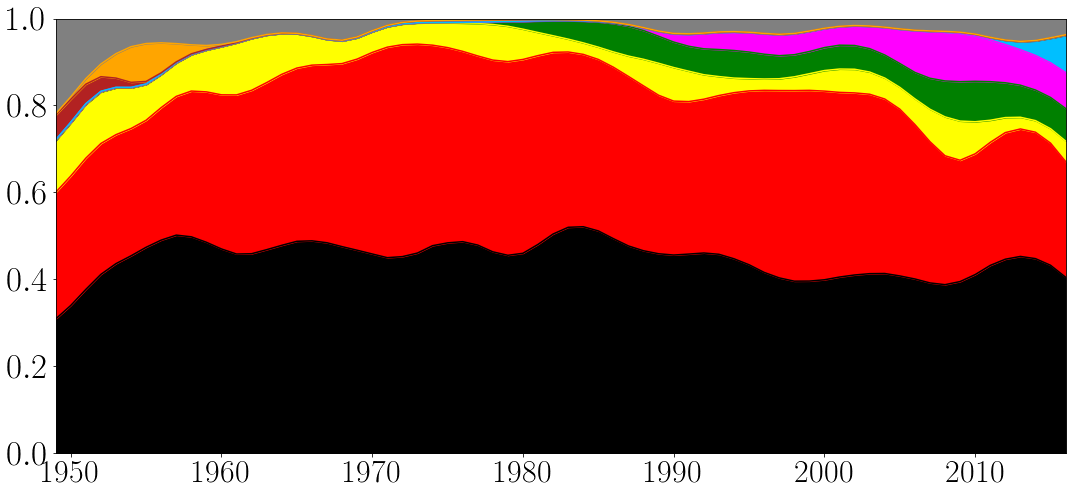

In [627]:
plot_cum_results(f_pred_cum_ger, results_v, x=T_x, save=False, filename='GPC_ger.pdf', legend=False)

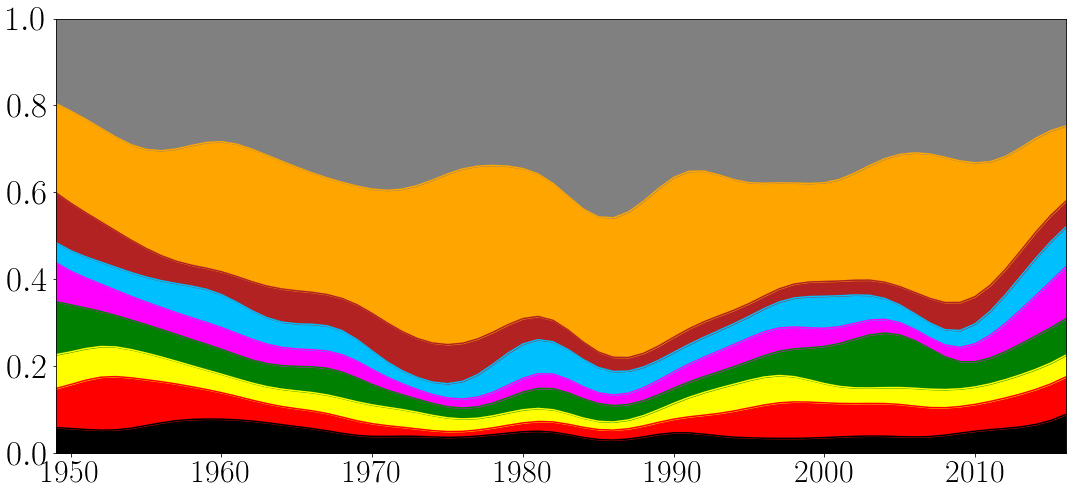

In [494]:
plot_cum_results(f_pred_cum_SH, results_v, x=T_x, save=False, filename='GPC_ger.pdf', legend=False)

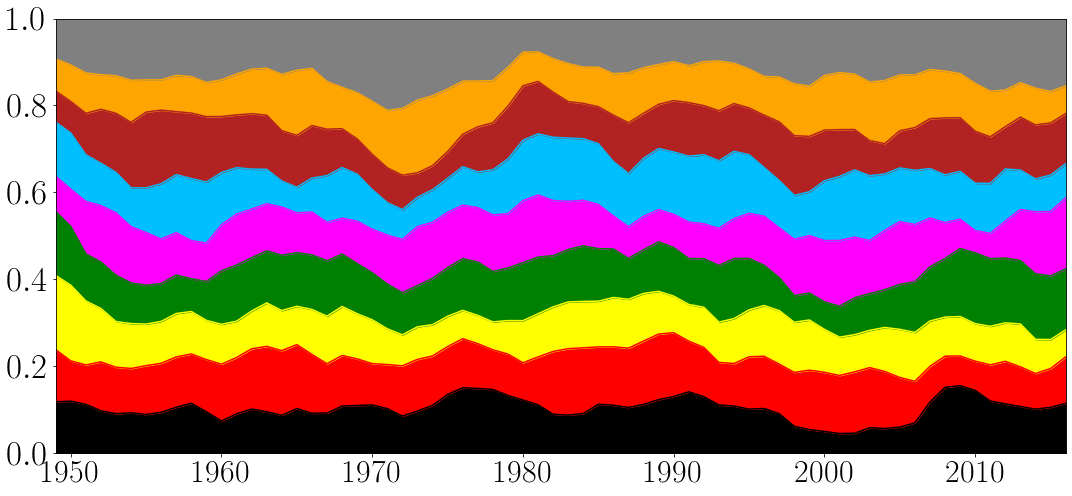

In [455]:
plot_cum_results(f_pred_cum_HH, results_v, x=T_x, save=False, filename='GPC_ger.pdf', legend=False)

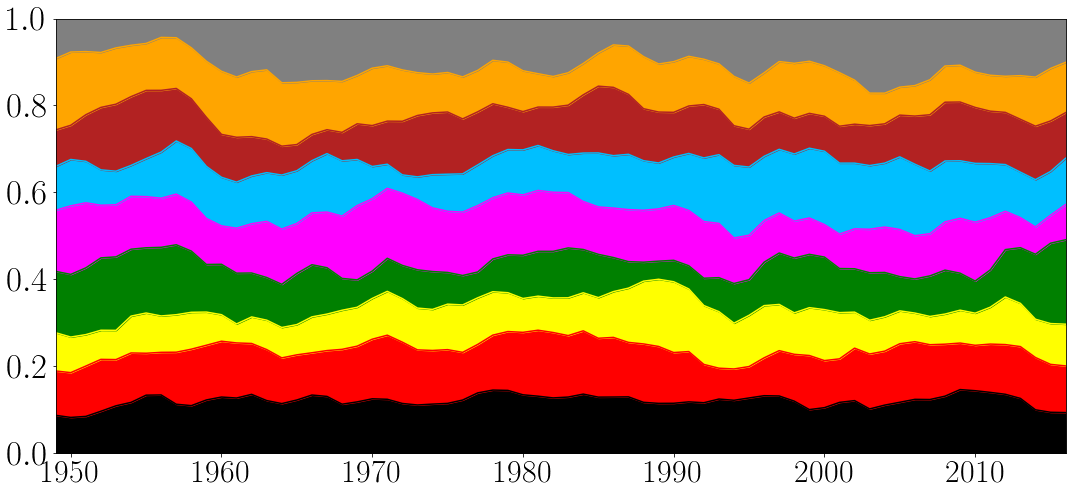

In [456]:
plot_cum_results(f_pred_cum_NS, results_v, x=T_x, save=False, filename='GPC_ger.pdf', legend=False)